# Telecom Churn Case Study - Alok Tripathi & Visalakshi G

#### Problem Overview
 In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
 To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

#### Business Goal
 Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 

#### Case Study Analysis Approach

  Given dataset(telecom_churn_data.csv) is analysed to predict the indicators of churn using predictive models using following steps.
- Data Sourcing or Data Understanding
- Data cleaning and Derived Metrics
- Exploratory Data Analysis (Univariate, Bivariate Analysis)
- Model Preparation
    1. Feature Engineering
    2. Train and Test Data Split
    3. Data Normalization
    4. Data Preprocessing
    5. Custom function for model building & evaluation
    6. Dimensionality Reduction - Applying PCA
    7. Handling Class Imbalance
- Model Building
    * Residual Analysis of the Train Data
    * Making Predictions
- Model Evaluation
- Final Inferences and Summary of Results

**Disclaimer: 
Metrics might vary slightly depending on the execution environment**<br>
**Hypertuning using Grid Search coding is commented to reduce execution time**

## <font color=brown>1. Data Sourcing & Understanding</font>

#### <font color=brown>1.1 Import required libraries</font>

In [1]:
#Import required libraries

import os
import numpy as np 
print('numpy version\t:',np.__version__)
import pandas as pd
print('pandas version\t:',pd.__version__)
import matplotlib.pyplot as plt


import seaborn as sns
print('seaborn version\t:',sns.__version__)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)

from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve,recall_score,accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek


# Style
sns.set(style = "whitegrid")

# To map Empty Strings or numpy.inf as NA Values
pd.options.mode.use_inf_as_na = True

pd.options.display.expand_frame_repr =  True

numpy version	: 1.19.2
pandas version	: 1.1.3
seaborn version	: 0.11.0


### <font color=brown>1.2 Read the dataset</font>

In [2]:
f='telecom_churn_data.csv' # Application Dataset file given for Advanced Regression Assignment

dir_path = os.path.dirname(os.path.realpath(f))   #Find file location
print('\033[1m'+'Application Dataset file location on local machine: '+dir_path) #write dataset location

#Read the dataset and view the it 
df = pd.read_csv(f)
df.head()

Application Dataset file location on local machine: D:\visali\dds\ml2\Telecom


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

### <font color=brown>1.3 Understanding Data</font>

In [3]:
#Understand the data dimensions
print('Dataset has ',df.shape[0],' rows and ',df.shape[1],' columns.')

Dataset has  99999  rows and  226  columns.


In [4]:
#Check the data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


In [5]:
#Check the statistical info of dataset
print(df.describe())

       mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.5

In [6]:
#Check if there are any missing values and their percentage
def df_info(df,sort_key,check=0,flag=False):
    if(check==0):
        print("Percentage  NULL Values in each columns\n")
        count_null=df.isnull().sum()
        null_per=100*(count_null/len(df))
        n_unique=df.nunique()
        data_types=df.dtypes
        res=pd.concat([count_null,null_per,n_unique,data_types],axis=1,keys=['Total','Percent','Unique','DataType','Var Type']).sort_values(by=sort_key,ascending=flag)
        res['Var_Type']=np.where(res['Unique']<20,"Categorical",np.where(res['DataType']=='object',"Categorical","Continious"))
        return res
    else:
        print('There are ',len(df.loc[:,list((100*(df.isnull().sum()/len(df.index))>=check))].columns),' columns with more than ',check,'% missing values ')
        


In [7]:
#Print null value percent in each column of given dataset
df_info(df,'Percent')

Percentage  NULL Values in each columns



Total    Percent  Unique DataType     Var_Type
arpu_3g_6                 74846  74.846748    7418  float64   Continious
night_pck_user_6          74846  74.846748       2  float64  Categorical
total_rech_data_6         74846  74.846748      37  float64   Continious
arpu_2g_6                 74846  74.846748    6990  float64   Continious
max_rech_data_6           74846  74.846748      48  float64   Continious
fb_user_6                 74846  74.846748       2  float64  Categorical
av_rech_amt_data_6        74846  74.846748     887  float64   Continious
date_of_last_rech_data_6  74846  74.846748      30   object  Categorical
count_rech_2g_6           74846  74.846748      31  float64   Continious
count_rech_3g_6           74846  74.846748      25  float64   Continious
date_of_last_rech_data_7  74428  74.428744      31   object  Categorical
total_rech_data_7         74428  74.428744      42  float64   Continious
fb_user_7                 74428  74.428744       2  float64  Categorical
max_rech_data_7           74428  74.428744      48  float64   Continious
night_pck_user_7          74428  74.428744       2  float64  Categorical
count_rech_2g_7           74428  74.428744      36  float64   Continious
av_rech_amt_data_7        74428  74.428744     961  float64   Continious
arpu_2g_7                 74428  74.428744    6586  float64   Continious
count_rech_3g_7           74428  74.428744      28  float64   Continious
arpu_3g_7                 74428  74.428744    7246  float64   Continious
total_rech_data_9         74077  74.077741      37  float64   Continious
count_rech_3g_9           74077  74.077741      27  float64   Continious
fb_user_9                 74077  74.077741       2  float64  Categorical
max_rech_data_9           74077  74.077741      50  float64   Continious
arpu_3g_9                 74077  74.077741    8063  float64   Continious
date_of_last_rech_data_9  74077  74.077741      30   object  Categorical
night_pck_user_9          74077  74.077741       2  float64  Categorical
arpu_2g_9                 74077  74.077741    6795  float64   Continious
count_rech_2g_9           74077  74.077741      32  float64   Continious
av_rech_amt_data_9        74077  74.077741     945  float64   Continious
total_rech_data_8         73660  73.660737      46  float64   Continious
arpu_3g_8                 73660  73.660737    7787  float64   Continious
fb_user_8                 73660  73.660737       2  float64  Categorical
night_pck_user_8          73660  73.660737       2  float64  Categorical
av_rech_amt_data_8        73660  73.660737     973  float64   Continious
max_rech_data_8           73660  73.660737      50  float64   Continious
count_rech_3g_8           73660  73.660737      29  float64   Continious
arpu_2g_8                 73660  73.660737    6652  float64   Continious
count_rech_2g_8           73660  73.660737      34  float64   Continious
date_of_last_rech_data_8  73660  73.660737      31   object  Categorical
ic_others_9                7745   7.745077    1923  float64   Continious
std_og_mou_9               7745   7.745077   26553  float64   Continious
std_og_t2c_mou_9           7745   7.745077       1  float64  Categorical
isd_ic_mou_9               7745   7.745077    5557  float64   Continious
std_ic_mou_9               7745   7.745077   11266  float64   Continious
isd_og_mou_9               7745   7.745077    1255  float64   Continious
spl_og_mou_9               7745   7.745077    4095  float64   Continious
spl_ic_mou_9               7745   7.745077     384  float64   Continious
og_others_9                7745   7.745077     235  float64   Continious
loc_ic_t2t_mou_9           7745   7.745077   12993  float64   Continious
std_ic_t2o_mou_9           7745   7.745077       1  float64  Categorical
loc_ic_t2m_mou_9           7745   7.745077   21484  float64   Continious
std_ic_t2f_mou_9           7745   7.745077    3090  float64   Continious
loc_ic_t2f_mou_9           7745   7.745077    7091  float64   Continious
loc_ic_mou_

**There are columns with more than 70% null values.**

## <font color=brown>2. Data Cleaning & Derive New Metrics</font>

Now from the missing null value percentages, we see that there are a few columns which have more than 70% of data missing. We can drop these columns as they would convey a very little information.

In [8]:
#Check the number of columns with more than 70% missing values
df_info(df,'Percent',70)

There are  40  columns with more than  70 % missing values 


### <font color=brown>2.1 Filter High value customers</font>

**High-value customers : Those who have recharged with an amount more than or equal to the 70th percentile of 
the average recharge amount in the first two months in the good phase. So, we do not drop recharge columns and handle them appropriately**

Find out total amount spent by customers on data recharge - we have two columns available to get this value 
- first column is av_rech_amt_data_x (x represents month here, would be either 6 or 7 or 8)
- second column is total_rech_data_x (x represnts month here, would be either 6 or 7 or 8)

**Check if columns - 'total_rech_data_x' and 'date_of_last_rech_data_x' both have null values at the same index.If yes, we can impute 0 to replace missing values in 'total_rech_data_x' and  'av_rech_amt_data_x' columns.**


In [9]:
recharge_cols=df.columns[df.columns.str.contains('rech_data|rech_amt')]
print(recharge_cols)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


In [10]:
#Check for month 6
total_rech_data_6_index = df['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index = df['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    print('The indexes for NULL values for month 6 are equal')

The indexes for NULL values for month 6 are equal


**Impute 0 to replace missing values in total_rech_data_6 and av_rech_amt_data_6**

In [11]:
df['total_rech_data_6'].fillna(0, inplace=True)
df['date_of_last_rech_data_6'].fillna(0, inplace=True)

**Repeat above process for total_rech_data_7- date_of_last_rech_data_7 and total_rech_data_8-date_of_last_rech_data_8 columns**

In [12]:
total_rech_data_7_index = df['total_rech_data_7'].isnull()
date_of_last_rech_data_7_index = df['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    print('The indexes for NULL values for month 7 are equal')

The indexes for NULL values for month 7 are equal


In [13]:
df['total_rech_data_7'].fillna(0, inplace=True)
df['date_of_last_rech_data_7'].fillna(0, inplace=True)

**Impute 0 to replace missing values in total_rech_data_7 and date_of_last_rech_data_7**

In [14]:
total_rech_data_8_index = df['total_rech_data_8'].isnull()
date_of_last_rech_data_8_index = df['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


**Impute 0 to replace missing values in total_rech_data_8 and date_of_last_rech_data_8**

In [15]:
df['total_rech_data_8'].fillna(0, inplace=True)
df['date_of_last_rech_data_8'].fillna(0, inplace=True)

In [16]:
#Check missing values and their percentage now in recharge columns
df_info(df[recharge_cols],'Percent')

Percentage  NULL Values in each columns



Total    Percent  Unique DataType     Var_Type
av_rech_amt_data_6        74846  74.846748     887  float64   Continious
max_rech_data_6           74846  74.846748      48  float64   Continious
av_rech_amt_data_7        74428  74.428744     961  float64   Continious
max_rech_data_7           74428  74.428744      48  float64   Continious
av_rech_amt_data_9        74077  74.077741     945  float64   Continious
max_rech_data_9           74077  74.077741      50  float64   Continious
total_rech_data_9         74077  74.077741      37  float64   Continious
date_of_last_rech_data_9  74077  74.077741      30   object  Categorical
av_rech_amt_data_8        73660  73.660737     973  float64   Continious
max_rech_data_8           73660  73.660737      50  float64   Continious
total_rech_data_7             0   0.000000      43  float64   Continious
total_rech_data_8             0   0.000000      47  float64   Continious
total_rech_amt_6              0   0.000000    2305    int64   Continious
total_rech_amt_7              0   0.000000    2329    int64   Continious
date_of_last_rech_data_8      0   0.000000      32   object  Categorical
date_of_last_rech_data_7      0   0.000000      32   object  Categorical
date_of_last_rech_data_6      0   0.000000      31   object  Categorical
max_rech_amt_9                0   0.000000     201    int64   Continious
max_rech_amt_8                0   0.000000     213    int64   Continious
max_rech_amt_7                0   0.000000     183    int64   Continious
max_rech_amt_6                0   0.000000     202    int64   Continious
total_rech_amt_9              0   0.000000    2304    int64   Continious
total_rech_amt_8              0   0.000000    2347    int64   Continious
total_rech_data_6             0   0.000000      38  float64   Continious

In [17]:
#Check the number of columns with more than 70% null values
df_info(df,'Percent',70)

There are  34  columns with more than  70 % missing values 


**This 70% data is based out of the complete data which contains about 1 lac observations. But, the objective is to find the churn rate for only 'high valued customers'. Problem statement mentions that after filtering high-valued customers we would be left with about 29.9k rows. So dropping the variables at this point is not considered.**

### <font color=brown>2.2 Derive New Features</font>

Derive new features
- total_data_rech_amt_x which equals total_rech_data_x * av_rech_amt_data_x
- Average of Total Recharge = Total Reacharge Amt + Total Data Recharge for good Phase (month 6 and 7)

Also new feature,total_data_rech_amt_x, would help in computing the total data recharge amount - 'total_data_rech_amt_' for the months 6, 7, 8 & 9.

In [18]:
for i in [6,7,8,9]:
    df['total_data_rech_amt_'+str(i)]=df['total_rech_data_'+str(i)]*df['av_rech_amt_data_'+str(i)]

In [19]:
# Lets compute the average recharge amount for the months 6 & 7. This total amount is equal to the sum of talk time recharge 
# and data recharge amounts for the respective months.fillna(0) is used to fill nans with 0.
#df['avg_recharge_amount_month_6_7']=(df['total_data_rech_amt_6'].fillna(0)+df['total_rech_amt_6'].fillna(0)+df['total_data_rech_amt_7'].fillna(0)+df['total_rech_amt_7'].fillna(0))/2

avg_recharge_amount_month_6_7 = df[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6','total_rech_amt_7']].mean(axis = 1)

amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)

print("70th percentile of the average recharge amount in the first two months : ", amount_70th_percentile)

70th percentile of the average recharge amount in the first two months :  374.0


**Filter high value customers**

In [20]:
# Filtering the high value customers as per defination provided in business problem:

df = df[avg_recharge_amount_month_6_7 >= amount_70th_percentile]

In [21]:
#Check the dimensions
print('After filtering high values dataset has ',df.shape[0],' records now')

After filtering high values dataset has  30028  records now


In [22]:
telecom = df.reset_index(drop=True)
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000701601        109             0.0             0.0             0.0   
1     7001524846        109             0.0             0.0             0.0   
2     7002191713        109             0.0             0.0             0.0   
3     7000875565        109             0.0             0.0             0.0   
4     7000187447        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6  ...  fb_user_9   aon  aug_vbc_3g  \
0            9/30/2014  1069.180  ...        NaN   802       57.74   
1            9/30/2014   378.721  ...        NaN   315       21.03   
2            9/30/2014   492.846  ...        NaN  2607        0.00   
3            9/30/2014   430.975  ...        NaN   511        0.00   
4            9/30/2014   690.008  ...        NaN   667        0.00   

   jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_data_rech_amt_6  \
0       19.38       18.74         0.0                    NaN   
1      910.65      122.16         0.0                    NaN   
2        0.00        0.00         0.0                    NaN   
3        2.45       21.89         0.0                    NaN   
4        0.00        0.00         0.0                    NaN   

   total_data_rech_amt_7  total_data_rech_amt_8  total_data_rech_amt_9  
0                    NaN                    NaN                    NaN  
1                  354.0                  207.0                    NaN  
2                    NaN                  207.0                    NaN  
3                    NaN                    NaN                    NaN  
4                    NaN                    NaN                    NaN  

[5 rows x 230 columns]

In [23]:
# Rename month named vbc columns to format 6,7,8 and 9

telecom.rename(columns = {'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'}, inplace=True)

**Tag churners and remove attributes of the churn phase.**

Now to tag churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

We will create a temporary dataset that stores all the parameters/features related to the tagging a customer as churn. We will use the above attributes mentioned.

In [24]:
churn_data = telecom[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_data.head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0            0.00            0.00          0.0          0.0
1           34.91          142.18          0.0          0.0
2          631.86          446.09          0.0          0.0
3          334.56          255.74          0.0          0.0
4           87.13          631.08          0.0          0.0

**So any customer who does not use any of the facility (calls or mobile data) during the month 9, will have the row sum for the attributes equal to zero. This customer can be tagged as 'Churn (1)' else the customer will be tagged as 'Not Churn (0)'**.

In [25]:
telecom['churn'] = telecom.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [26]:
telecom['churn'].head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [27]:
##Understand the churn percentage
print(round(100*telecom.churn.value_counts(normalize=True),2))

0    91.21
1     8.79
Name: churn, dtype: float64


There are 8.79% Customers marked as Churn and 91.21% Customer as No churn<BR>
Now,remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [28]:
cols_with__9 = [col for col in telecom.columns if '_9' in col]
cols_with__9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [29]:
print("Total number of columns to be dropped at this stage is - ", len(cols_with__9))

Total number of columns to be dropped at this stage is -  56


In [30]:
telecom.drop(cols_with__9, axis=1, inplace = True)
print(telecom.shape)

(30028, 175)


**After dropping month 9 data, we are left with 175 columns**

In [31]:
df_info(telecom,'Percent')

Percentage  NULL Values in each columns



Total    Percent  Unique DataType     Var_Type
count_rech_3g_6           18036  60.063940      25  float64   Continious
arpu_3g_6                 18036  60.063940    5274  float64   Continious
night_pck_user_6          18036  60.063940       2  float64  Categorical
arpu_2g_6                 18036  60.063940    4807  float64   Continious
max_rech_data_6           18036  60.063940      46  float64   Continious
av_rech_amt_data_6        18036  60.063940     859  float64   Continious
total_data_rech_amt_6     18036  60.063940    1600  float64   Continious
fb_user_6                 18036  60.063940       2  float64  Categorical
count_rech_2g_6           18036  60.063940      31  float64   Continious
max_rech_data_7           17803  59.287998      46  float64   Continious
arpu_2g_7                 17803  59.287998    4484  float64   Continious
fb_user_7                 17803  59.287998       2  float64  Categorical
count_rech_2g_7           17803  59.287998      36  float64   Continious
night_pck_user_7          17803  59.287998       2  float64  Categorical
arpu_3g_7                 17803  59.287998    5203  float64   Continious
count_rech_3g_7           17803  59.287998      28  float64   Continious
total_data_rech_amt_7     17803  59.287998    1691  float64   Continious
av_rech_amt_data_7        17803  59.287998     928  float64   Continious
arpu_3g_8                 17419  58.009191    5067  float64   Continious
arpu_2g_8                 17419  58.009191    4116  float64   Continious
av_rech_amt_data_8        17419  58.009191     887  float64   Continious
total_data_rech_amt_8     17419  58.009191    1540  float64   Continious
fb_user_8                 17419  58.009191       2  float64  Categorical
count_rech_2g_8           17419  58.009191      34  float64   Continious
count_rech_3g_8           17419  58.009191      29  float64   Continious
max_rech_data_8           17419  58.009191      47  float64   Continious
night_pck_user_8          17419  58.009191       2  float64  Categorical
std_og_t2f_mou_8           1086   3.616624    1569  float64   Continious
std_og_t2m_mou_8           1086   3.616624   12683  float64   Continious
std_ic_mou_8               1086   3.616624    7813  float64   Continious
og_others_8                1086   3.616624     126  float64   Continious
loc_ic_t2m_mou_8           1086   3.616624   15154  float64   Continious
std_ic_t2t_mou_8           1086   3.616624    4373  float64   Continious
std_og_t2c_mou_8           1086   3.616624       1  float64  Categorical
std_ic_t2o_mou_8           1086   3.616624       1  float64  Categorical
std_og_t2t_mou_8           1086   3.616624   11227  float64   Continious
std_og_mou_8               1086   3.616624   15993  float64   Continious
std_ic_t2f_mou_8           1086   3.616624    1878  float64   Continious
spl_og_mou_8               1086   3.616624    3184  float64   Continious
spl_ic_mou_8               1086   3.616624      83  float64   Continious
loc_og_t2m_mou_8           1086   3.616624   15511  float64   Continious
loc_ic_mou_8               1086   3.616624   18154  float64   Continious
isd_ic_mou_8               1086   3.616624    3354  float64   Continious
loc_og_mou_8               1086   3.616624   18018  float64   Continious
loc_ic_t2f_mou_8           1086   3.616624    4547  float64   Continious
ic_others_8                1086   3.616624    1246  float64   Continious
loc_og_t2c_mou_8           1086   3.616624    1723  float64   Continious
loc_ic_t2t_mou_8           1086   3.616624    9351  float64   Continious
loc_og_t2f_mou_8           1086   3.616624    3024  float64   Continious
std_ic_t2m_mou_8           1086   3.616624    6209  float64   Continious
loc_og_t2t_mou_8           1086   3.616624   10295  float64   Continious
roam_og_mou_8              1086   3.616624    4213  float64   Continious
roam_ic_mou_8              1086   3.616624    3529  float64   Continious
offnet_mou_8               1086   3.616624   20847  float64   Continious
onnet_mou_8

We still have missing values

In [32]:
#Check columns with more than 40% missing values
df_info(telecom,'Percent',40)

There are  27  columns with more than  40 % missing values 


## <font color=brown>3. EDA </font>

In [33]:
# Get the column names which have more than 40% missing data.

total_cols_40percent_missing_data = ((telecom.isnull().sum()/ len(telecom)) * 100) >= 40

cols_names_40percent_missing_value = total_cols_40percent_missing_data[total_cols_40percent_missing_data > 0.40].index

print(cols_names_40percent_missing_value)

Index(['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'total_data_rech_amt_6',
       'total_data_rech_amt_7', 'total_data_rech_amt_8'],
      dtype='object')


Check 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'

In [34]:
#Check 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'
print(telecom.date_of_last_rech_data_6.describe())
print('\n')
print("Total NULL values for max_rech_data_6 columns is - ", telecom.date_of_last_rech_data_6.isnull().sum())
print("Total NULL values for max_rech_data_7 columns is - ", telecom.date_of_last_rech_data_7.isnull().sum())
print("Total NULL values for max_rech_data_8 columns is - ", telecom.date_of_last_rech_data_8.isnull().sum())

count     30028
unique       31
top           0
freq      18036
Name: date_of_last_rech_data_6, dtype: int64


Total NULL values for max_rech_data_6 columns is -  0
Total NULL values for max_rech_data_7 columns is -  0
Total NULL values for max_rech_data_8 columns is -  0


For the columns which have date values missing, we cannot impute any date. Almost 50% of 
    date values not present for these columns we can safely drop these columns.

In [35]:
telecom.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace = True)

**Check 'max_rech_data_6', 'max_rech_data_7' & 'max_rech_data_8'**

In [36]:
# Check Column info for max_rech_data_6
print(telecom.max_rech_data_6.describe())
print('\n')
print("Total NULL values for max_rech_data_6 columns is - ", telecom.max_rech_data_6.isnull().sum())
print(telecom.max_rech_data_7.describe())
print('\n')
print("Total NULL values for max_rech_data_7 columns is - ", telecom.max_rech_data_7.isnull().sum())
print(telecom.max_rech_data_8.describe())
print('\n')
print("Total NULL values for max_rech_data_8 columns is - ", telecom.max_rech_data_8.isnull().sum())

count    11992.000000
mean       144.194046
std        128.980185
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64


Total NULL values for max_rech_data_6 columns is -  18036
count    12225.000000
mean       145.513374
std        131.332520
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_7, dtype: float64


Total NULL values for max_rech_data_7 columns is -  17803
count    12609.000000
mean       133.755571
std        127.495613
min          1.000000
25%         25.000000
50%        145.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_8, dtype: float64


Total NULL values for max_rech_data_8 columns is -  17419


**Maximum recharge amount is 1555 and the minimun amount is 1. Thus the missing values can be infered as 'No recharge' was done and can be imputed with 0 for all the 3 columns.**

In [37]:
# Replace NA with 0

for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    telecom[col].fillna(0, inplace=True)

Now all the columns that have more than 40% missing values one way or the other relate to data/mobile internet usage for the months 6, 7 & 8 respectively. One important observation that comes out is that for a particular month all these values have same number of missing values. The below data tells us the same -

**Count of missing values for Month 6**

- count_rech_2g_6          13158
- count_rech_3g_6          13158
- arpu_3g_6                13158
- arpu_2g_6                13158
- night_pck_user_6         13158


**Count of missing values for Month 7**
 
- count_rech_2g_7          13905
- count_rech_3g_7          13905
- arpu_3g_7                13905
- arpu_2g_7                13905
- night_pck_user_7         13905

**Count of missing values for Month 8**
      
- count_rech_2g_8          14630
- count_rech_3g_8          14630
- arpu_3g_8                14630
- arpu_2g_8                14630
- night_pck_user_8         14630
    
Check & confirm if these missing values from the respective months are all from the same observations/index.

In [38]:
# Month 6

arpu_3g_6_index = telecom['arpu_3g_6'].isnull()
night_pck_user_6_index = telecom['night_pck_user_6'].isnull()
count_rech_2g_6_index = telecom['count_rech_2g_6'].isnull()
count_rech_3g_6_index = telecom['count_rech_3g_6'].isnull()
fb_user_6_index = telecom['fb_user_6'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_6_index.equals(night_pck_user_6_index) & night_pck_user_6_index.equals(count_rech_2g_6_index) & count_rech_2g_6_index.equals(count_rech_3g_6_index) &  count_rech_3g_6_index.equals(fb_user_6_index):
    print('The indexes for NULL values for month 6 are equal')


# ***************************************************************************************************************************

# Month 7

arpu_3g_7_index = telecom['arpu_3g_7'].isnull()
night_pck_user_7_index = telecom['night_pck_user_7'].isnull()
count_rech_2g_7_index = telecom['count_rech_2g_7'].isnull()
count_rech_3g_7_index = telecom['count_rech_3g_7'].isnull()
fb_user_7_index = telecom['fb_user_7'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_7_index.equals(night_pck_user_7_index) & night_pck_user_7_index.equals(count_rech_2g_7_index) & count_rech_2g_7_index.equals(count_rech_3g_7_index) &  count_rech_3g_7_index.equals(fb_user_7_index):
    print('The indexes for NULL values for month 7 are equal')

# ***************************************************************************************************************************

# Month 8

arpu_3g_8_index = telecom['arpu_3g_8'].isnull()
night_pck_user_8_index = telecom['night_pck_user_8'].isnull()
count_rech_2g_8_index = telecom['count_rech_2g_8'].isnull()
count_rech_3g_8_index = telecom['count_rech_3g_8'].isnull()
fb_user_8_index = telecom['fb_user_8'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_8_index.equals(night_pck_user_8_index) & night_pck_user_8_index.equals(count_rech_2g_8_index) & count_rech_2g_8_index.equals(count_rech_3g_8_index) &  count_rech_3g_8_index.equals(fb_user_8_index):
    print('The indexes for NULL values for month 8 are equal')


The indexes for NULL values for month 6 are equal
The indexes for NULL values for month 7 are equal
The indexes for NULL values for month 8 are equal


Data of mobile internet usage having a missing value would mostly mean that the customer is not using that particular service. This would also mean that the person would not be using any add-on services that would require a mobile internet pack.

So with this inference we can impute the missing values related to columns for mobile data with 0.

Also we saw above that all the misssing values are from the same record i.e., say for example the column for 'max_rech_data_' for a particular month is missing then all the other attributes related to mobile internet are also missing. So every attribute can be imputed with 0.

In [39]:
# From the above inferences & statisitcs,impute the missing values with 0

columns_to_impute = ['count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

telecom[columns_to_impute] = telecom[columns_to_impute].fillna(0)

In [40]:
# Check the info() for the above columns again - 

telecom[columns_to_impute].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30028 entries, 0 to 30027
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   count_rech_2g_6   30028 non-null  float64
 1   count_rech_2g_7   30028 non-null  float64
 2   count_rech_2g_8   30028 non-null  float64
 3   count_rech_3g_6   30028 non-null  float64
 4   count_rech_3g_7   30028 non-null  float64
 5   count_rech_3g_8   30028 non-null  float64
 6   arpu_3g_6         30028 non-null  float64
 7   arpu_3g_7         30028 non-null  float64
 8   arpu_3g_8         30028 non-null  float64
 9   arpu_2g_6         30028 non-null  float64
 10  arpu_2g_7         30028 non-null  float64
 11  arpu_2g_8         30028 non-null  float64
 12  night_pck_user_6  30028 non-null  float64
 13  night_pck_user_7  30028 non-null  float64
 14  night_pck_user_8  30028 non-null  float64
 15  fb_user_6         30028 non-null  float64
 16  fb_user_7         30028 non-null  float6

#### Check for columns with zero variance
Check if any columns with zero variance (as this would be very important while conducting Principal Component Analysis). For the problem at hand if any variable has zero variance (all same values) it would have no impact during the analysis. We will drop duch columns.We can verify this using nunique() and var() commands.

In [41]:
columns_with_0_variance = telecom.var() == 0
print("Total columns with ZERO variance are - ", columns_with_0_variance.sum())

column_name_with_0_variance = columns_with_0_variance[columns_with_0_variance == 1].index
print(column_name_with_0_variance)

print("\n------------------------------------------------------------------------------\n")


columns_with_1_unique_value = telecom.nunique() == 1
print("Total columns with only ONE unique value are - ", columns_with_1_unique_value.sum())

column_name_with_1_unique_value = columns_with_1_unique_value[columns_with_1_unique_value == 1].index
print(column_name_with_1_unique_value)

Total columns with ZERO variance are -  10
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

------------------------------------------------------------------------------

Total columns with only ONE unique value are -  13
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


##### We have 3 date columns in above list. Consider non date columns for now.

In [42]:
# Dropping the non - date columns 

telecom.drop(column_name_with_0_variance, axis=1, inplace = True)

In [43]:
# Data view

telecom.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
0     7000701601            6/30/2014            7/31/2014   
1     7001524846            6/30/2014            7/31/2014   
2     7002191713            6/30/2014            7/31/2014   
3     7000875565            6/30/2014            7/31/2014   
4     7000187447            6/30/2014            7/31/2014   

  last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
0            8/31/2014  1069.180  1349.850  3171.480        57.84   
1            8/31/2014   378.721   492.223   137.362       413.69   
2            8/31/2014   492.846   205.671   593.260       501.76   
3            8/31/2014   430.975   299.869   187.894        50.51   
4            8/31/2014   690.008    18.980    25.499      1185.91   

   onnet_mou_7  onnet_mou_8  ...  fb_user_7  fb_user_8   aon  vbc_3g_8  \
0        54.68        52.29  ...        0.0        0.0   802     57.74   
1       351.03        35.08  ...        1.0        1.0   315     21.03   
2       108.39       534.24  ...        0.0        1.0  2607      0.00   
3        74.01        70.61  ...        0.0        0.0   511      0.00   
4         9.28         7.79  ...        0.0        0.0   667      0.00   

   vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  \
0     19.38     18.74                    NaN                    NaN   
1    910.65    122.16                    NaN                  354.0   
2      0.00      0.00                    NaN                    NaN   
3      2.45     21.89                    NaN                    NaN   
4      0.00      0.00                    NaN                    NaN   

   total_data_rech_amt_8  churn  
0                    NaN      1  
1                  207.0      0  
2                  207.0      0  
3                    NaN      0  
4                    NaN      0  

[5 rows x 162 columns]

In [44]:
#Check for missing values again
columns_with_null_values = telecom.columns[telecom.isna().any()].tolist()
print(columns_with_null_values)

['last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',

In [45]:
cols_with_null_values_for_month_6 = [col for col in columns_with_null_values if '_6' in col]

telecom[cols_with_null_values_for_month_6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30028 entries, 0 to 30027
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   onnet_mou_6            29597 non-null  float64
 1   offnet_mou_6           29597 non-null  float64
 2   roam_ic_mou_6          29597 non-null  float64
 3   roam_og_mou_6          29597 non-null  float64
 4   loc_og_t2t_mou_6       29597 non-null  float64
 5   loc_og_t2m_mou_6       29597 non-null  float64
 6   loc_og_t2f_mou_6       29597 non-null  float64
 7   loc_og_t2c_mou_6       29597 non-null  float64
 8   loc_og_mou_6           29597 non-null  float64
 9   std_og_t2t_mou_6       29597 non-null  float64
 10  std_og_t2m_mou_6       29597 non-null  float64
 11  std_og_t2f_mou_6       29597 non-null  float64
 12  std_og_mou_6           29597 non-null  float64
 13  isd_og_mou_6           29597 non-null  float64
 14  spl_og_mou_6           29597 non-null  float64
 15  og

Using the data dictionary, we know that all these attributes point to the minutes of usage calls (incoming/outgoing) made within the network or to outside network.

So if any value is missing means that the minutes of usage is missing and can be imputed with 0.

The same would apply for the columns pointing to months 7 & 8 aswell.

In [46]:

# Month 7
print("*************************Month 7*************************\n")
cols_with_null_values_for_month_7 = [col for col in columns_with_null_values if '_7' in col]
print(telecom[cols_with_null_values_for_month_7].info())

# Month 8
print("\n*************************Month 8*************************\n")
cols_with_null_values_for_month_8 = [col for col in columns_with_null_values if '_8' in col]
print(telecom[cols_with_null_values_for_month_8].info())

*************************Month 7*************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30028 entries, 0 to 30027
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_date_of_month_7   29992 non-null  object 
 1   onnet_mou_7            29595 non-null  float64
 2   offnet_mou_7           29595 non-null  float64
 3   roam_ic_mou_7          29595 non-null  float64
 4   roam_og_mou_7          29595 non-null  float64
 5   loc_og_t2t_mou_7       29595 non-null  float64
 6   loc_og_t2m_mou_7       29595 non-null  float64
 7   loc_og_t2f_mou_7       29595 non-null  float64
 8   loc_og_t2c_mou_7       29595 non-null  float64
 9   loc_og_mou_7           29595 non-null  float64
 10  std_og_t2t_mou_7       29595 non-null  float64
 11  std_og_t2m_mou_7       29595 non-null  float64
 12  std_og_t2f_mou_7       29595 non-null  float64
 13  std_og_mou_7           29595 non-null  float64


Also one more insight that the above data gives us is that towards the 8th month the number of missing values increases and this could possibly mean that the customer might have stopped using these services. This could be an indication that the particular customer is more likely to churn.

So not using the services means the minutes of usage can be imputed with 0.

In [47]:
#impute the missing values from the above columns with 0. There are 3 column with date values - 'date_of_last_rech_x'.
# We do not want to impute date objects with 0. So will exclude it for now.

for column in columns_with_null_values:
    if "date_of_last_rech" not in column:
        telecom[column].fillna(0, inplace=True)

In [48]:
# Let's check on the date values
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
                'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

telecom[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30028 entries, 0 to 30027
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date_of_last_rech_6   29948 non-null  object
 1   date_of_last_rech_7   29900 non-null  object
 2   date_of_last_rech_8   29408 non-null  object
 3   last_date_of_month_6  30028 non-null  object
 4   last_date_of_month_7  30028 non-null  object
 5   last_date_of_month_8  30028 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [49]:
# The date columns will not be of any use to us during the analysis.
# Let's delete the date columns as we do not need them.

telecom.drop(date_columns, axis=1, inplace = True)

In [50]:
#Check data description for missing values again now
df_info(telecom,'Percent')

Percentage  NULL Values in each columns



Total  Percent  Unique DataType     Var_Type
mobile_number              0      0.0   30028    int64   Continious
max_rech_data_7            0      0.0      47  float64   Continious
last_day_rch_amt_6         0      0.0     159    int64   Continious
last_day_rch_amt_7         0      0.0     150    int64   Continious
last_day_rch_amt_8         0      0.0     179    int64   Continious
total_rech_data_6          0      0.0      38  float64   Continious
total_rech_data_7          0      0.0      43  float64   Continious
total_rech_data_8          0      0.0      47  float64   Continious
max_rech_data_6            0      0.0      47  float64   Continious
max_rech_data_8            0      0.0      48  float64   Continious
max_rech_amt_7             0      0.0     158    int64   Continious
count_rech_2g_6            0      0.0      31  float64   Continious
count_rech_2g_7            0      0.0      36  float64   Continious
count_rech_2g_8            0      0.0      34  float64   Continious
count_rech_3g_6            0      0.0      25  float64   Continious
count_rech_3g_7            0      0.0      28  float64   Continious
count_rech_3g_8            0      0.0      29  float64   Continious
av_rech_amt_data_6         0      0.0     860  float64   Continious
max_rech_amt_8             0      0.0     180    int64   Continious
max_rech_amt_6             0      0.0     172    int64   Continious
arpu_6                     0      0.0   29217  float64   Continious
isd_ic_mou_8               0      0.0    3354  float64   Continious
total_ic_mou_7             0      0.0   20308  float64   Continious
total_ic_mou_8             0      0.0   19650  float64   Continious
spl_ic_mou_6               0      0.0      79  float64   Continious
spl_ic_mou_7               0      0.0      92  float64   Continious
spl_ic_mou_8               0      0.0      83  float64   Continious
isd_ic_mou_6               0      0.0    3307  float64   Continious
isd_ic_mou_7               0      0.0    3515  float64   Continious
ic_others_6                0      0.0    1202  float64   Continious
total_rech_amt_8           0      0.0    2297    int64   Continious
ic_others_7                0      0.0    1367  float64   Continious
ic_others_8                0      0.0    1246  float64   Continious
total_rech_num_6           0      0.0     102    int64   Continious
total_rech_num_7           0      0.0     101    int64   Continious
total_rech_num_8           0      0.0      96    int64   Continious
total_rech_amt_6           0      0.0    2292    int64   Continious
total_rech_amt_7           0      0.0    2311    int64   Continious
av_rech_amt_data_7         0      0.0     929  float64   Continious
av_rech_amt_data_8         0      0.0     888  float64   Continious
vol_2g_mb_6                0      0.0    8653  float64   Continious
fb_user_7                  0      0.0       2  float64  Categorical
monthly_3g_6               0      0.0      12    int64  Categorical
monthly_3g_7               0      0.0      15    int64  Categorical
monthly_3g_8               0      0.0      12    int64  Categorical
sachet_3g_6                0      0.0      25    int64   Continious
sachet_3g_7                0      0.0      27    int64   Continious
sachet_3g_8                0      0.0      29    int64   Continious
fb_user_6                  0      0.0       2  float64  Categorical
fb_user_8                  0      0.0       2  float64  Categorical
vol_2g_mb_7                0      0.0    8593  float64   Continious
aon                        0      0.0    3304    int64   Continious
vbc_3g_8                   0      0.0    7763  float64   Continious
vbc_3g_7                   0      0.0    7857  float64   Continious
vbc_3g_6                   0      0.0    7384  float64   Continious
total_data_rech_amt_6      0      0.0    1601  float64   Continious
total_data_rech_amt_7      0      0.0    1692  float64   Continious
total_data_rech_amt_8      0      0.0    1541  float64   Continious
sachet_2g_8

**No missing values in any column now**

From problem definition give, attributes total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 are used to tag churners. So, it is clearly evident from the problem statement that the individual incoming and outgoing attributes are not used for data analysis. Dropping the individual columns (whose totals are already available like incoming, outgoing, arpu, etc) can help us in better analysis. Also, dropping these individual columns will help in removing the multicollinearity.

So,drop all those individual columns whose totals are available.

In [51]:
#drop individual columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

telecom.drop(individual_cols, axis = 1, inplace = True)

telecom.shape

(30028, 105)

In [52]:
#check the description of arpu columns

arpu_columns = ['arpu_6', 'arpu_7', 'arpu_8']

def describe_ARPU_Columns():
    for column in arpu_columns:
        print("Column Description for -",column, end='\n')
        print(telecom[column].describe(), end='\n')
        print("----------------------------------------", end='\n')

describe_ARPU_Columns()

Column Description for - arpu_6
count    30028.000000
mean       567.373227
std        454.508265
min      -2258.709000
25%        334.364250
50%        483.477500
75%        701.239500
max      27731.088000
Name: arpu_6, dtype: float64
----------------------------------------
Column Description for - arpu_7
count    30028.000000
mean       569.748557
std        474.138602
min      -2014.045000
25%        335.359250
50%        481.891000
75%        698.975500
max      35145.834000
Name: arpu_7, dtype: float64
----------------------------------------
Column Description for - arpu_8
count    30028.000000
mean       515.335365
std        498.620188
min       -945.808000
25%        253.392250
50%        432.273000
75%        661.683500
max      33543.624000
Name: arpu_8, dtype: float64
----------------------------------------


 ARPU - Average Revenue Per User column gives some important insight. The MINIMUM value for all the arpu related columns are NEGATIVE. Now as per the defination of ARPU which says -

"The average revenue per user is the average billing per customer earned by the telecom company every month".

Now the revenue generated from a user cannot be negative. If a customer is not using any services then apru for the person would be zero (rather that being negative). Now if arpu is negative for any row, then that would mean that is a wrong/corrupt data. It will be of no use to us for analysis. We will drop such observations.

Let's go ahead and see how many such observations we have for months 6, 7 & 8.

In [53]:
# Index where the arpu values for month 6 are less than 0 -

arpu_6_index = (telecom['arpu_6'] < 0)
    
# Total number of such observations for month 6 -
print('Total observations with negative arpu values for month 6 -', arpu_6_index.sum())

Total observations with negative arpu values for month 6 - 42


In [54]:
# Index where the arpu values for month 7 < 0 -

arpu_7_index = (telecom['arpu_7'] < 0)
    
# Total number of such observations for month 7 -
print('Total observations with negative arpu values for month 7 -', arpu_7_index.sum())

Total observations with negative arpu values for month 7 - 52


In [55]:
# Index where the arpu values for month 8 < 0 -

arpu_8_index = (telecom['arpu_8'] < 0)
    
# Total number of such observations for month 8 -
print('Total observations with negative arpu values for month 8 -', arpu_8_index.sum())

Total observations with negative arpu values for month 8 - 90


In total there are (39 + 50 + 90) = 179 such observations.

We will now drop all these observations from the data.

In [56]:
# Delete the observations with negative arpu values. 

telecom = telecom[(telecom['arpu_6'] >= 0) &(telecom['arpu_7'] >= 0) & (telecom['arpu_8'] >= 0)]

In [57]:
#Check the data size
print(telecom.shape)

(29846, 105)


### <font color=brown>3.2 Categorical Variable Analysis</font>

In [58]:
cols = telecom.select_dtypes(include=['object']).columns
print(cols)

Index([], dtype='object')


**No unordered categorical columns..Check the data and see if any ordered categorical columns are present.**

In [59]:
telecom.describe()

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.984600e+04  29846.000000  29846.000000  29846.000000  29846.000000   
mean    7.001208e+09    568.122883    571.610879    516.814535    279.586169   
std     6.888932e+05    453.356705    472.933925    497.691402    459.030471   
min     7.000000e+09      0.000000      0.000000      0.000000      0.000000   
25%     7.000613e+09    335.370000    336.444000    255.665000     26.815000   
50%     7.001210e+09    483.898000    482.926000    433.697500    108.000000   
75%     7.001803e+09    701.051500    699.457250    662.674500    329.302500   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29846.000000  29846.000000  29846.000000  29846.000000  29846.000000   
mean     287.822038    252.180402    395.782814    402.313672    355.697667   
std      480.657861    461.340200    475.109818    492.622849    478.289251   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       26.580000     16.865000    100.630000    100.115000     66.037500   
50%      106.570000     83.605000    260.440000    258.290000    217.475000   
75%      335.390000    275.880000    509.205000    517.550000    464.975000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       ...     fb_user_7     fb_user_8           aon      vbc_3g_8  \
count  ...  29846.000000  29846.000000  29846.000000  29846.000000   
mean   ...      0.378711      0.366448   1224.588119    139.116536   
std    ...      0.485074      0.481842    960.496537    400.715952   
min    ...      0.000000      0.000000    180.000000      0.000000   
25%    ...      0.000000      0.000000    469.000000      0.000000   
50%    ...      0.000000      0.000000    868.000000      0.000000   
75%    ...      1.000000      1.000000   1789.000000     22.245000   
max    ...      1.000000      1.000000   4321.000000  12916.220000   

           vbc_3g_7      vbc_3g_6  total_data_rech_amt_6  \
count  29846.000000  29846.000000           29846.000000   
mean     148.810117    132.670286             414.551523   
std      427.417877    401.432285            1426.665081   
min        0.000000      0.000000               0.000000   
25%        0.000000      0.000000               0.000000   
50%        0.000000      0.000000               0.000000   
75%       26.817500      6.300000             252.000000   
max     9165.600000  11166.210000          105644.000000   

       total_data_rech_amt_7  total_data_rech_amt_8         churn  
count           29846.000000           29846.000000  29846.000000  
mean              485.192159             412.750678      0.085606  
std              1487.278511            1615.156636      0.279786  
min                 0.000000               0.000000      0.000000  
25%                 0.000000               0.000000      0.000000  
50%                 0.000000               0.000000      0.000000  
75%               392.000000             252.000000      0.000000  
max             55080.000000           89106.500000      1.000000  

[8 rows x 105 columns]

Variables night_pck_user_6, night_pck_user_7, night_pck_user_8, fb_user_6, fb_user_7 and fb_user_8 are encoded with number 0 and  1. They can be converted to int

In [60]:
cat_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

telecom[cat_list] = telecom[cat_list].astype(int)

telecom[cat_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29846 entries, 0 to 30027
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  29846 non-null  int32
 1   night_pck_user_7  29846 non-null  int32
 2   night_pck_user_8  29846 non-null  int32
 3   fb_user_6         29846 non-null  int32
 4   fb_user_7         29846 non-null  int32
 5   fb_user_8         29846 non-null  int32
dtypes: int32(6)
memory usage: 932.7 KB


Check if all the rows are unique or not. This can be done by verifying the Unique Key - mobile_number

In [61]:
for i in [6,7,8]:
    print(telecom['night_pck_user_'+str(i)].value_counts())
    print(telecom['fb_user_'+str(i)].value_counts())

0    29521
1      325
Name: night_pck_user_6, dtype: int64
0    18726
1    11120
Name: fb_user_6, dtype: int64
0    29548
1      298
Name: night_pck_user_7, dtype: int64
0    18543
1    11303
Name: fb_user_7, dtype: int64
0    29547
1      299
Name: night_pck_user_8, dtype: int64
0    18909
1    10937
Name: fb_user_8, dtype: int64


**'night_pck_user_X','fb_user_X' column is highly imbalanced and imputed null value and can be dropped.**

In [62]:
for col in cat_list:
    telecom.drop(col, axis=1, inplace = True)

In [63]:
if len(telecom['mobile_number'].unique()) == len(telecom.index):
    print("No Duplicates. Each Mobile Number is unique.")
else:
    print("Duplicate observations present.")

No Duplicates. Each Mobile Number is unique.


In [64]:
#we do not need the column 'mobile_number' during our analysis. It would serve no purpose.
# Lets drop the column

telecom.drop(['mobile_number'], axis=1, inplace = True)

# Data view
telecom.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  1069.180  1349.850  3171.480        57.84        54.68        52.29   
1   378.721   492.223   137.362       413.69       351.03        35.08   
2   492.846   205.671   593.260       501.76       108.39       534.24   
3   430.975   299.869   187.894        50.51        74.01        70.61   
4   690.008    18.980    25.499      1185.91         9.28         7.79   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  sachet_3g_7  \
0        453.43        567.16        325.91          16.23  ...            0   
1         94.66         80.63        136.48           0.00  ...            0   
2        413.31        119.28        482.46          23.53  ...            0   
3        296.29        229.74        162.76           0.00  ...            0   
4         61.64          0.00          5.54           0.00  ...            0   

   sachet_3g_8   aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  \
0            0   802     57.74     19.38     18.74                    0.0   
1            0   315     21.03    910.65    122.16                    0.0   
2            0  2607      0.00      0.00      0.00                    0.0   
3            0   511      0.00      2.45     21.89                    0.0   
4            0   667      0.00      0.00      0.00                    0.0   

   total_data_rech_amt_7  total_data_rech_amt_8  churn  
0                    0.0                    0.0      1  
1                  354.0                  207.0      0  
2                    0.0                  207.0      0  
3                    0.0                    0.0      0  
4                    0.0                    0.0      0  

[5 rows x 98 columns]

### <font color=brown>3.3 Univariate Analysis</font>

In [65]:
# Custom Function to add data labels in the graph

def add_data_labels(ax, spacing = 5):
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value)

        # Create annotation
        plt.annotate(
            label,                        # Use `label` as label
            (x_value, y_value),           # Place label at end of the bar
            xytext = (0, space),          # Vertically shift label by `space`
            textcoords = "offset points", # Interpret `xytext` as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently for positive and negative values.

Positive examples = 2555
Negative examples = 27291
Proportion of positive to negative examples = 9.36%


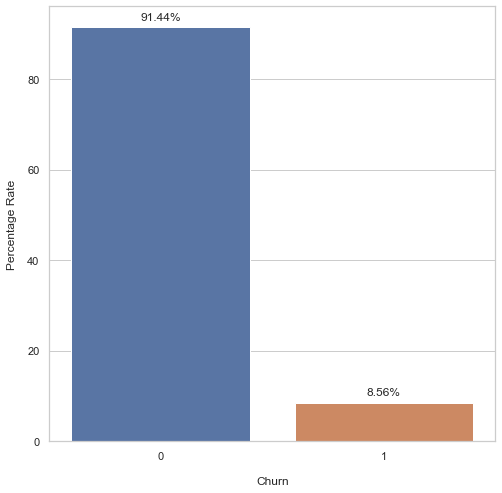

In [66]:
# Get number of positve and negative examples
pos = telecom[telecom["churn"] == 1].shape[0]
neg = telecom[telecom["churn"] == 0].shape[0]

print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")

plt.figure(figsize = (8, 8))

series = round(((telecom["churn"].value_counts(dropna = False))/(len(telecom["churn"])) * 100), 2)

ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel("Churn", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)

# Call Custom Function
add_data_labels(ax)

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

From the above bar plot it is evident that the dataset is highly imbalanced. The proportion for churn to non-churn is around 8%.

For a correct analysis, we need to deal with this class imbalance problem. Review the same beyond Feature Engineering.

### <font color=brown>Univariate - Quantitative variables</font>

In [67]:
# Custom Function for Default Plotting variables

# Function Parameters  - 

# figure_title         -    The title to use for the plot.
# xlabel               -    The x-axis label for the plot.
# ylabel               -    The y-axis label for the plot.

def set_plotting_variable(figure_title, xlabel, ylabel):    
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)

In [68]:
def plot_univariate(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, x_axis, data, wspace):    
    plt.figure(figsize = (figsize_x, figsize_y))    
    title_1 = "Distribution Plot of " + xlabel
    title_2 = "Box Plot of " + xlabel

    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)

    sns.distplot(data[x_axis], hist = True, kde = True, color = 'g')
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, ylabel)

    # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)

    sns.boxplot(x = x_axis, data = data, color = 'm')
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, ylabel)
    
    plt.subplots_adjust(wspace = wspace)
    plt.show()

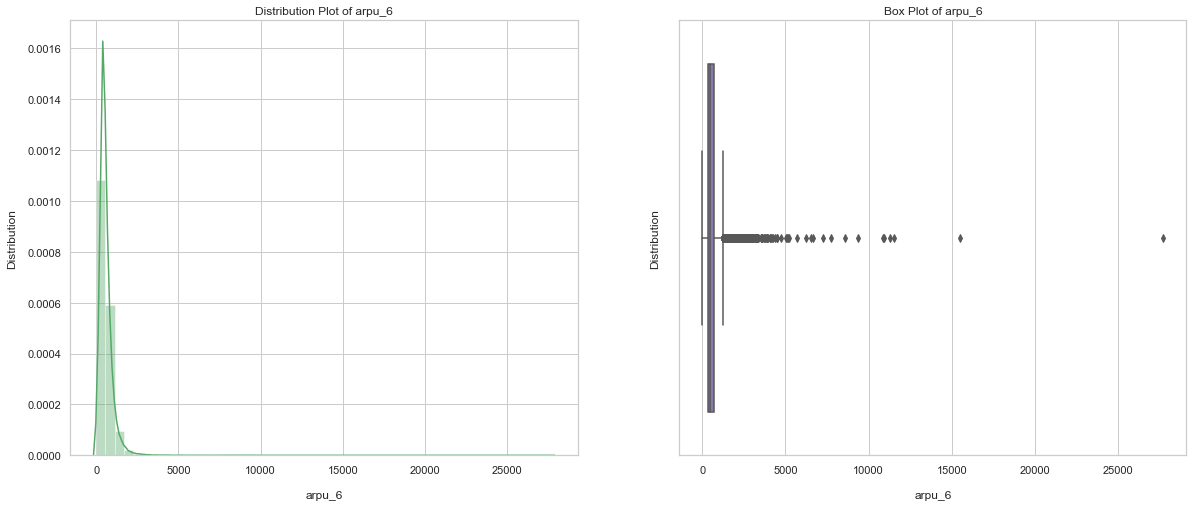

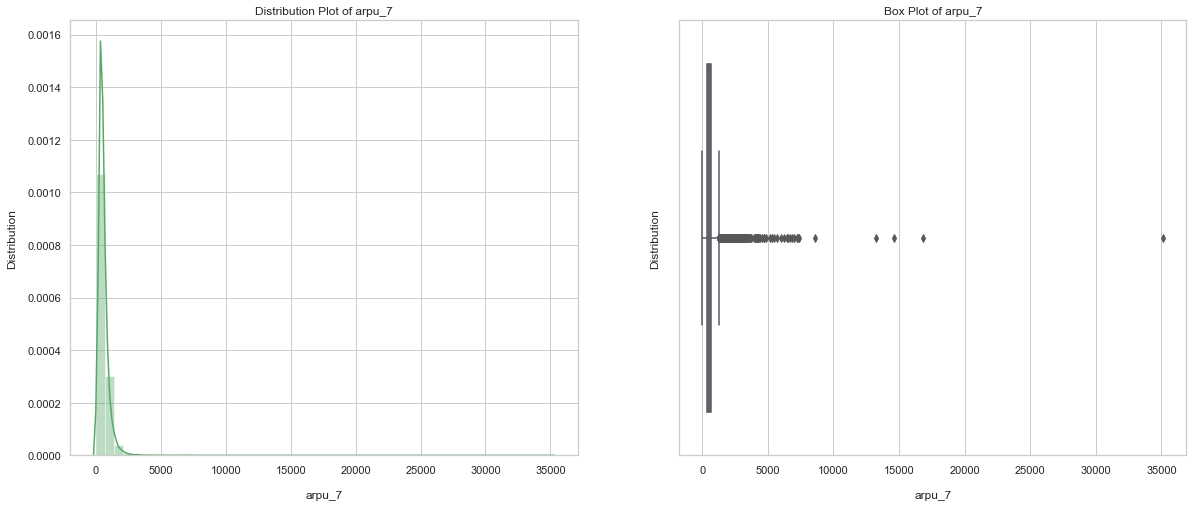

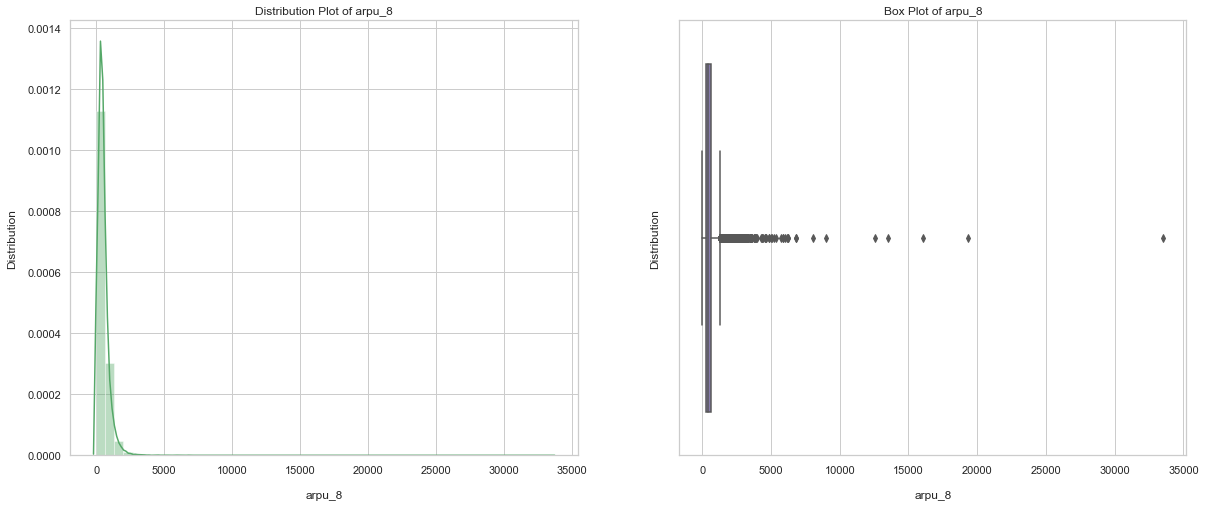

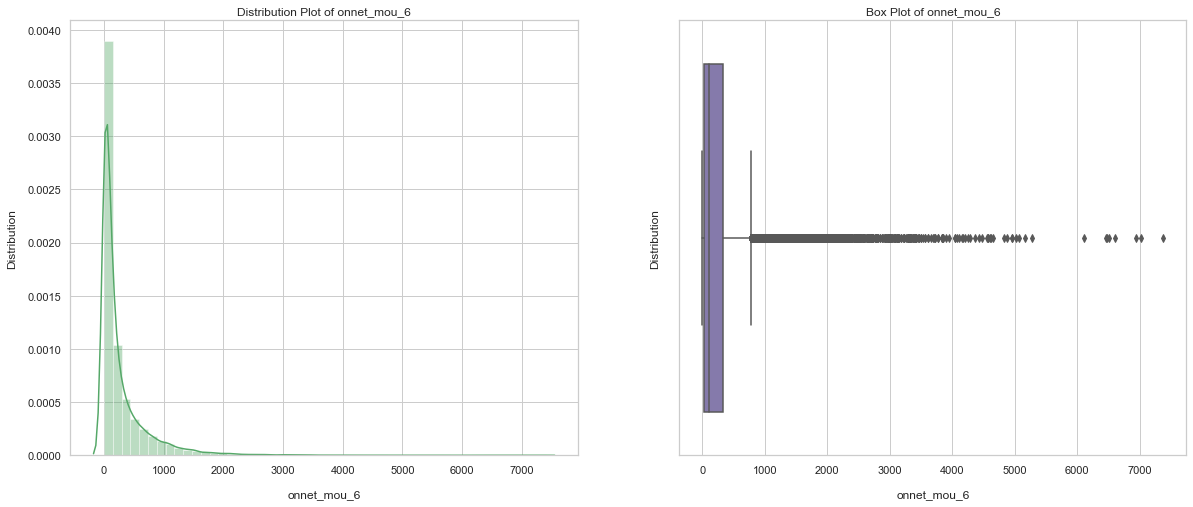

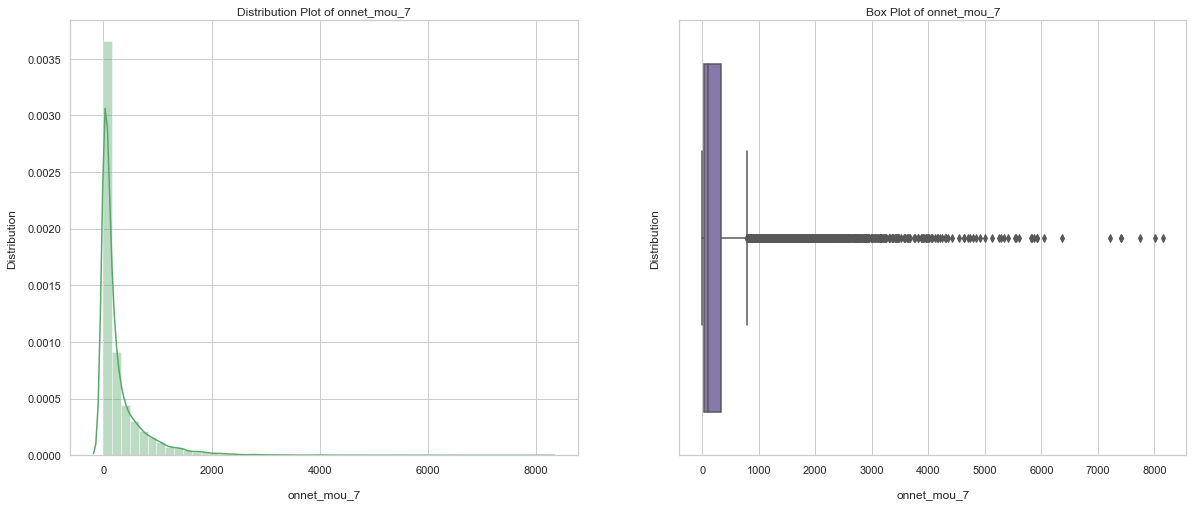

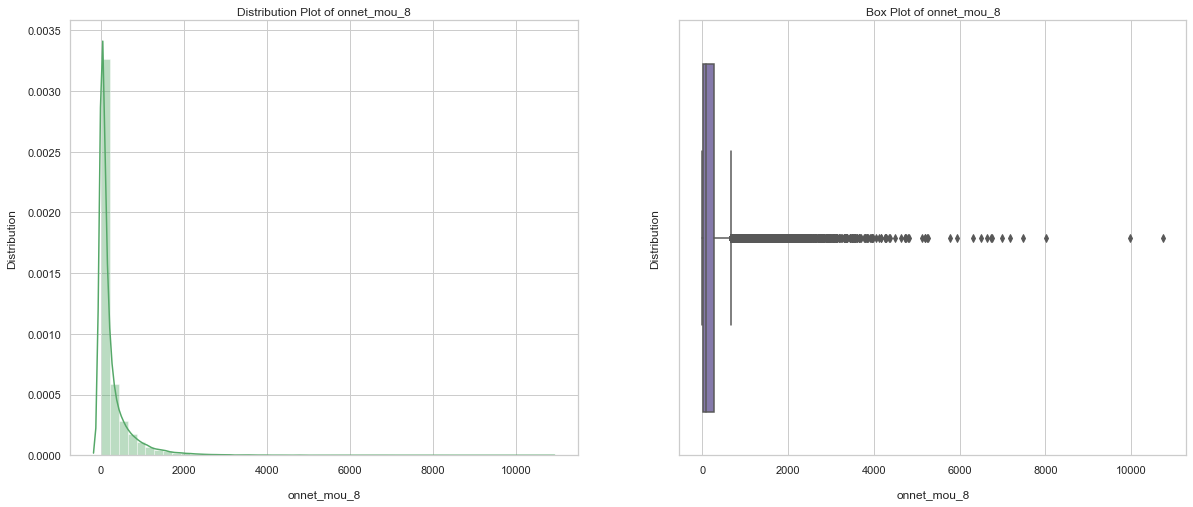

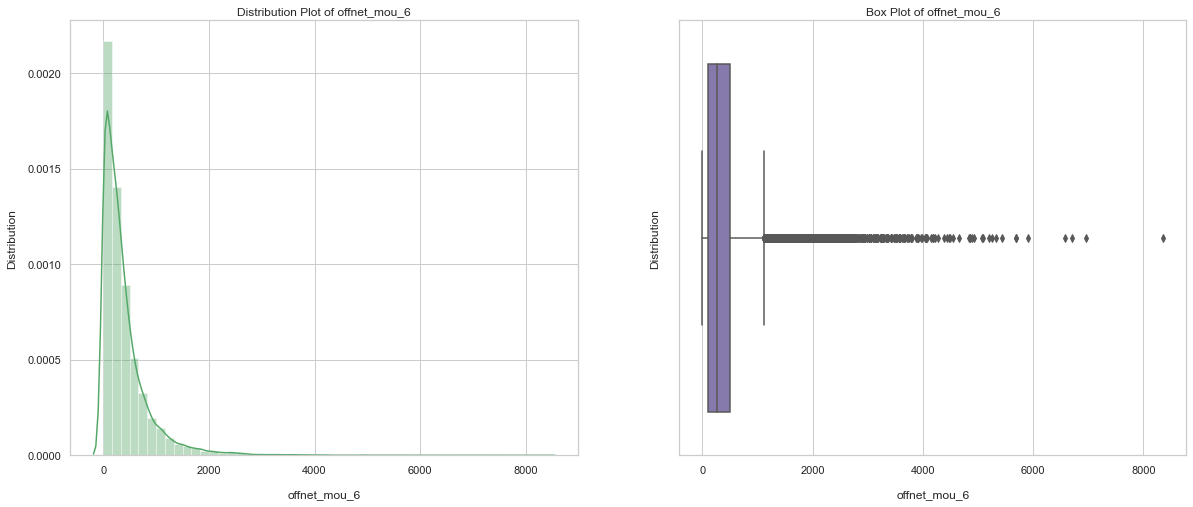

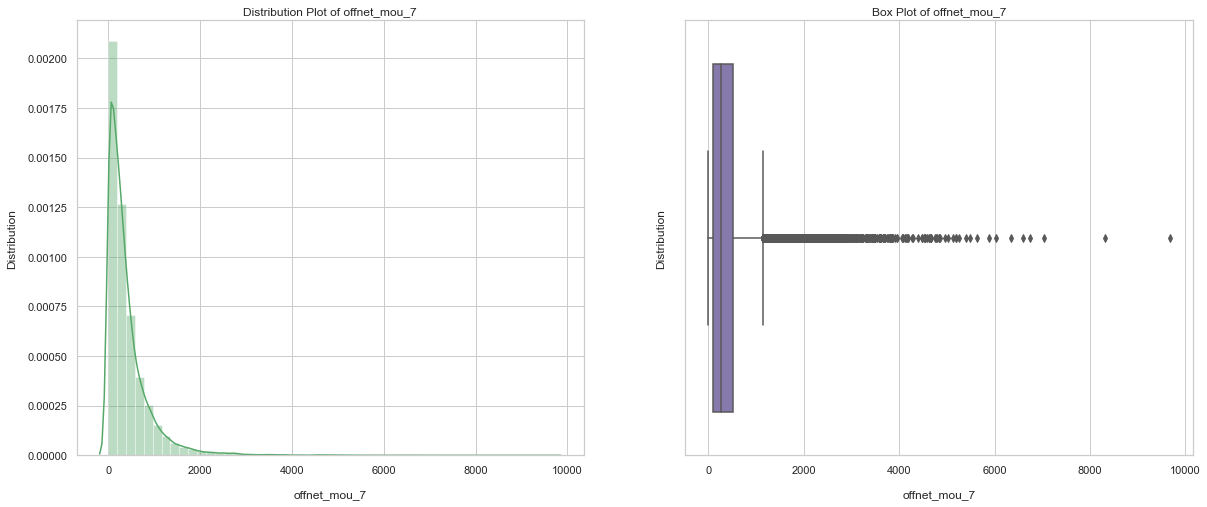

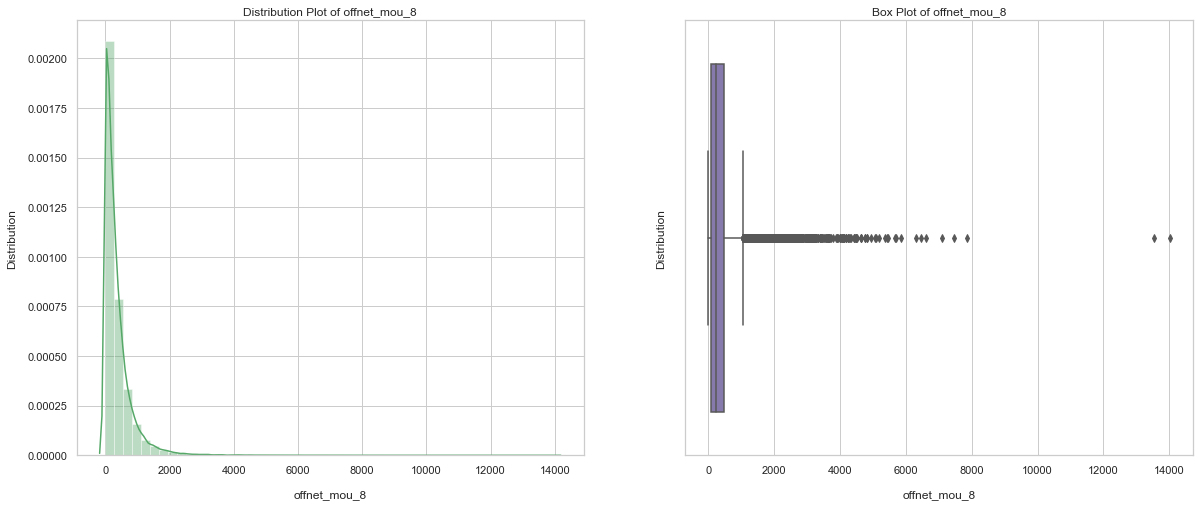

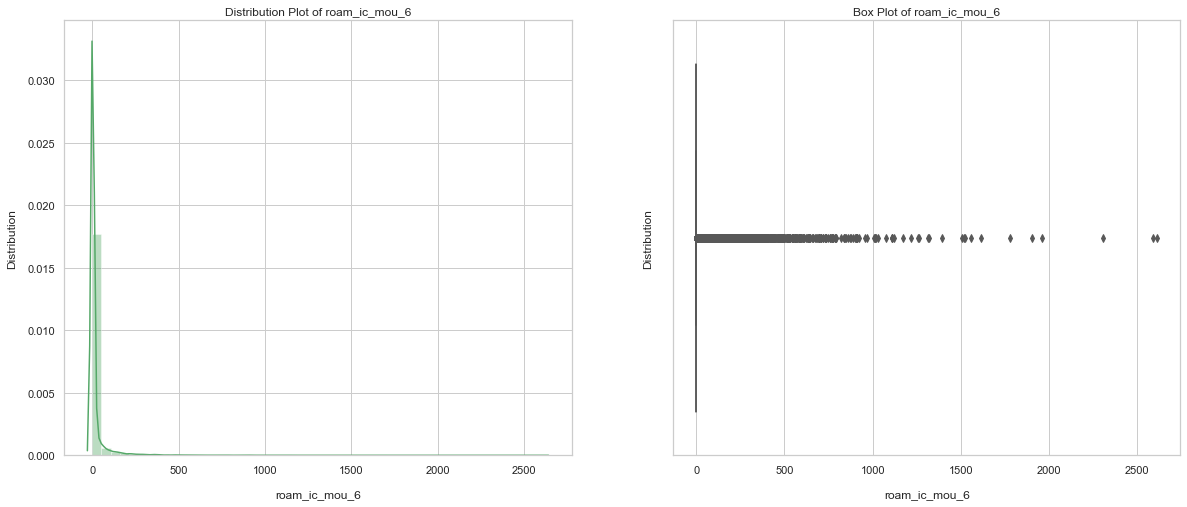

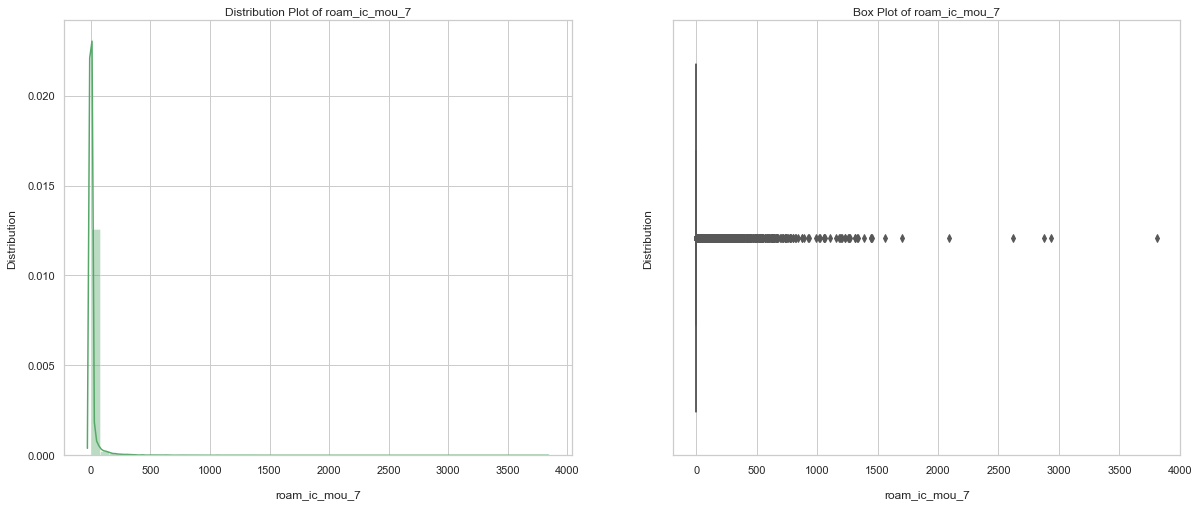

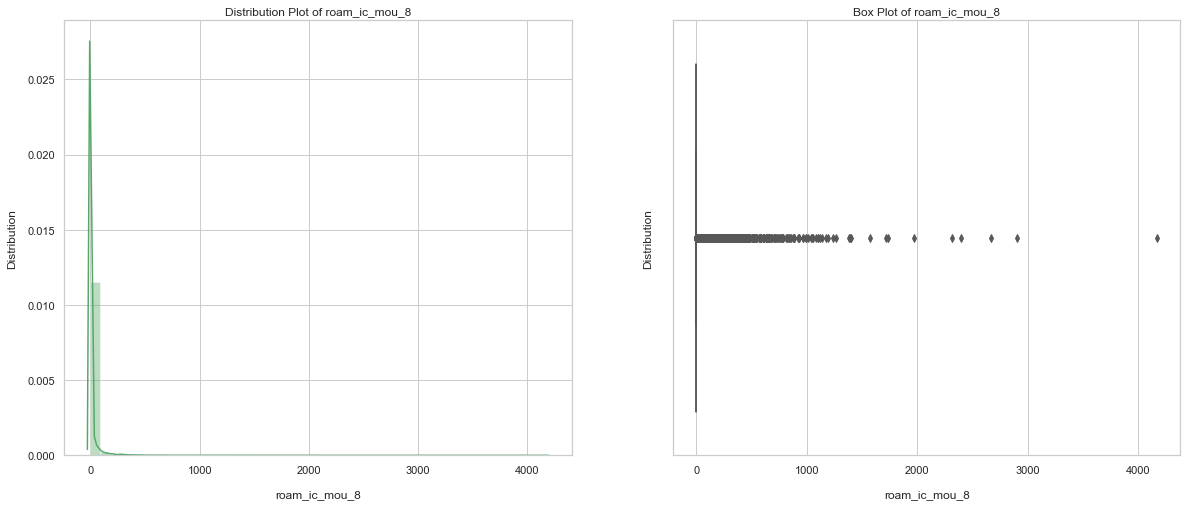

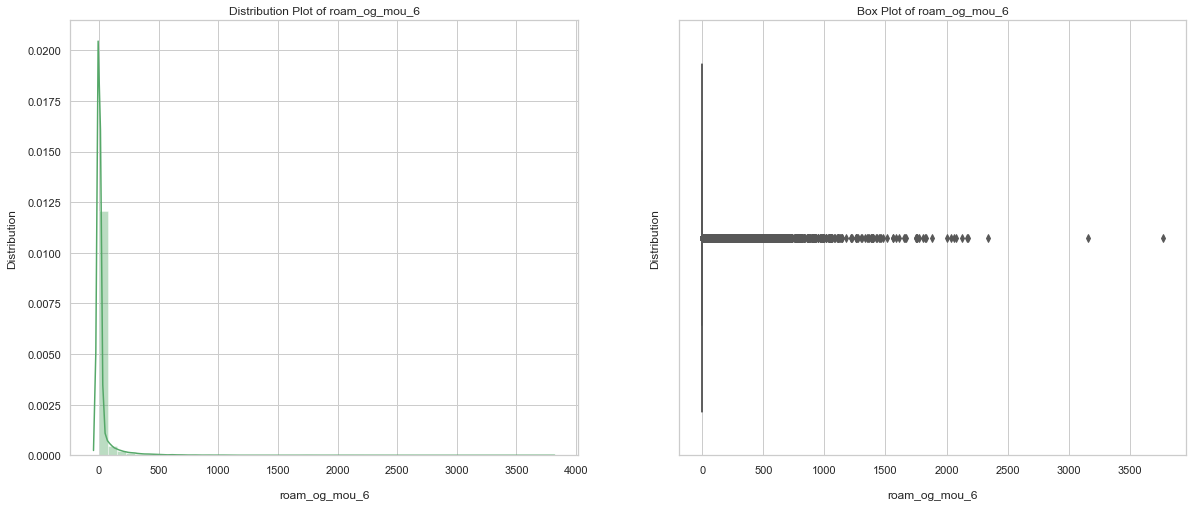

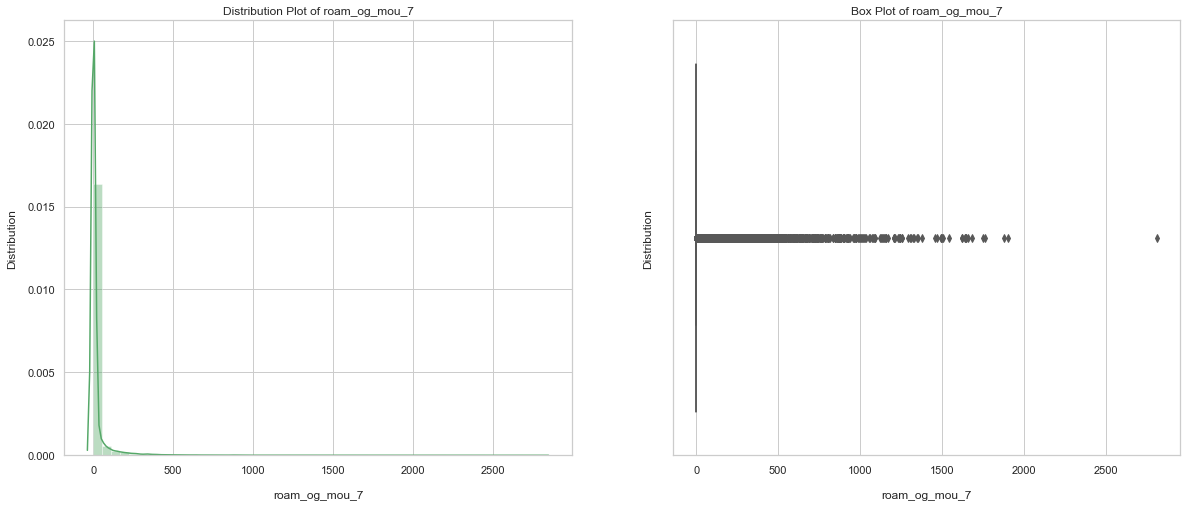

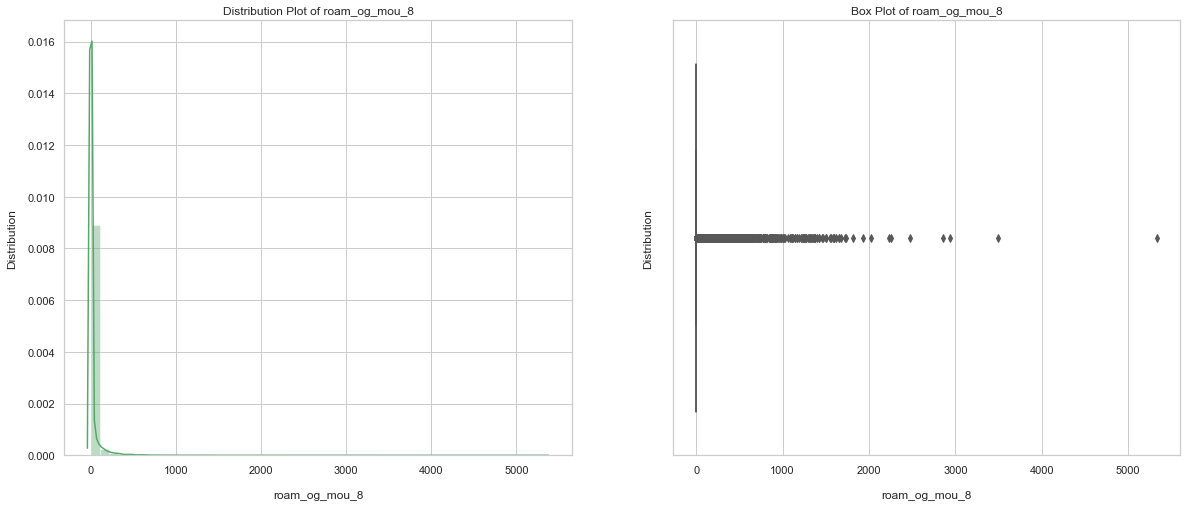

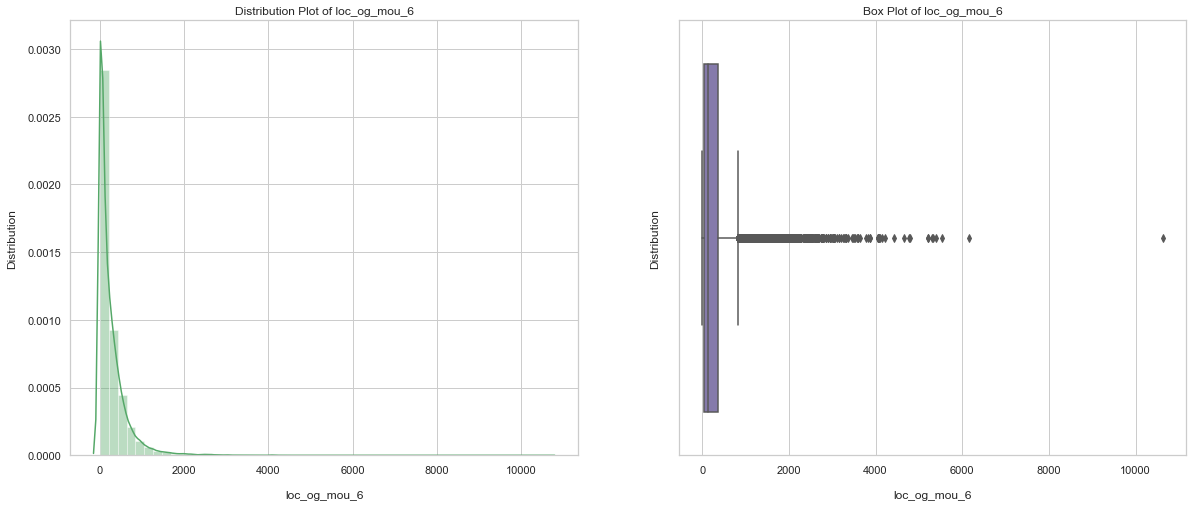

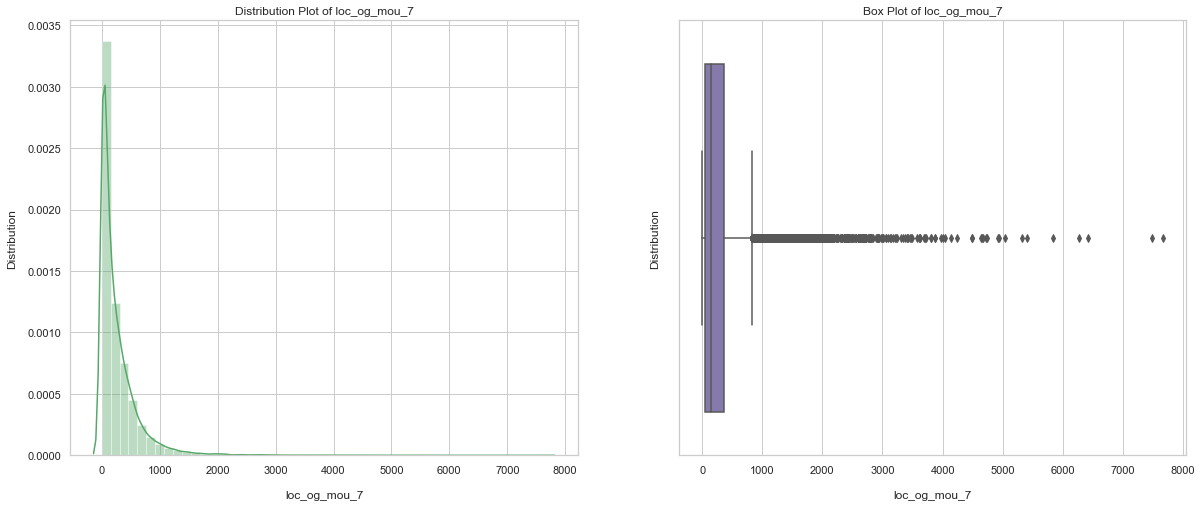

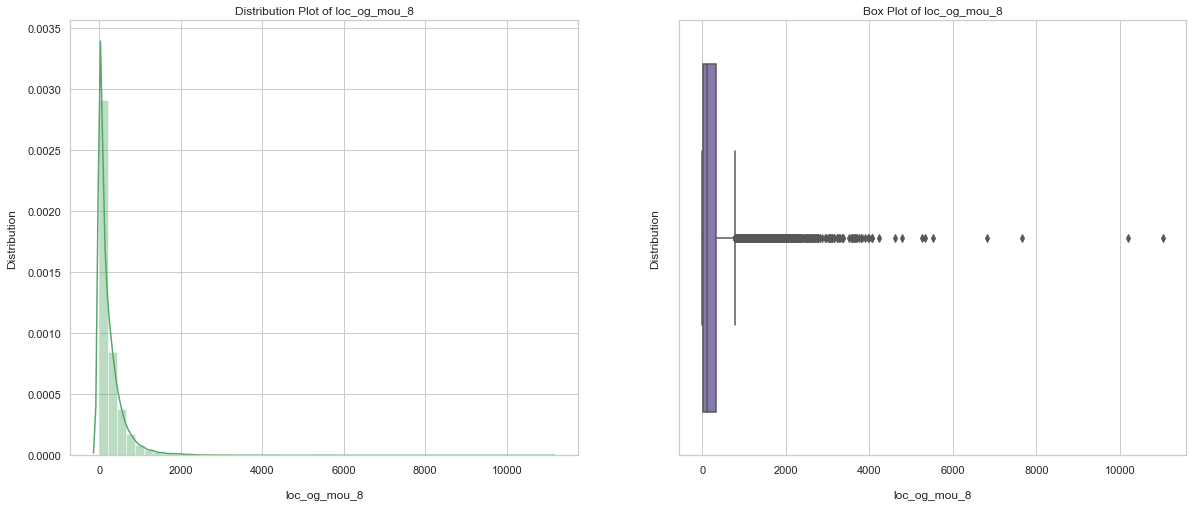

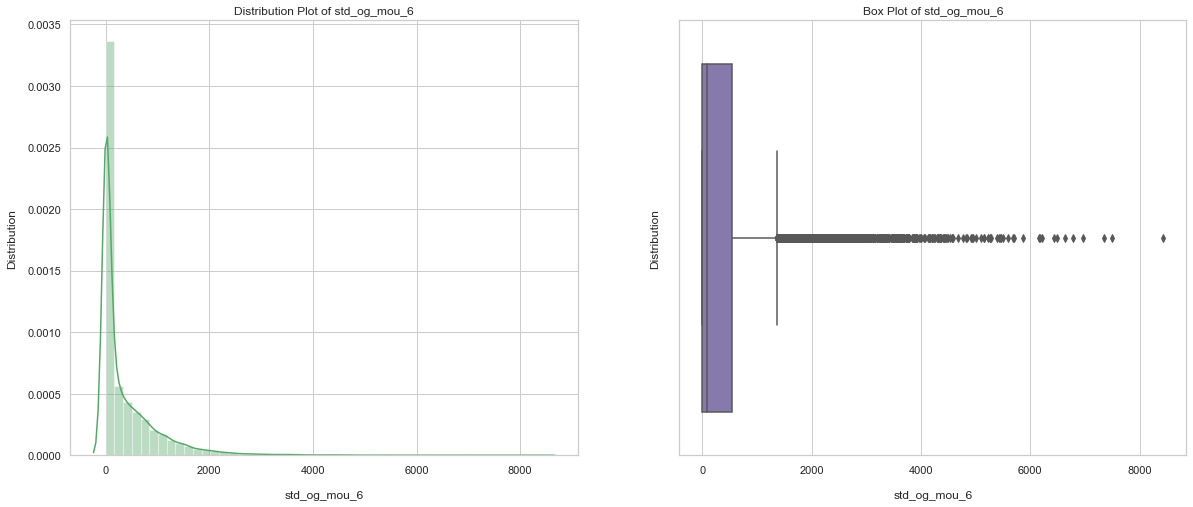

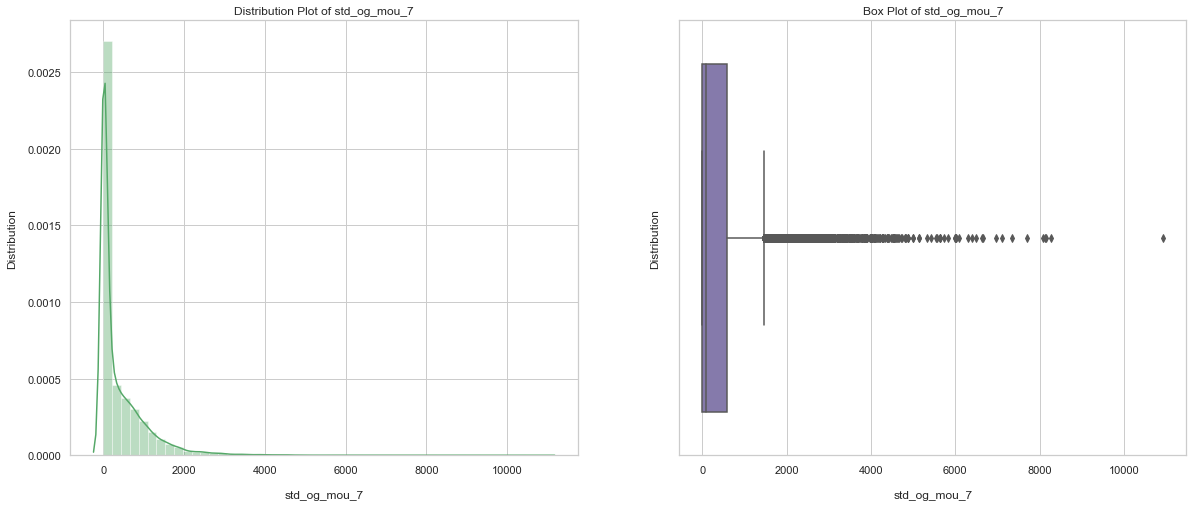

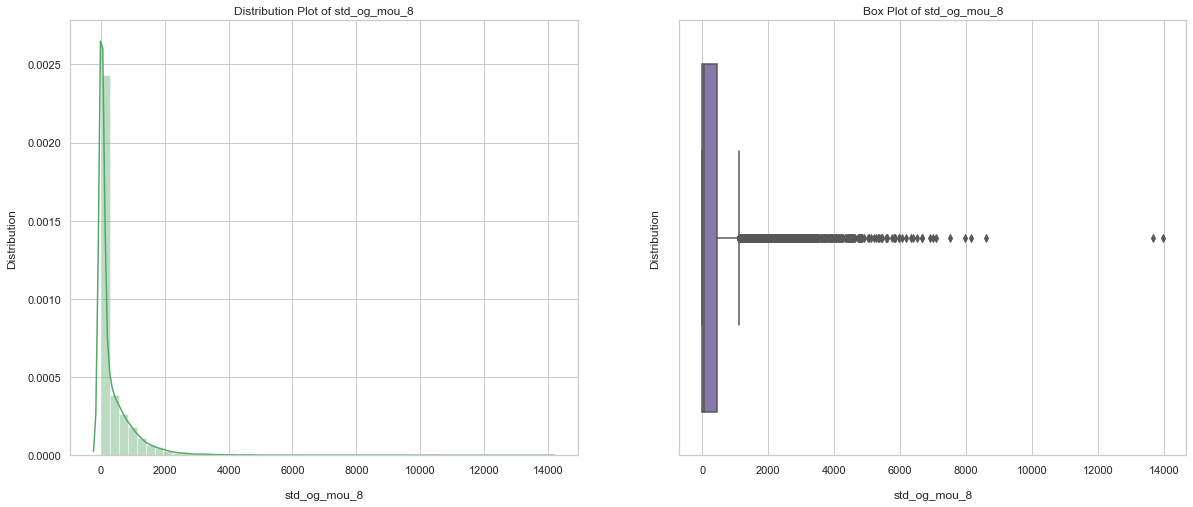

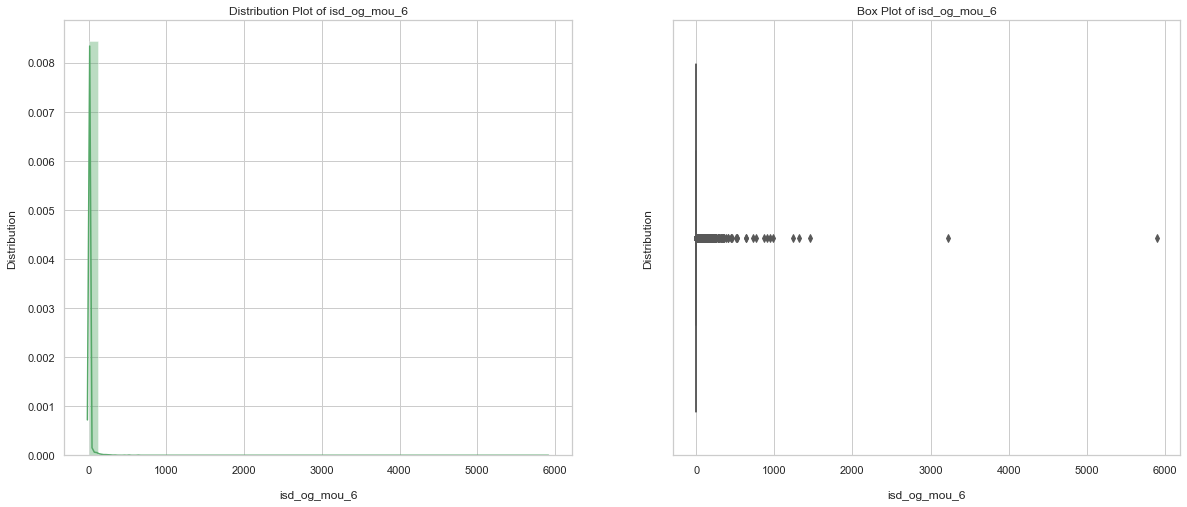

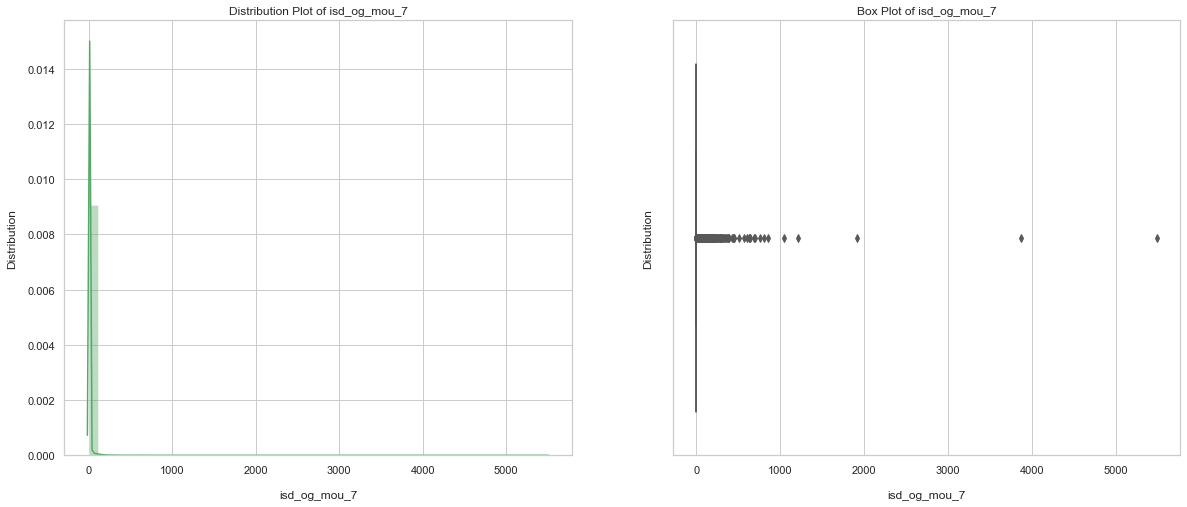

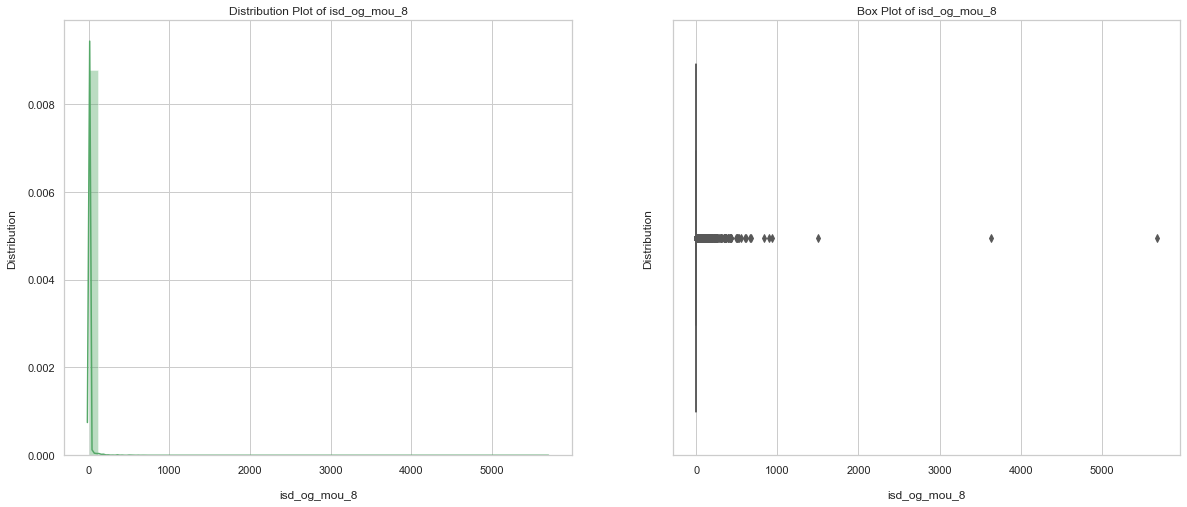

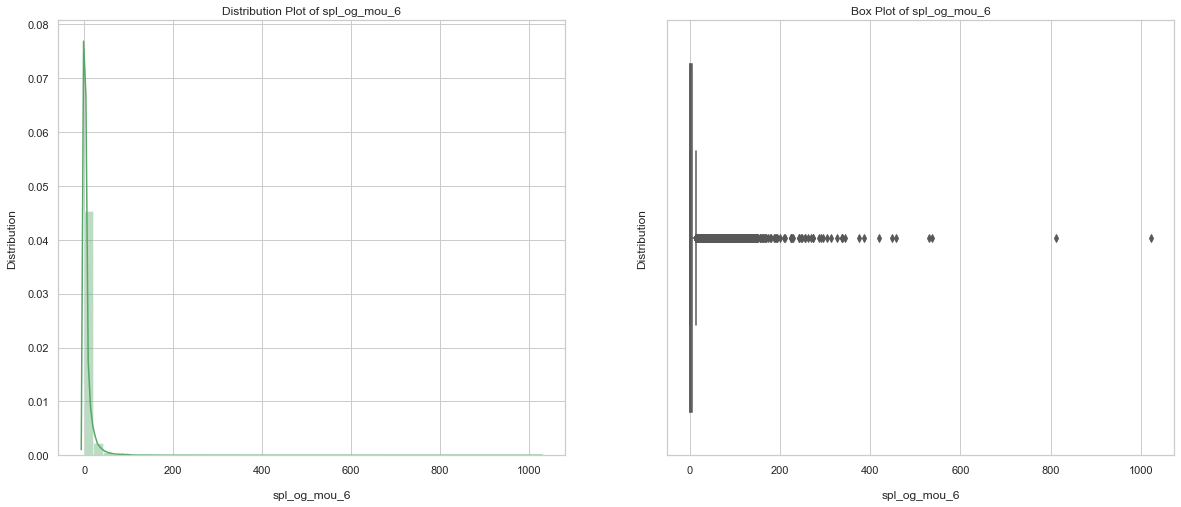

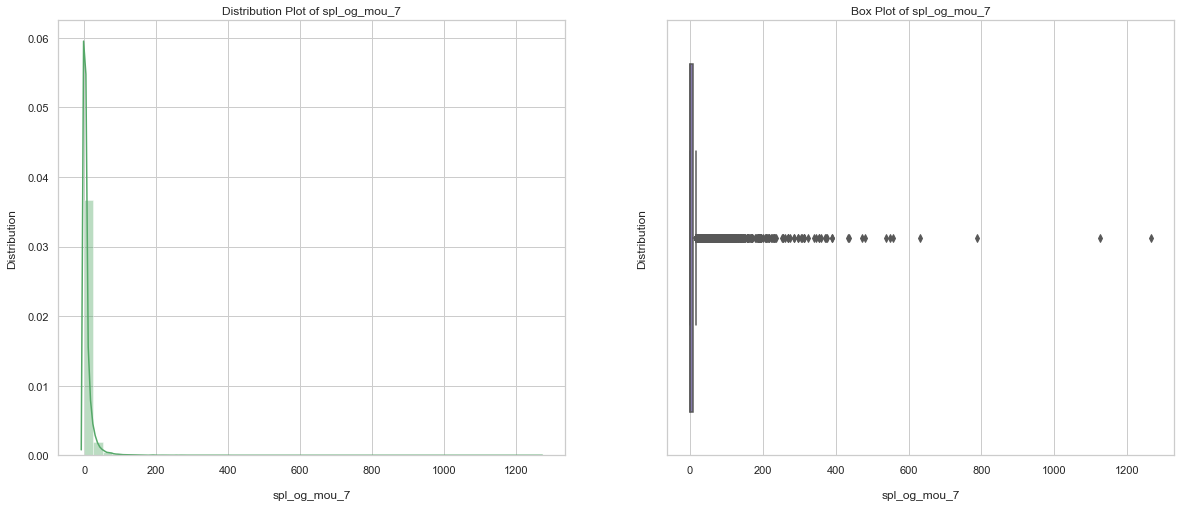

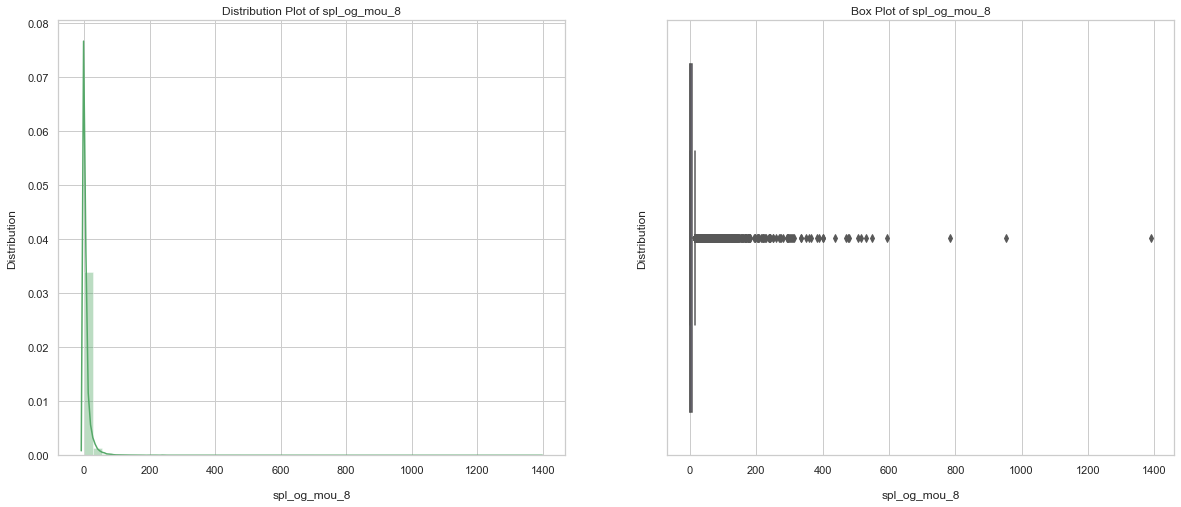

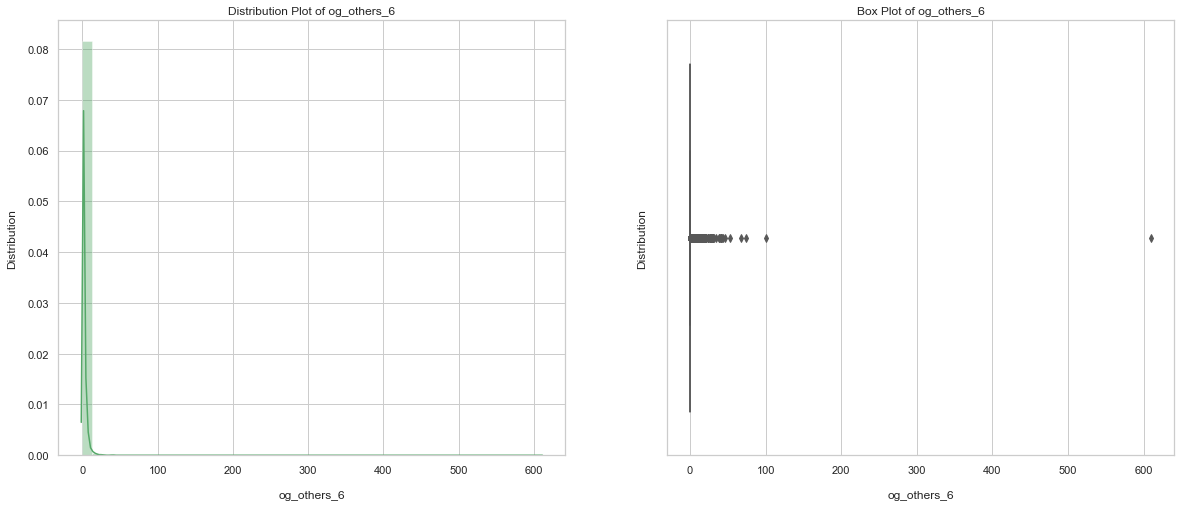

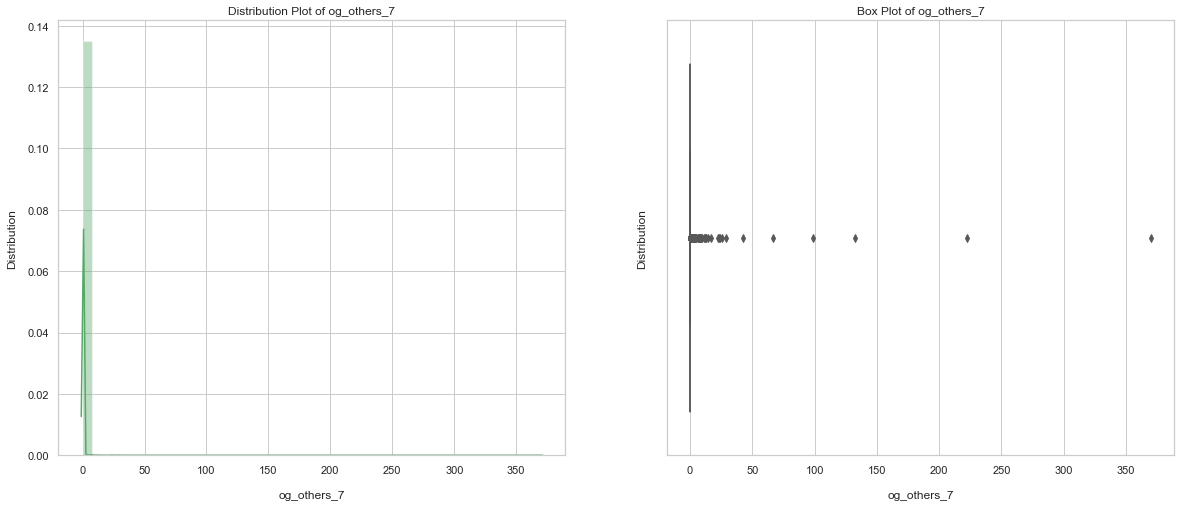

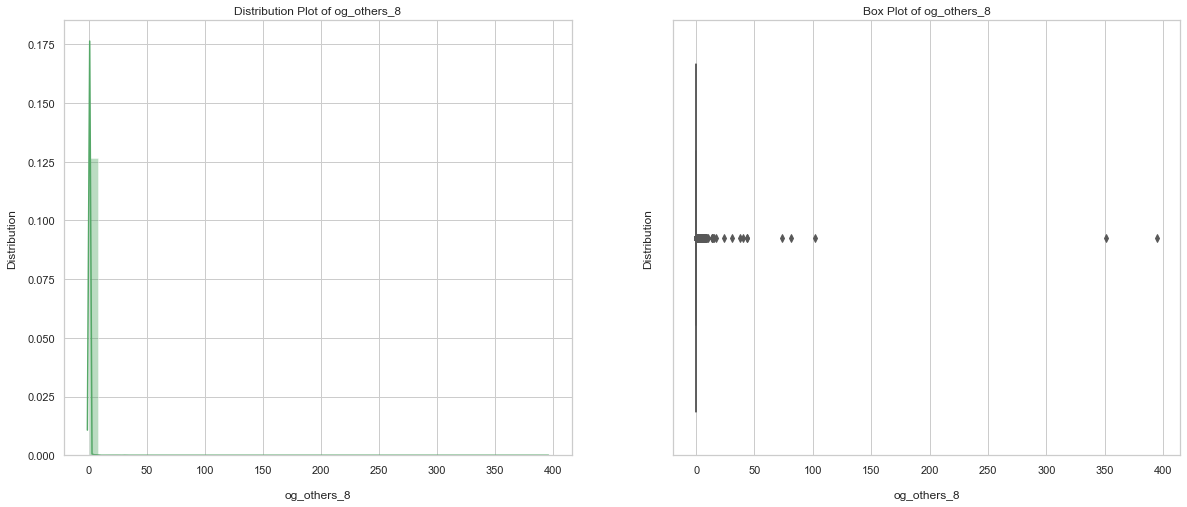

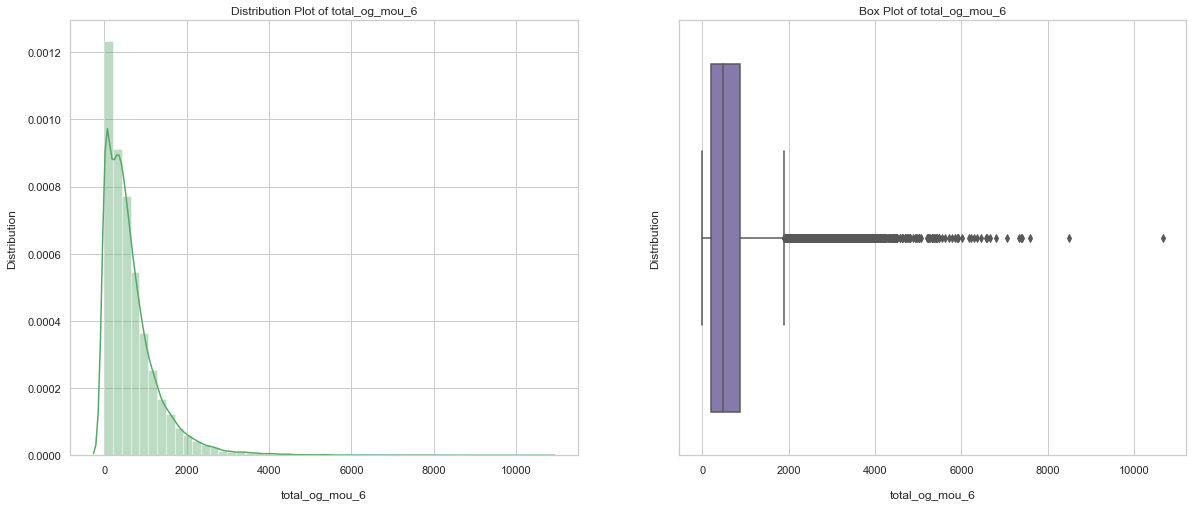

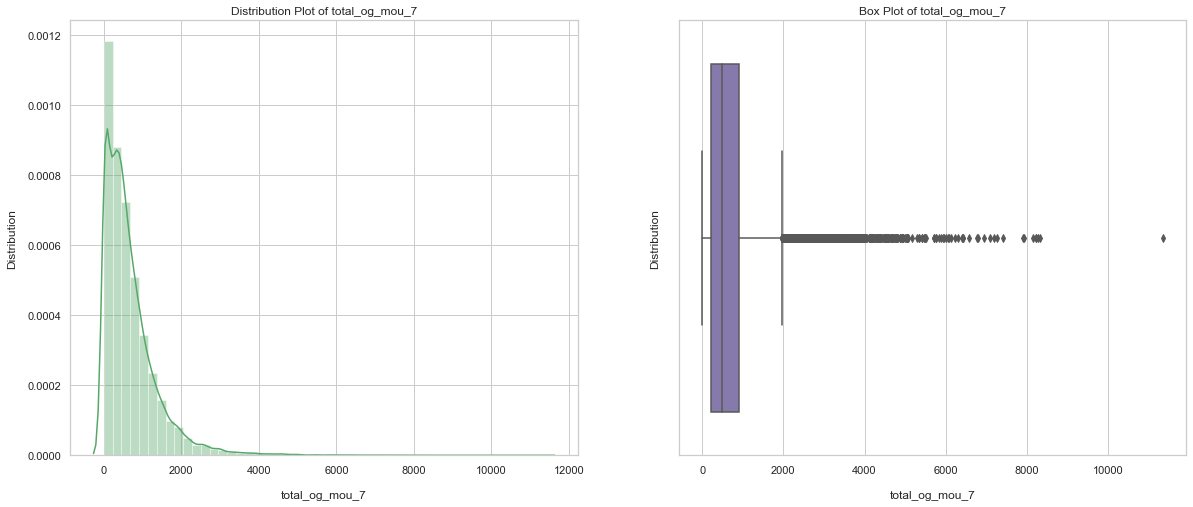

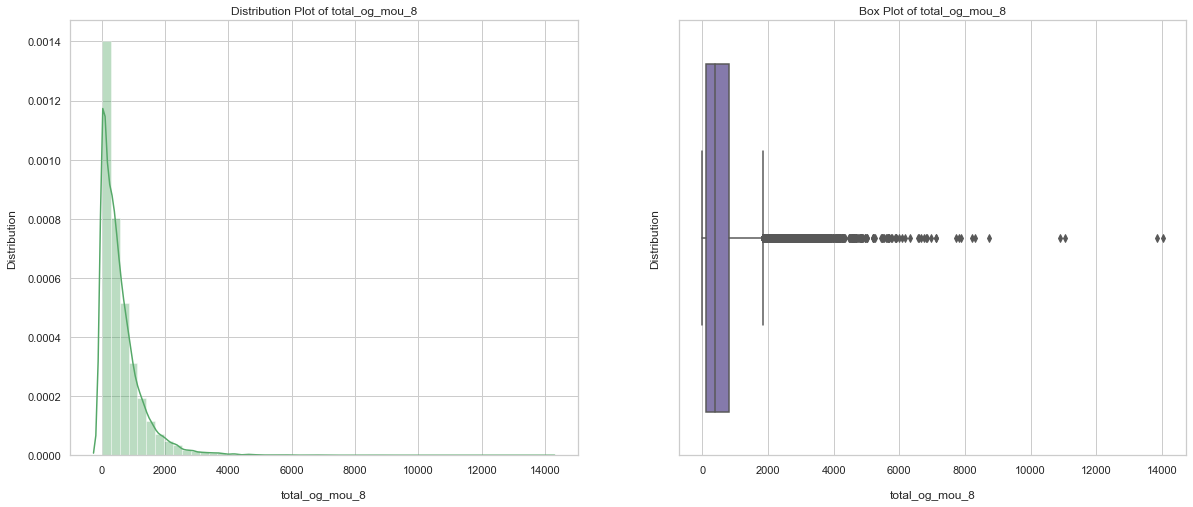

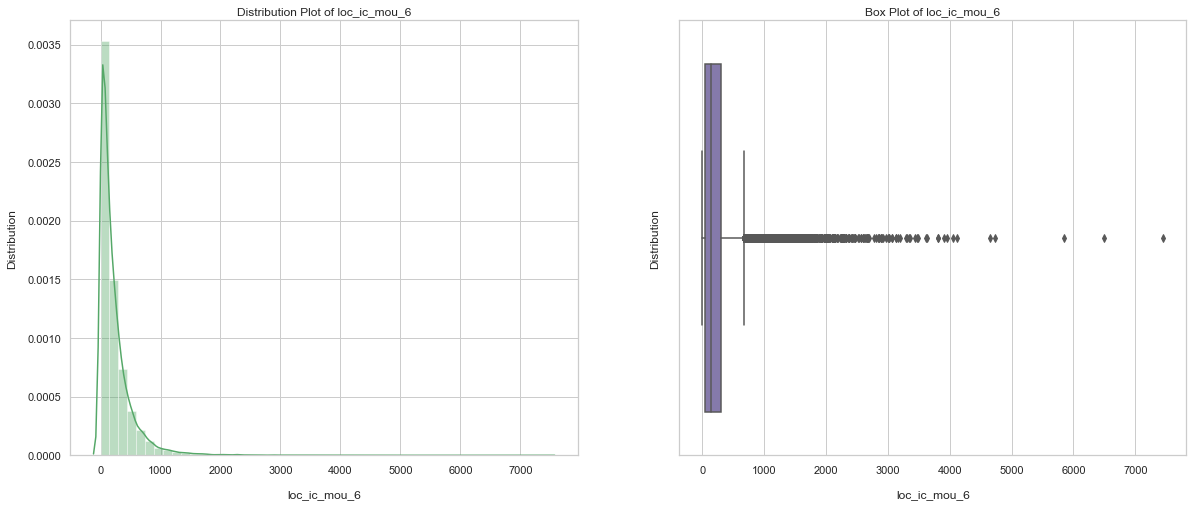

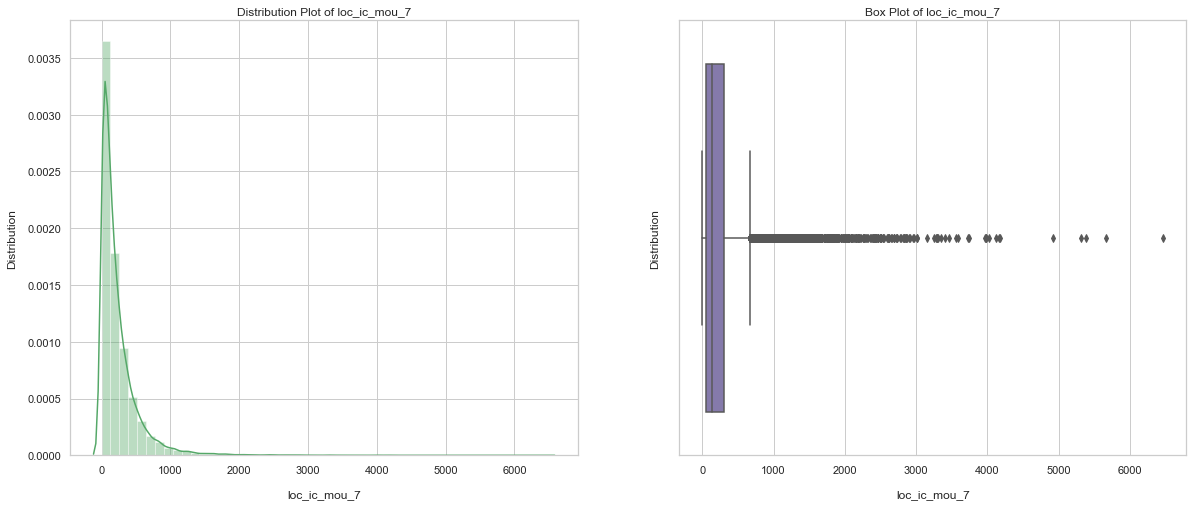

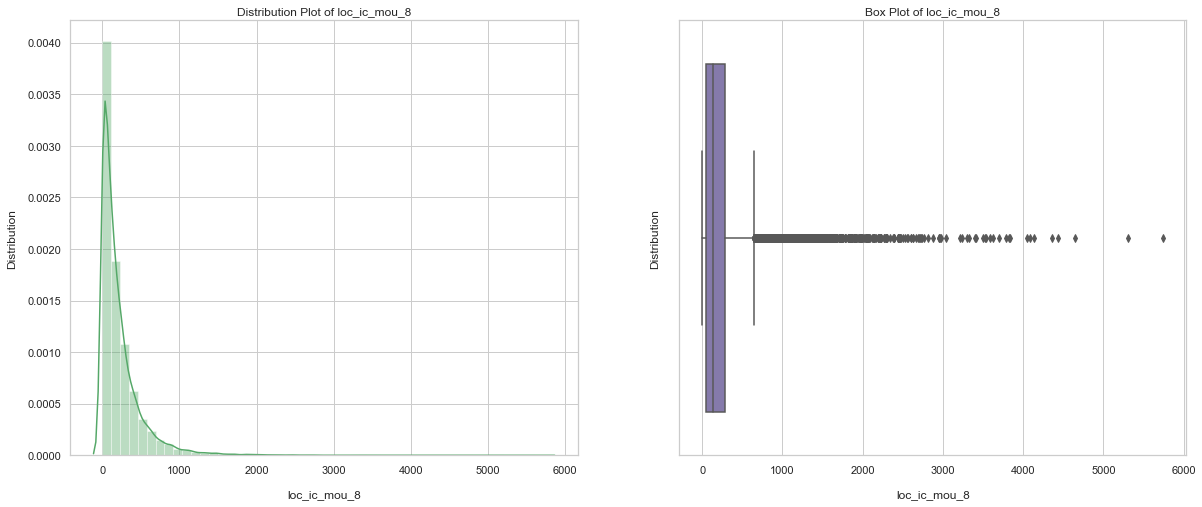

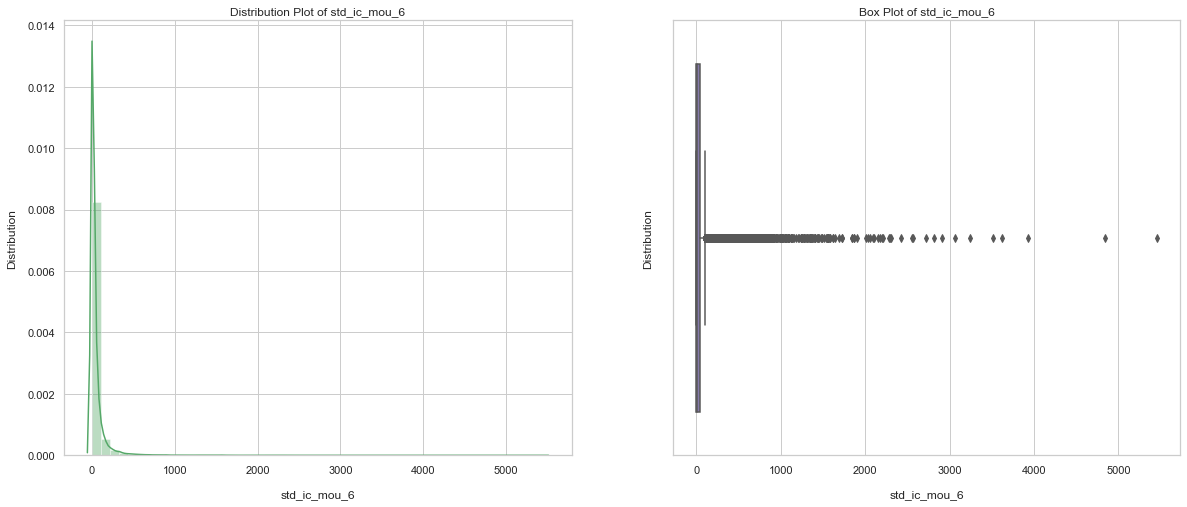

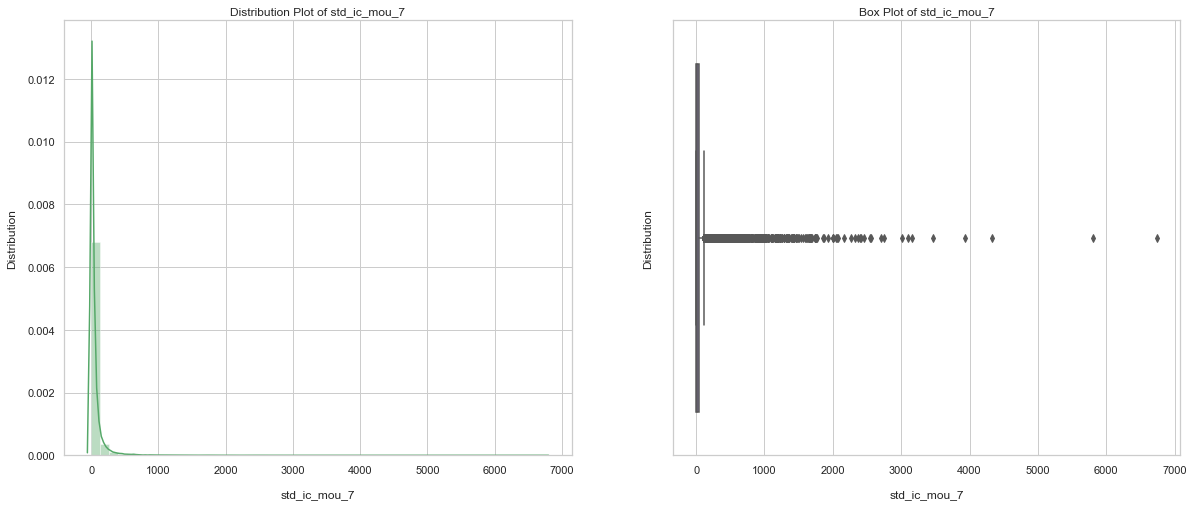

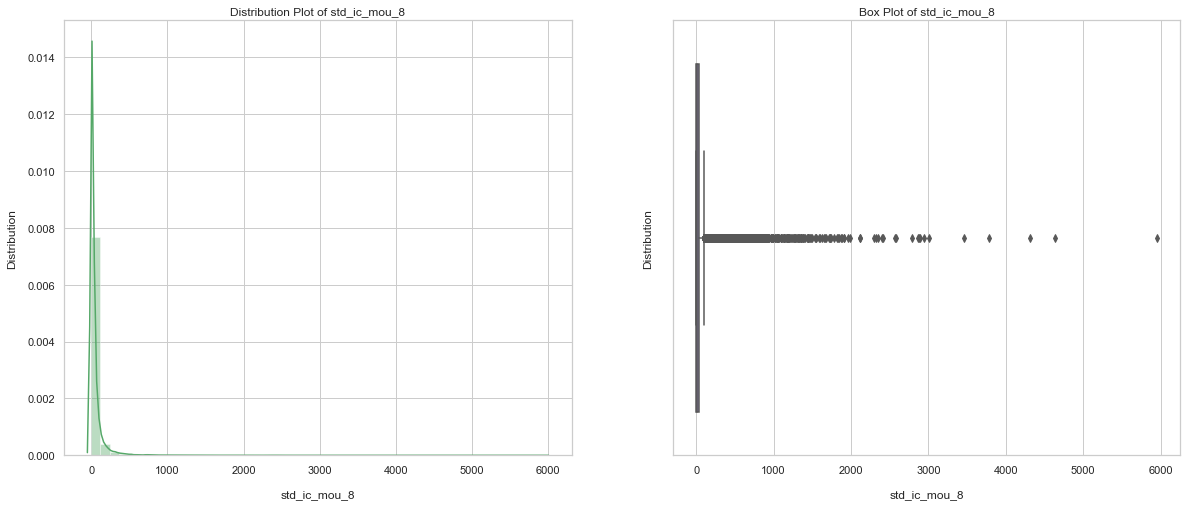

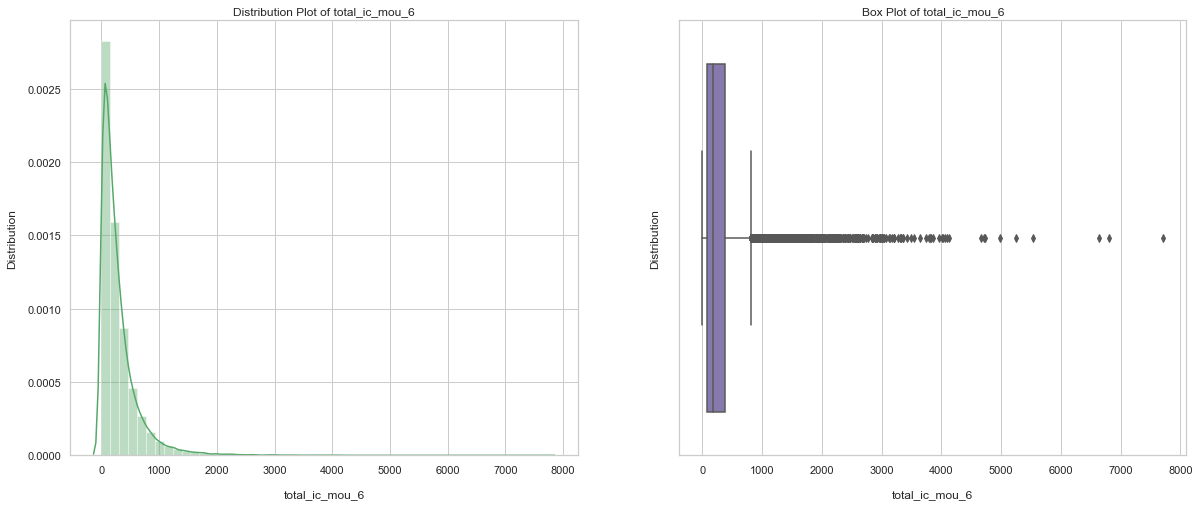

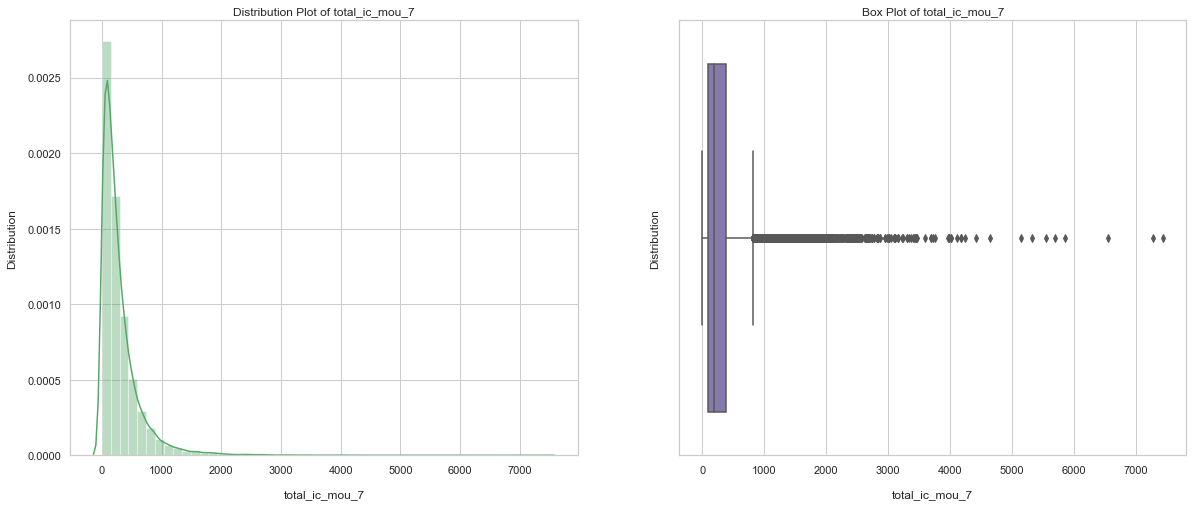

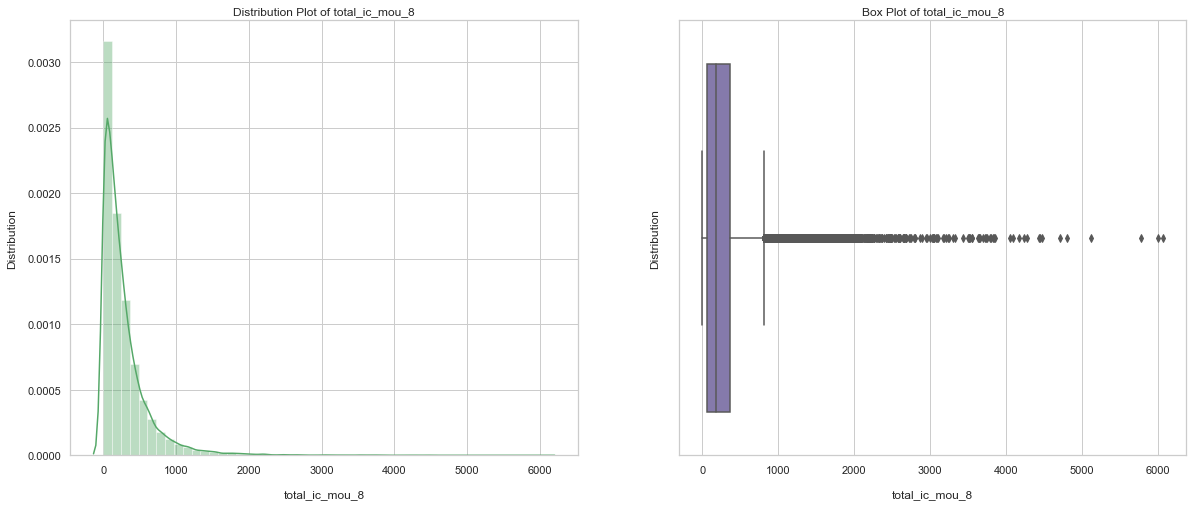

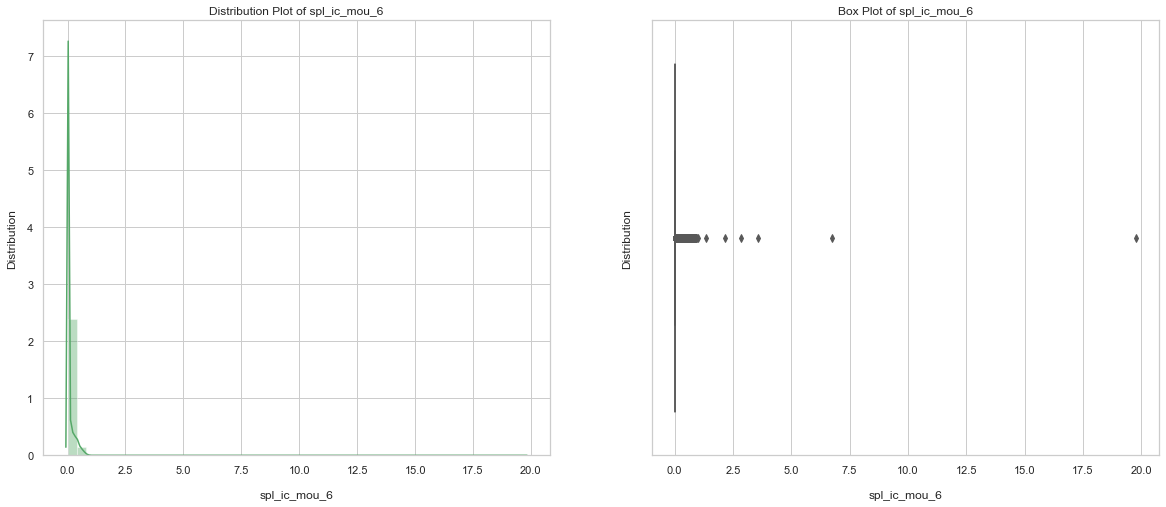

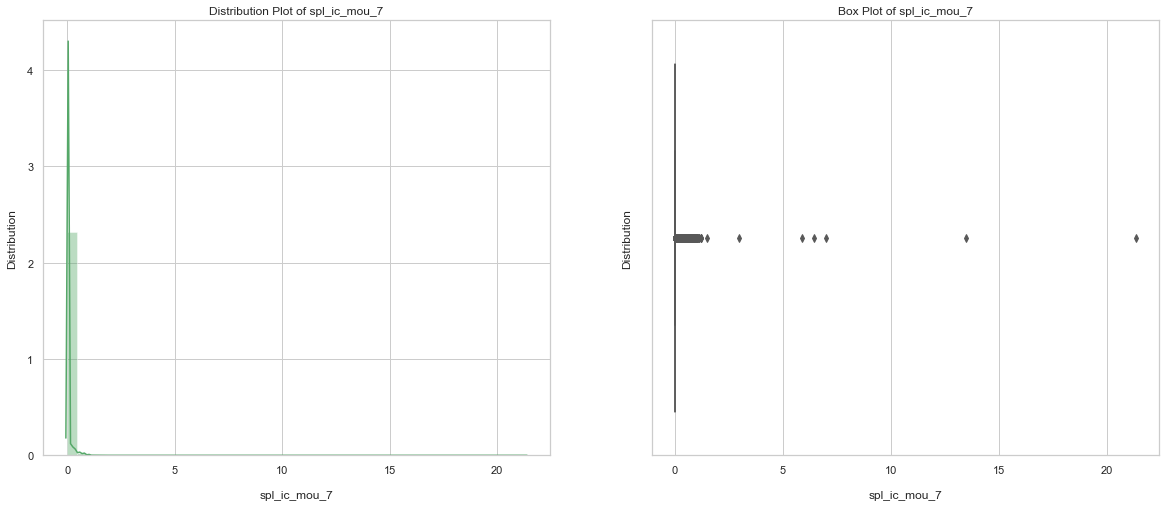

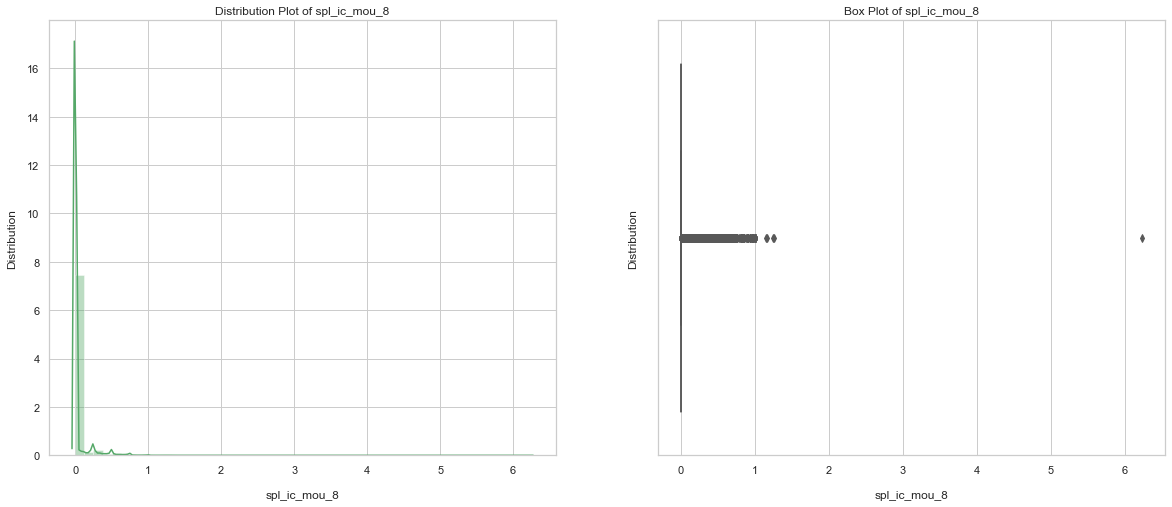

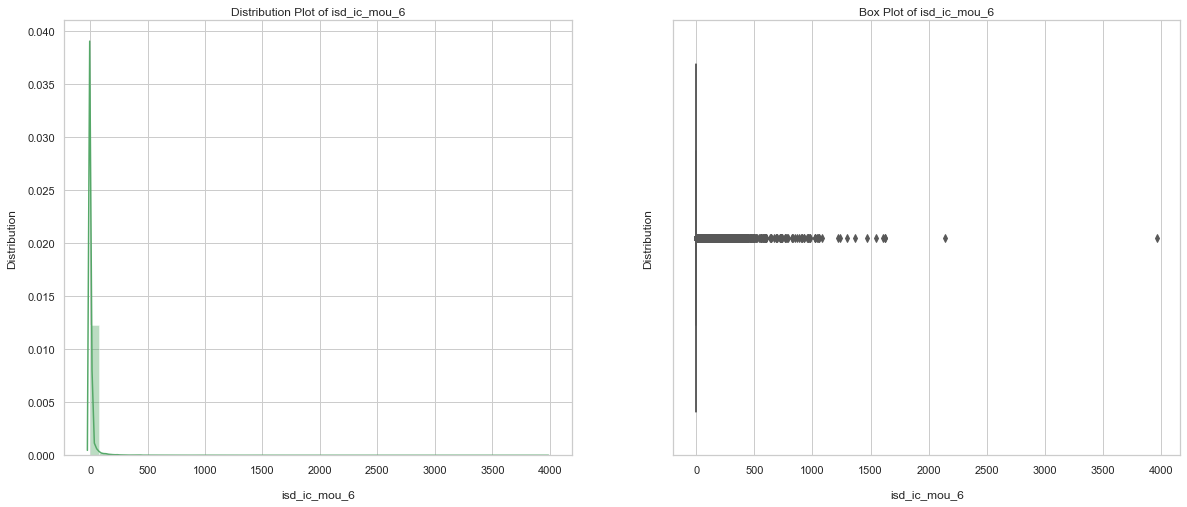

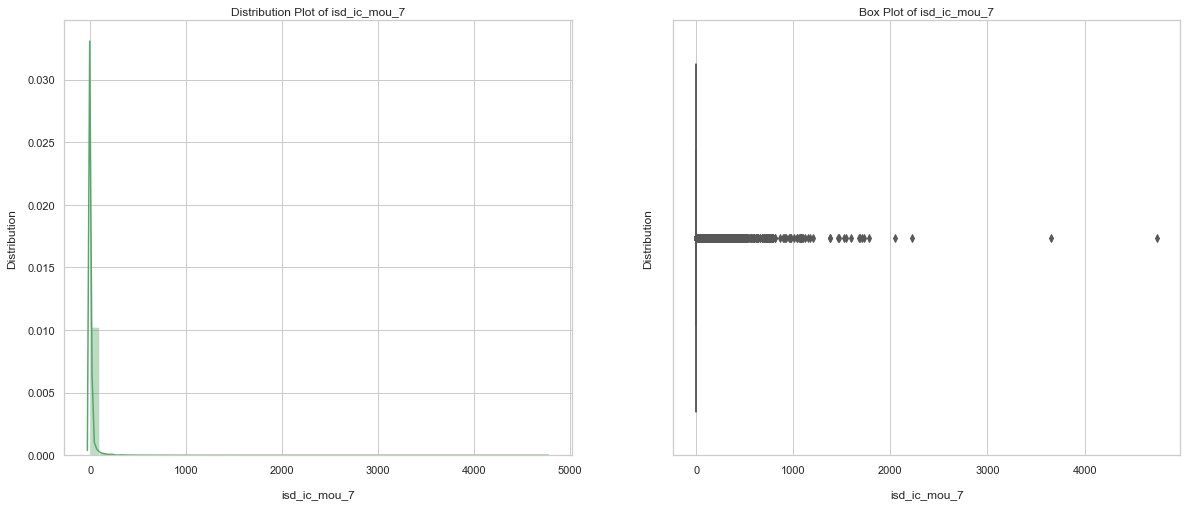

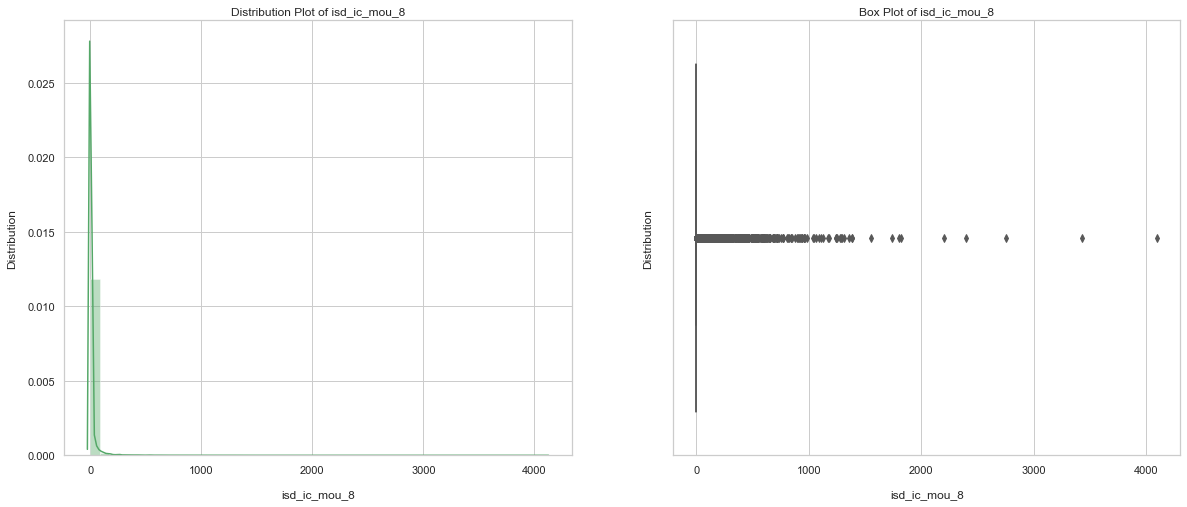

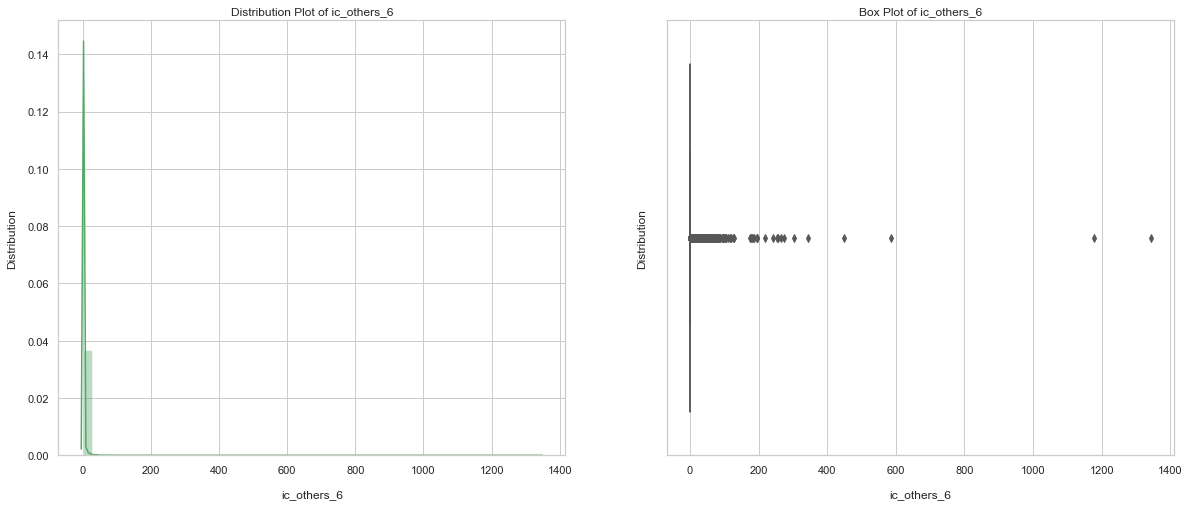

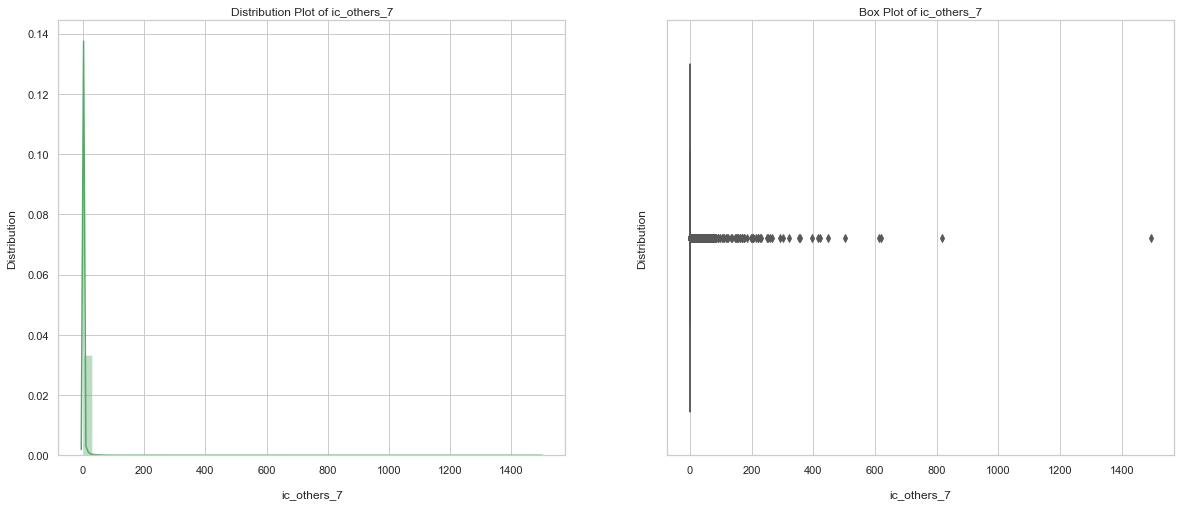

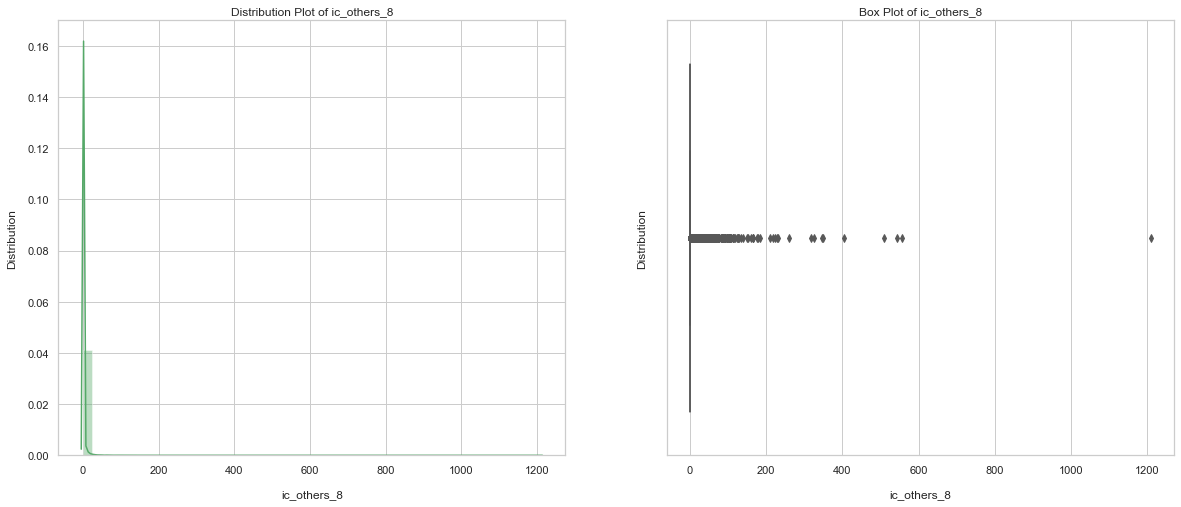

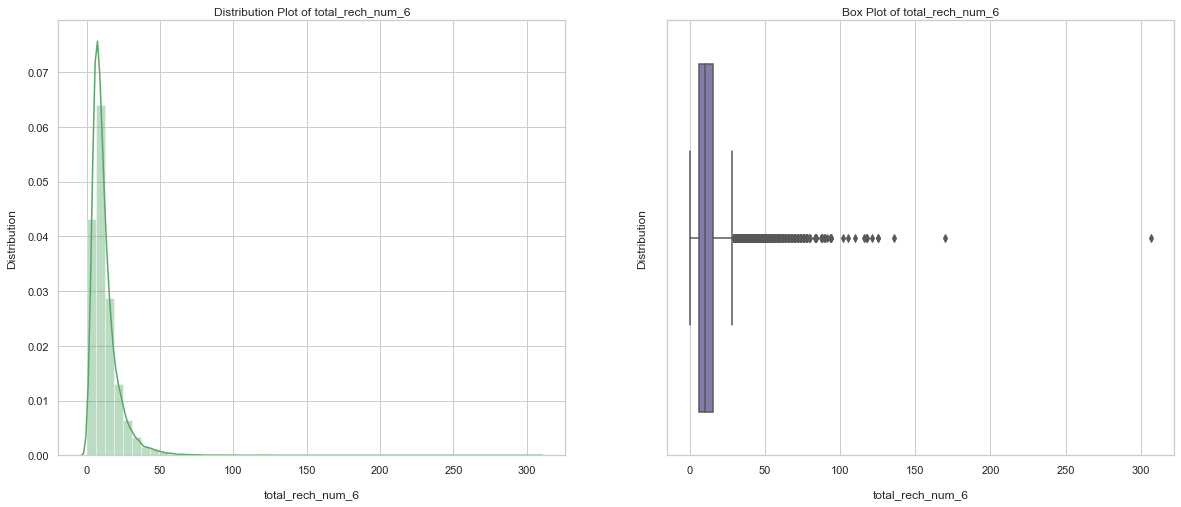

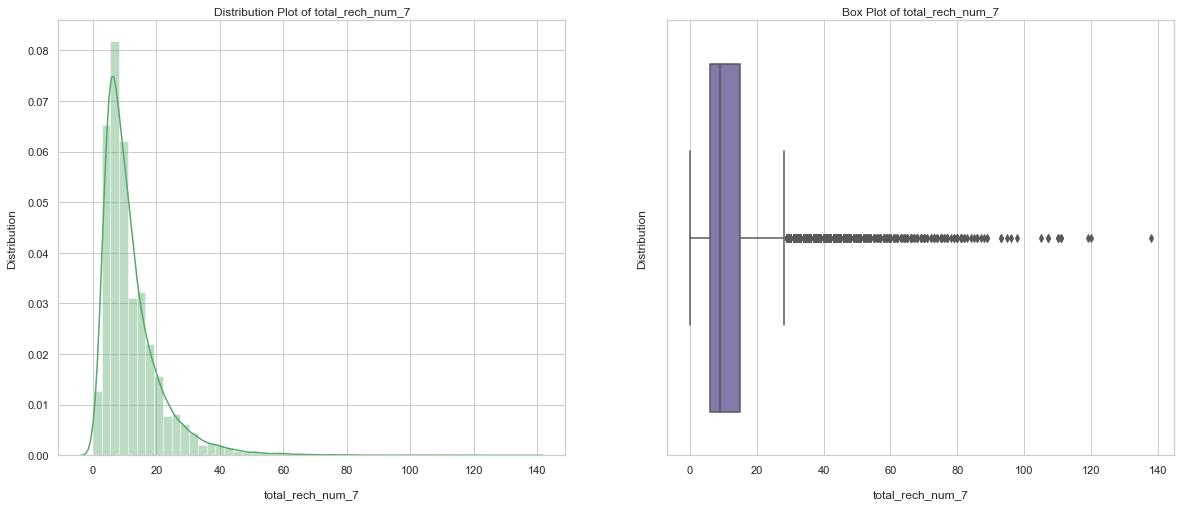

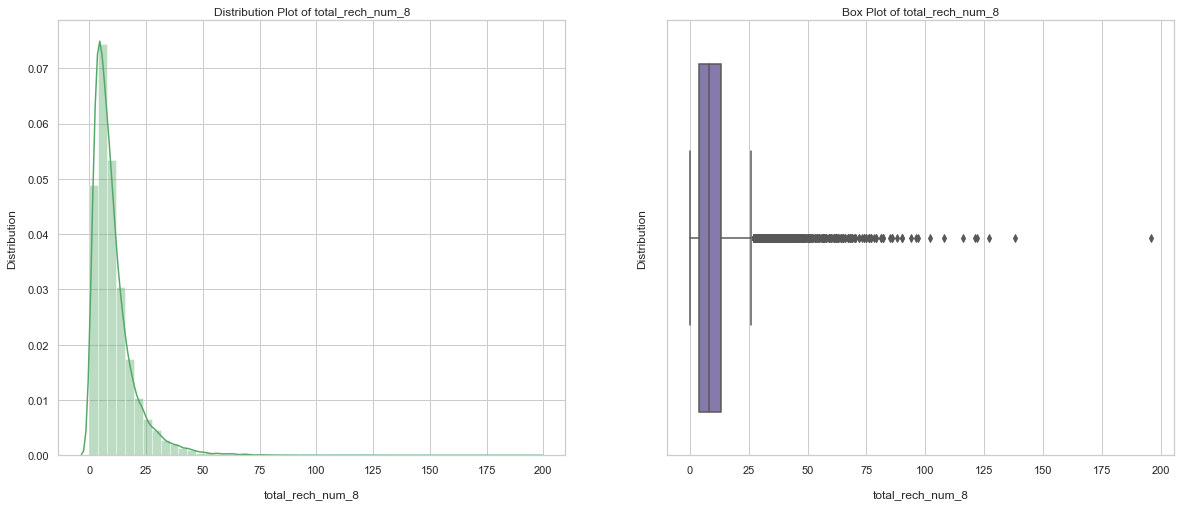

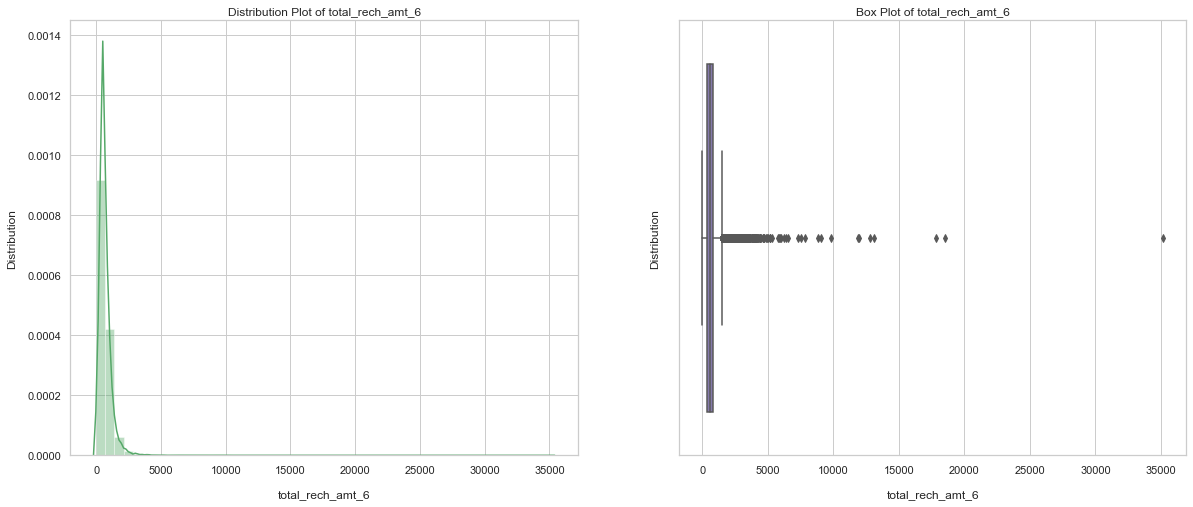

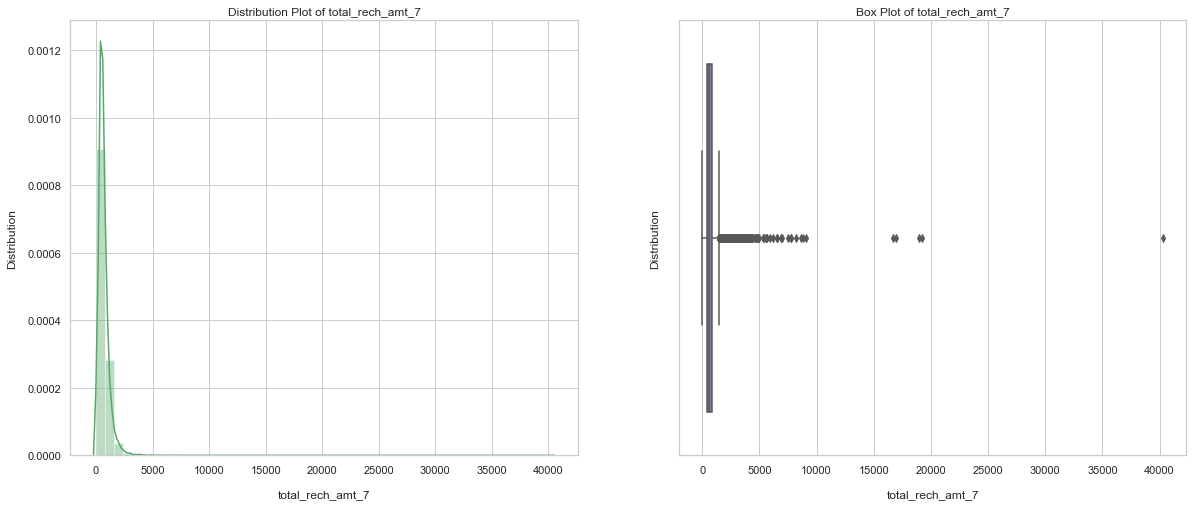

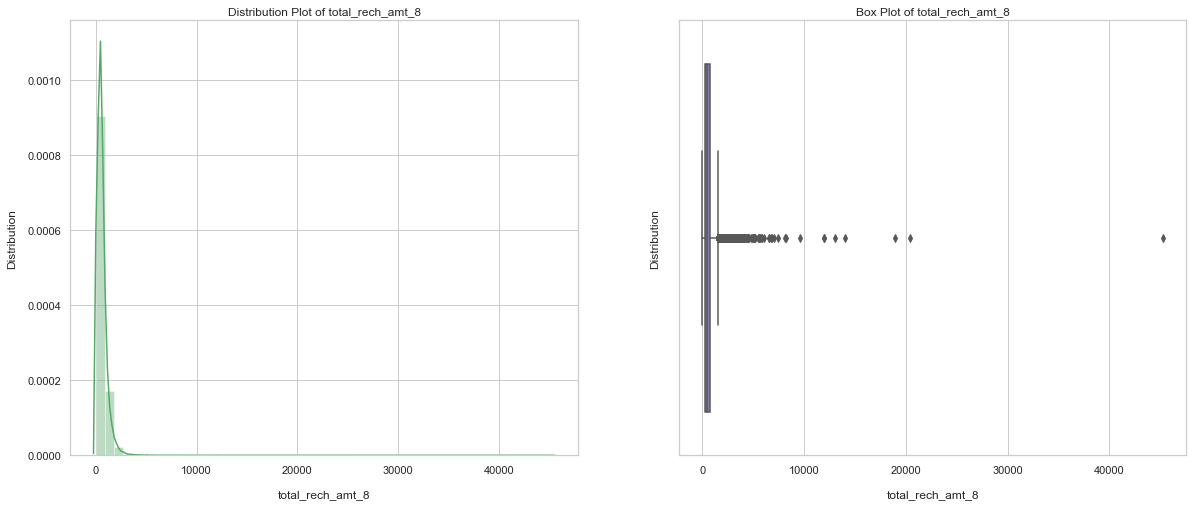

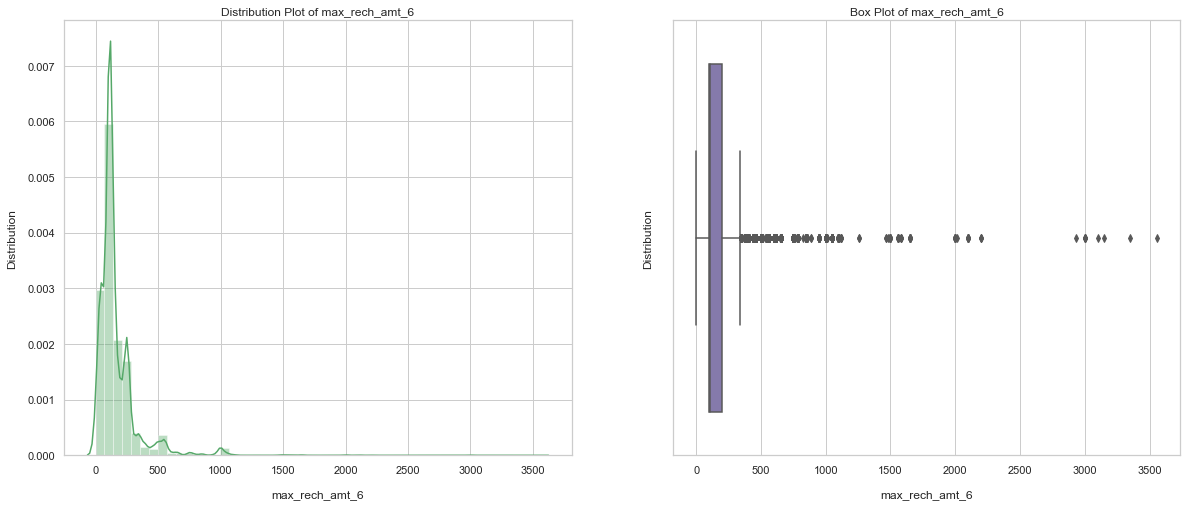

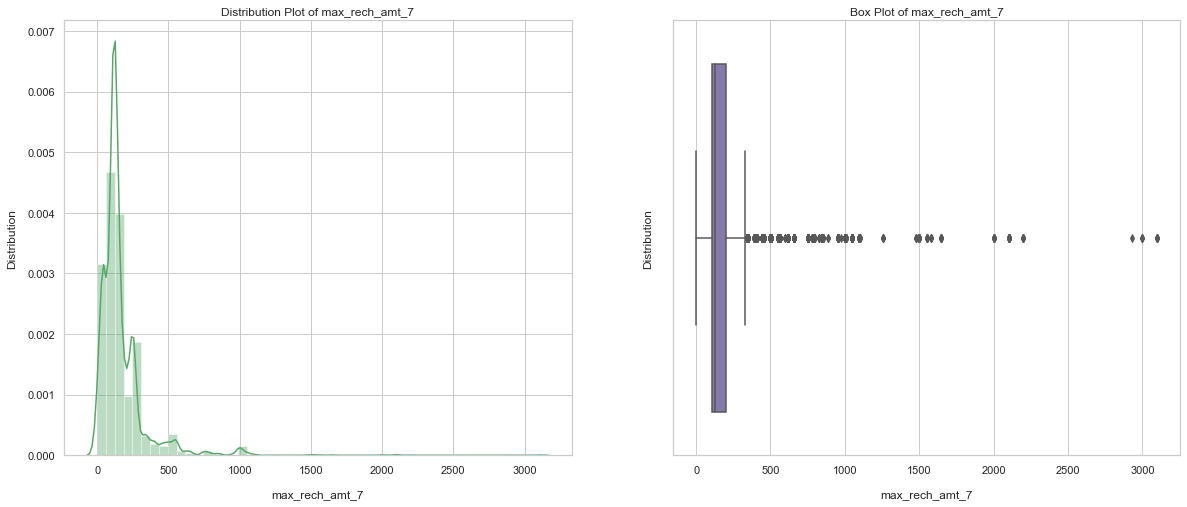

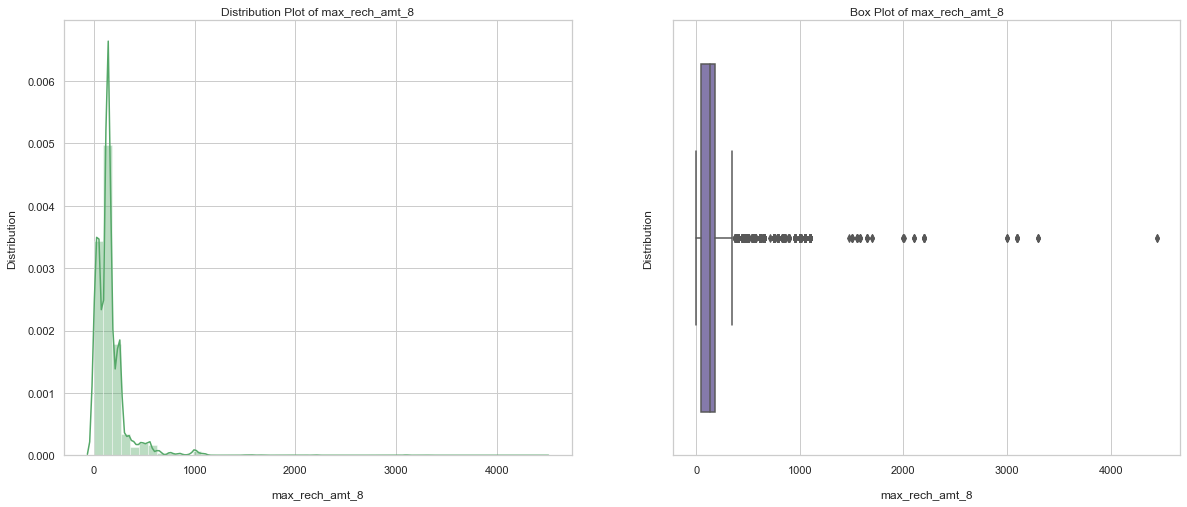

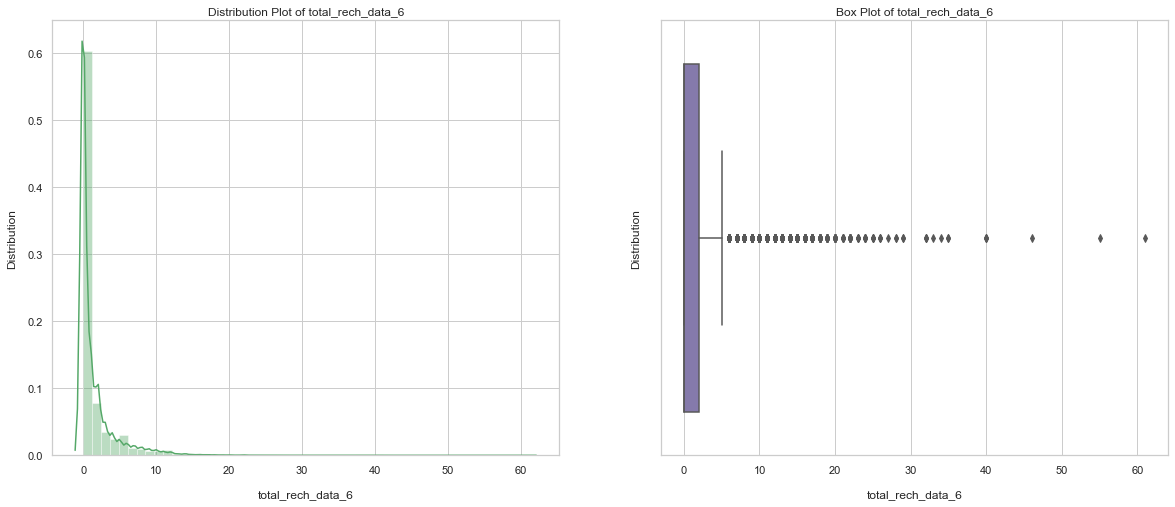

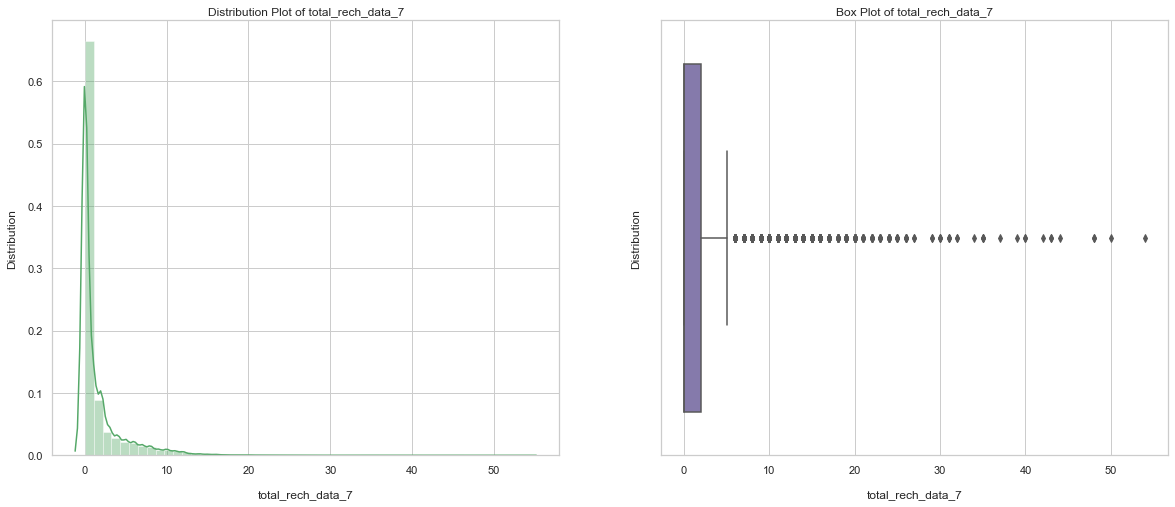

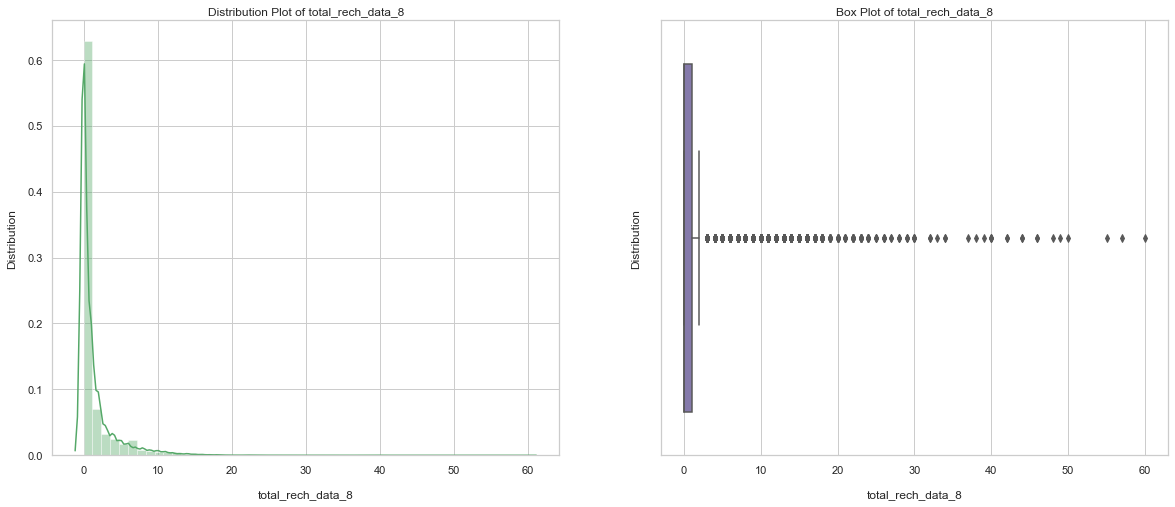

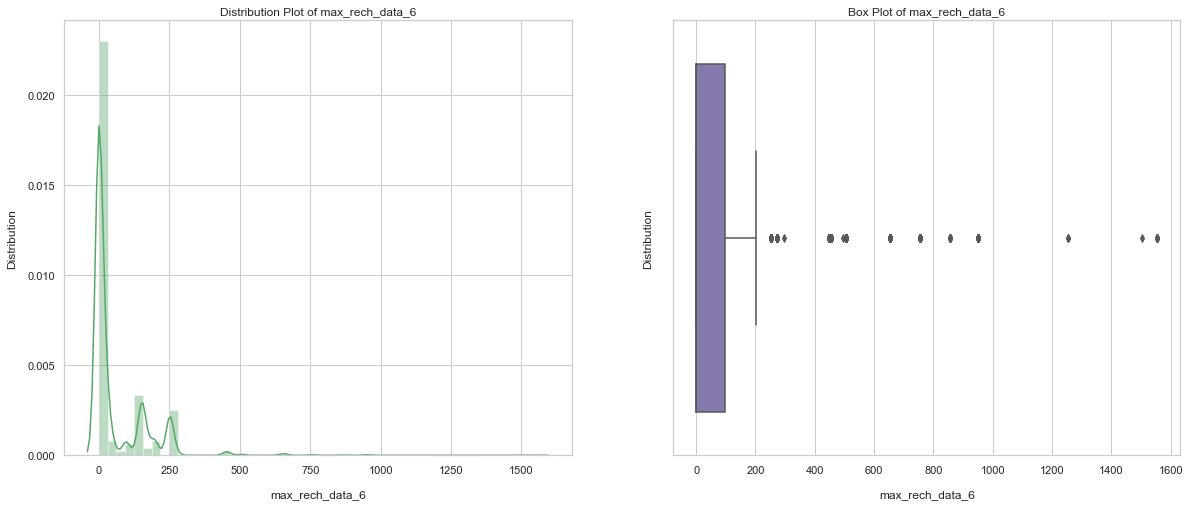

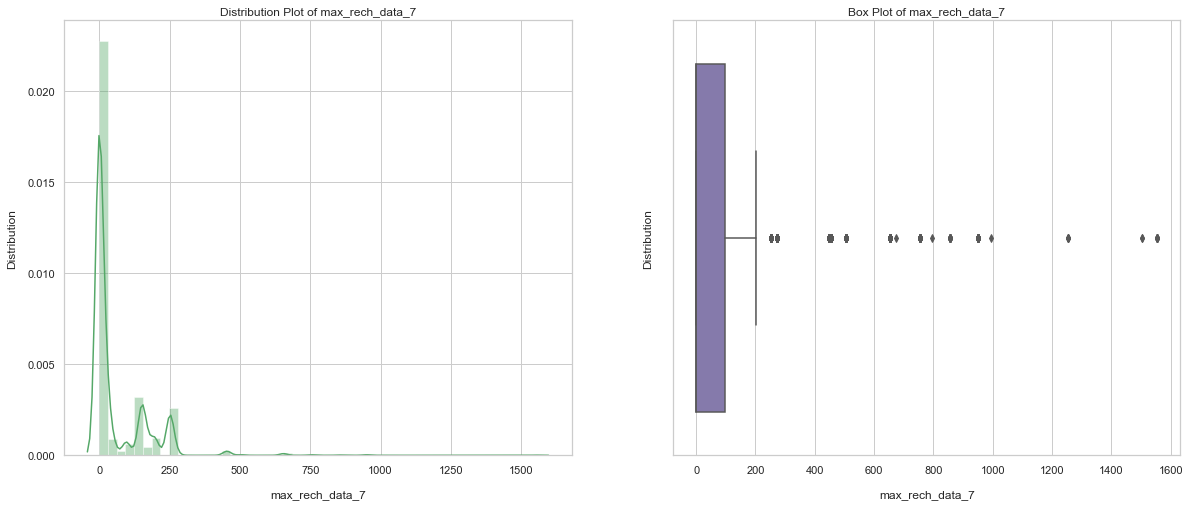

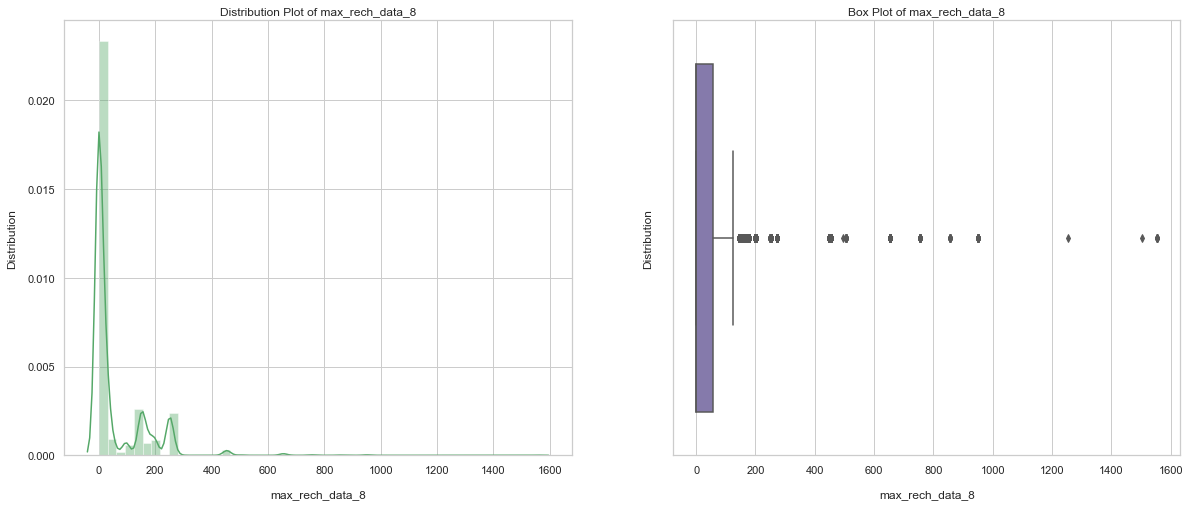

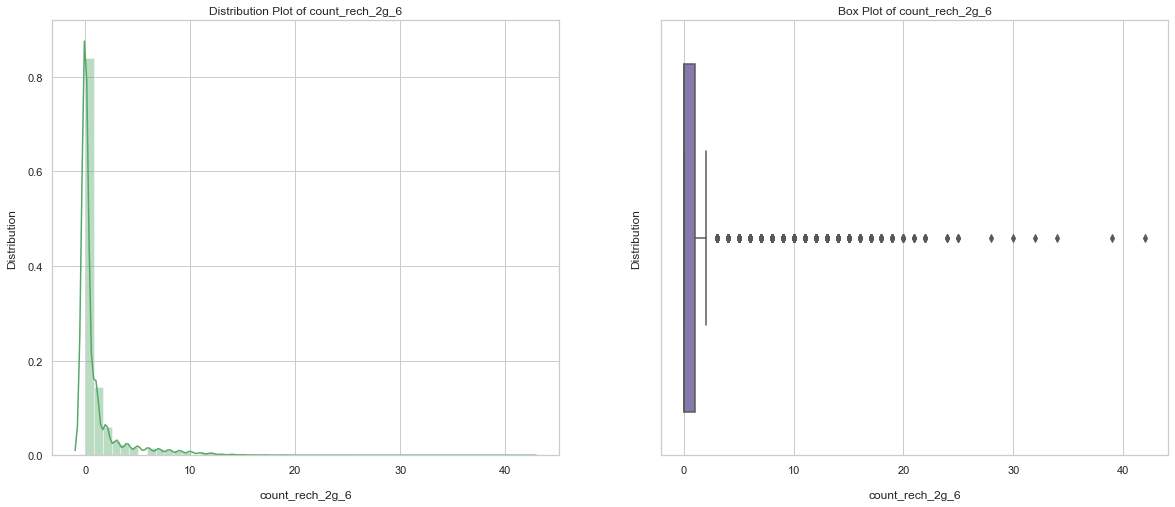

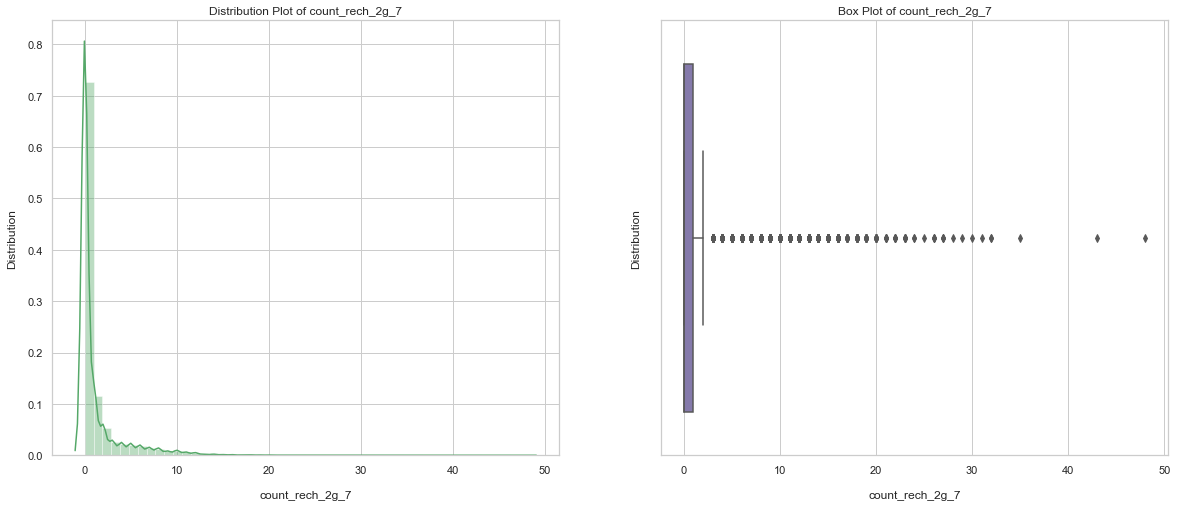

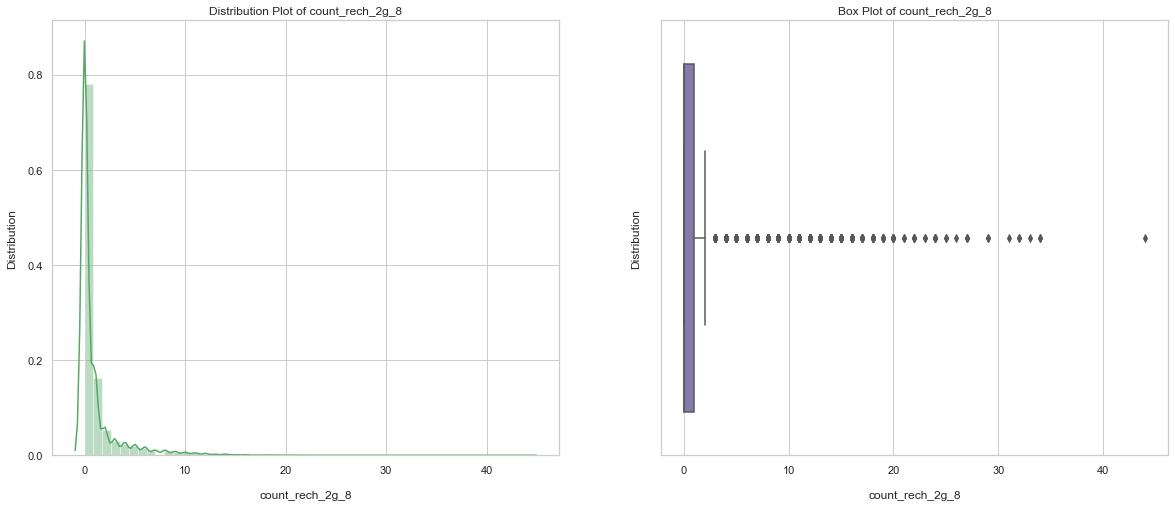

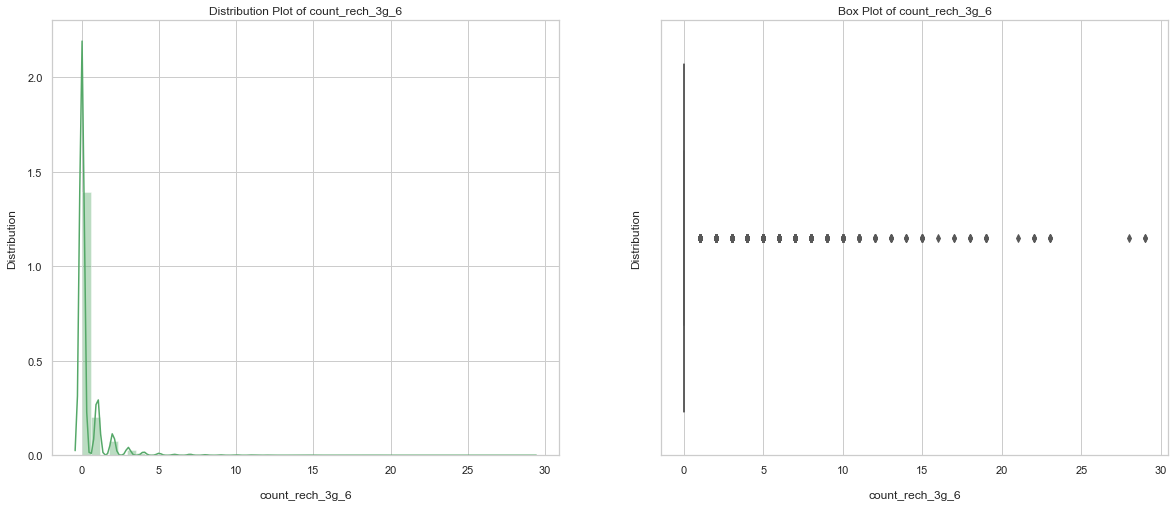

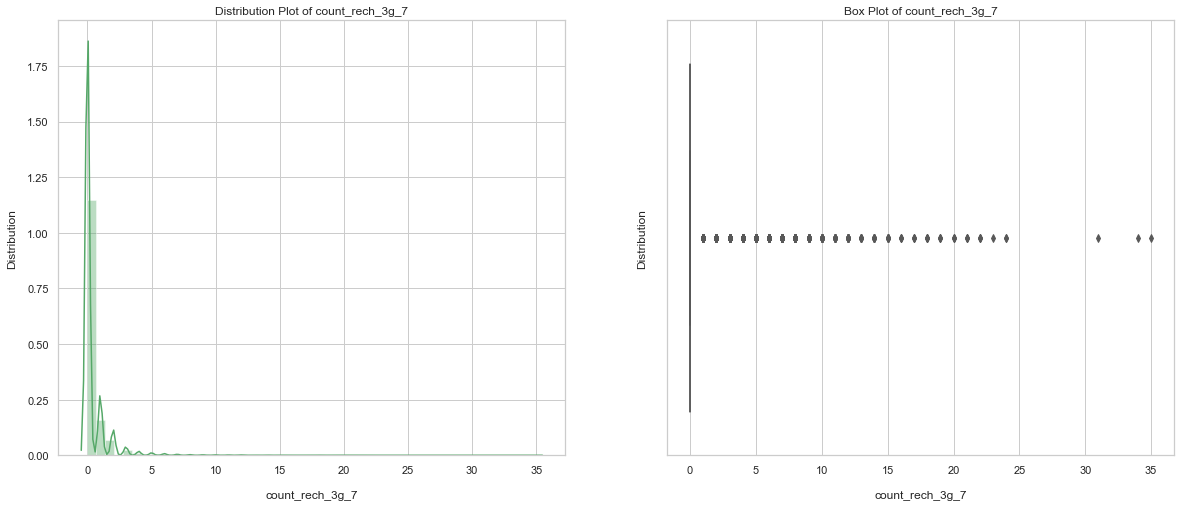

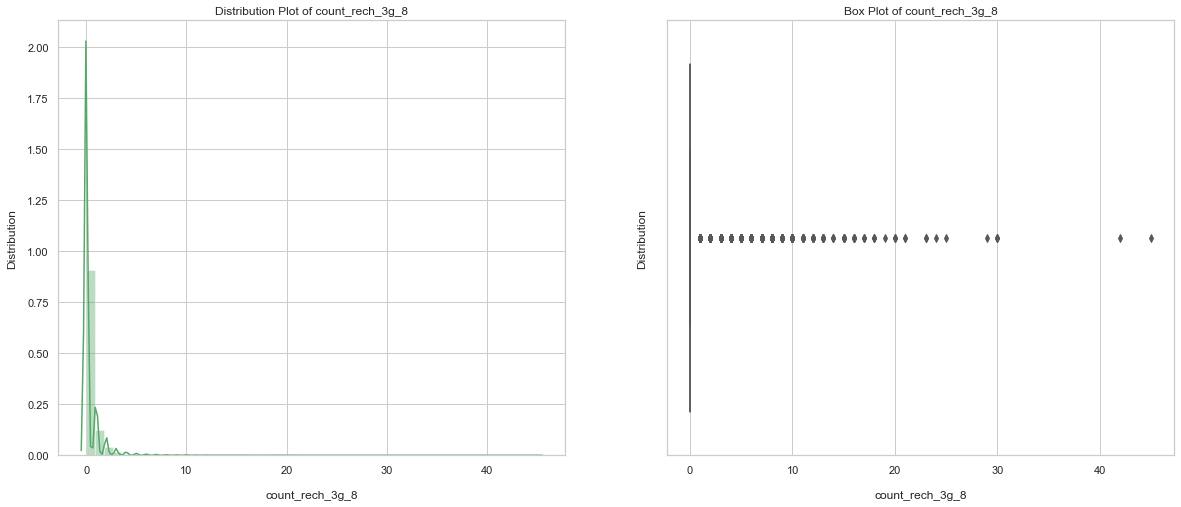

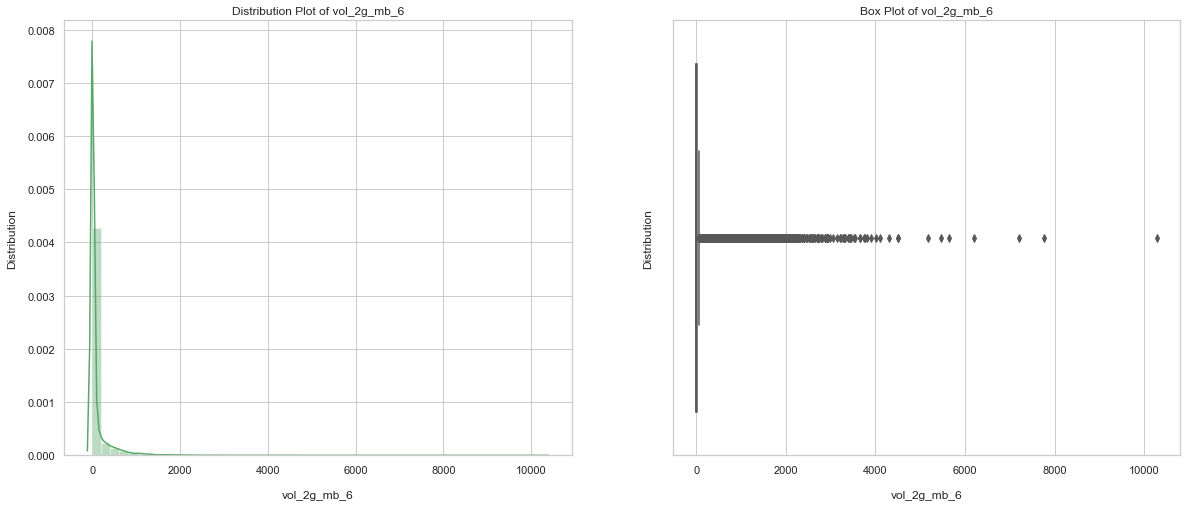

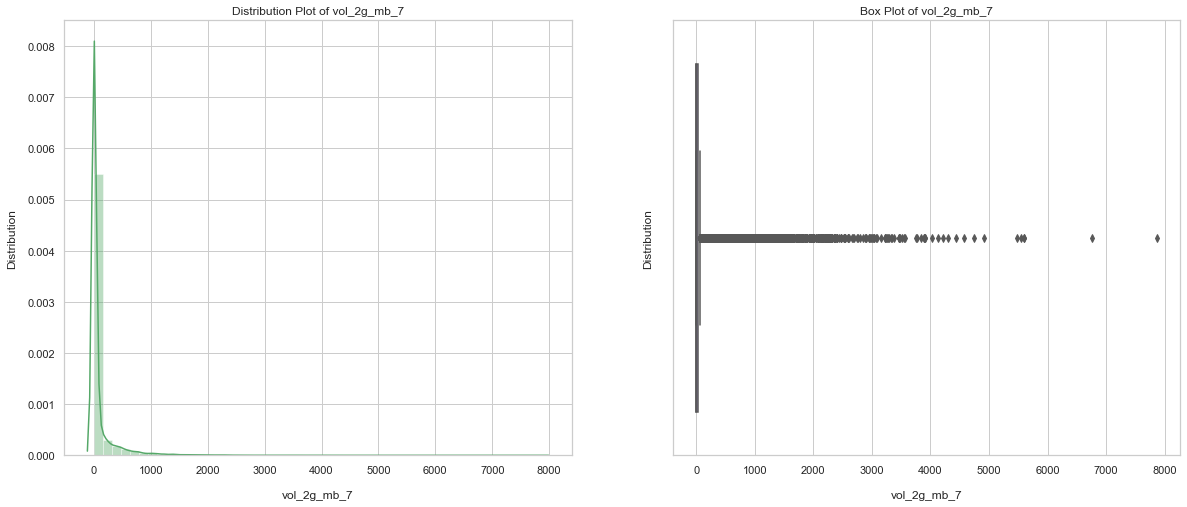

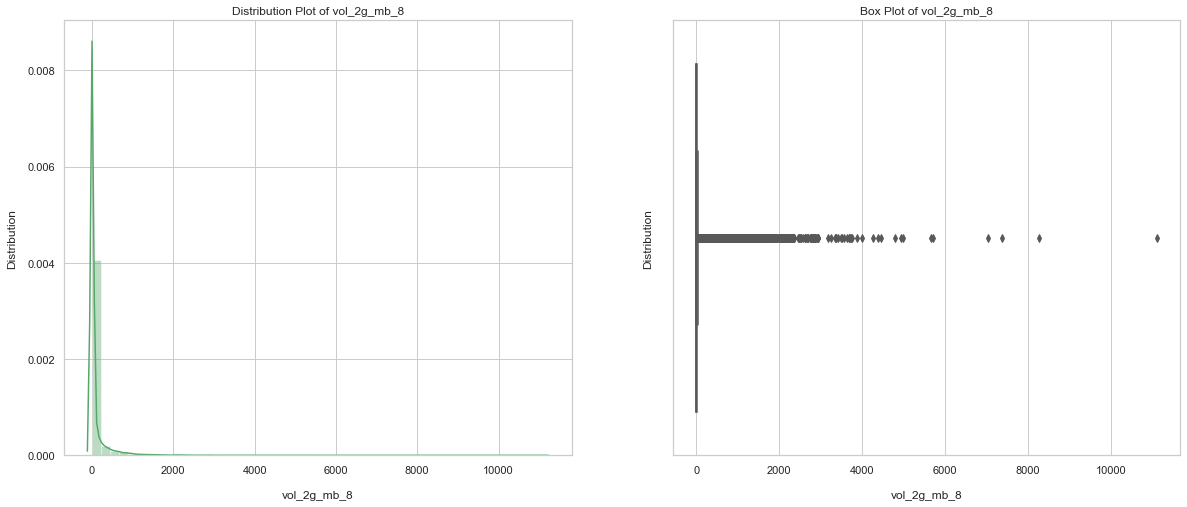

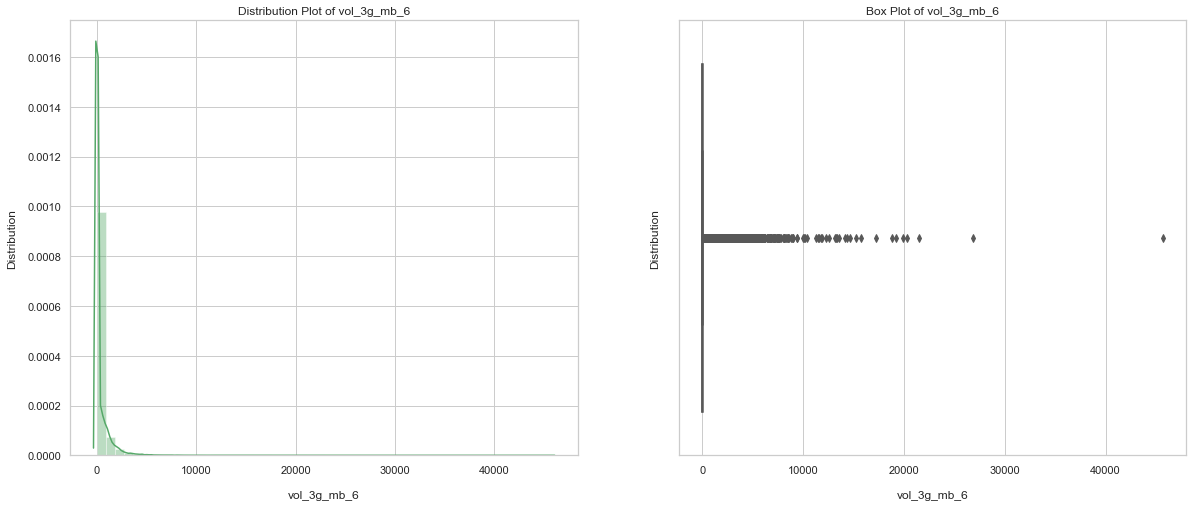

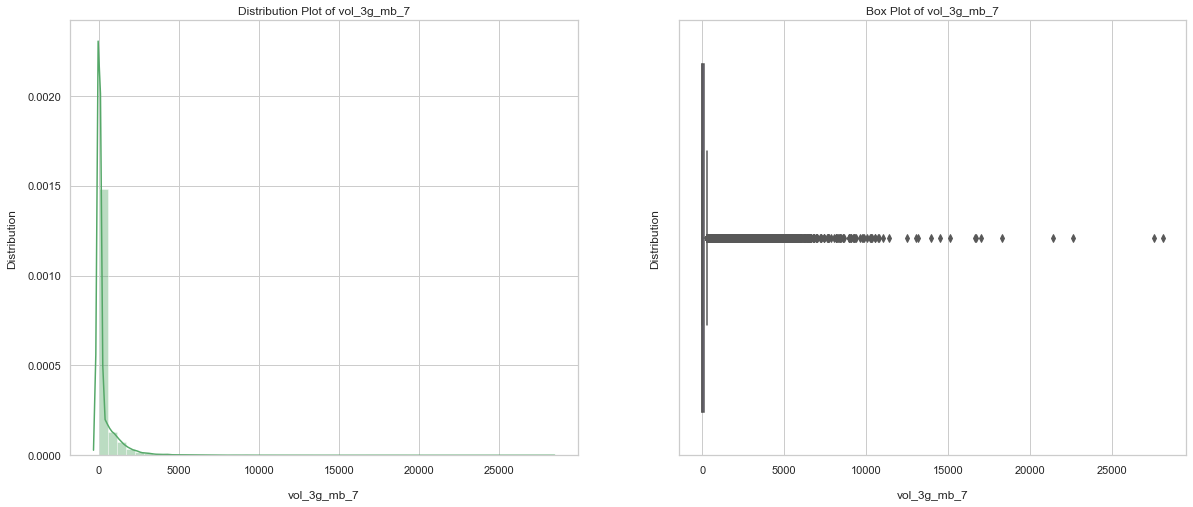

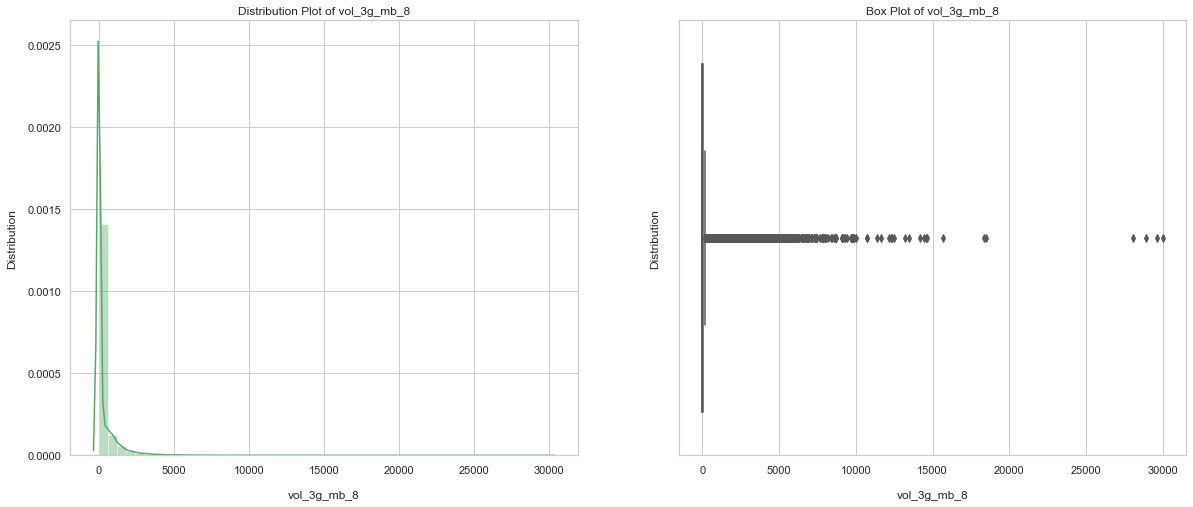

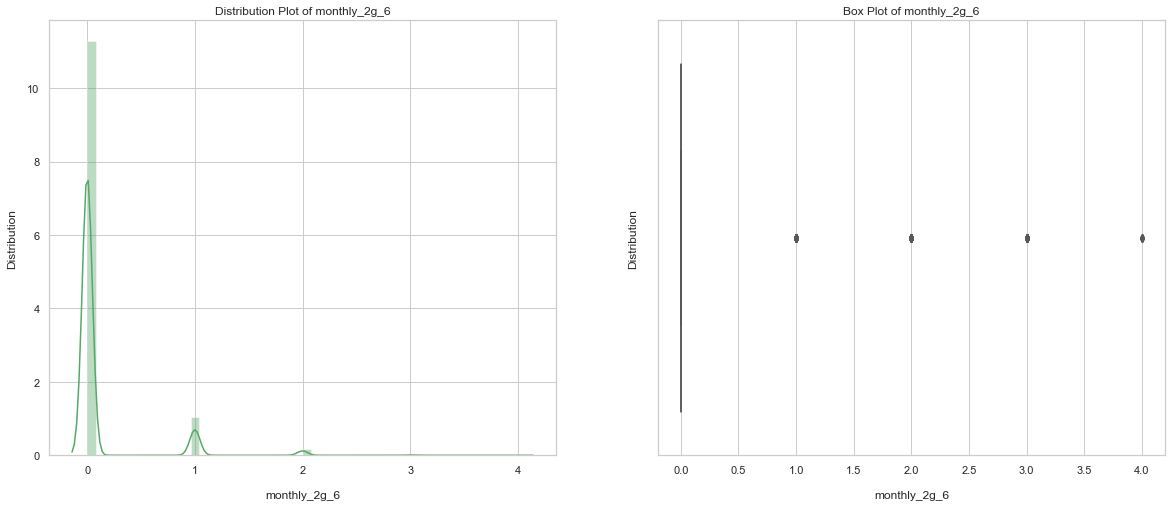

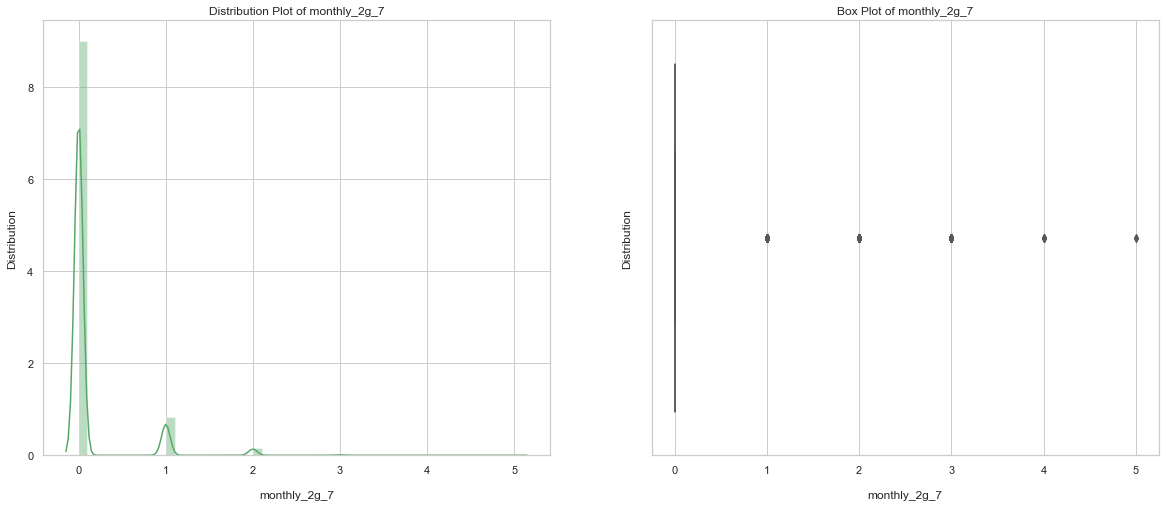

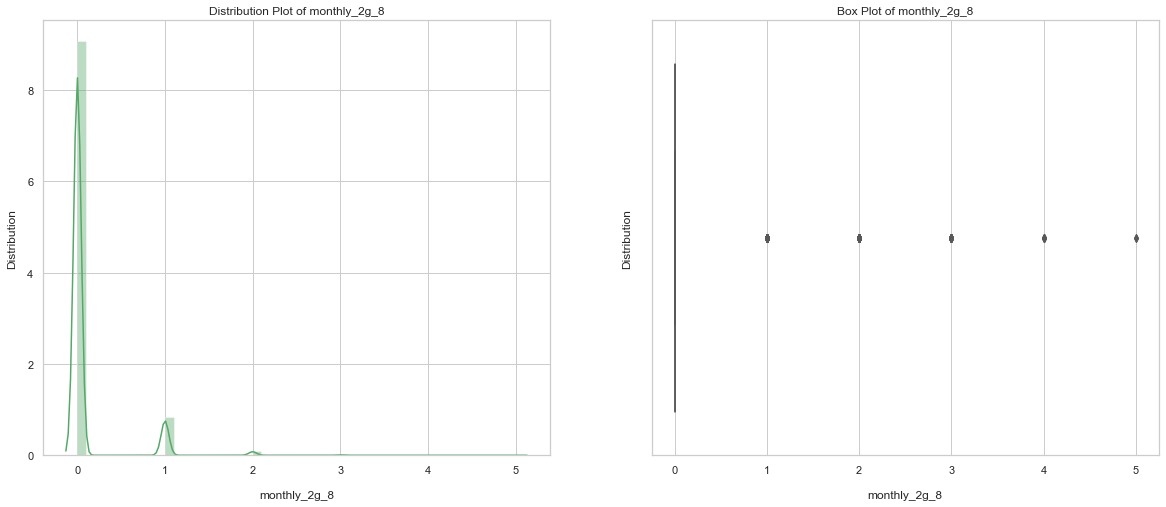

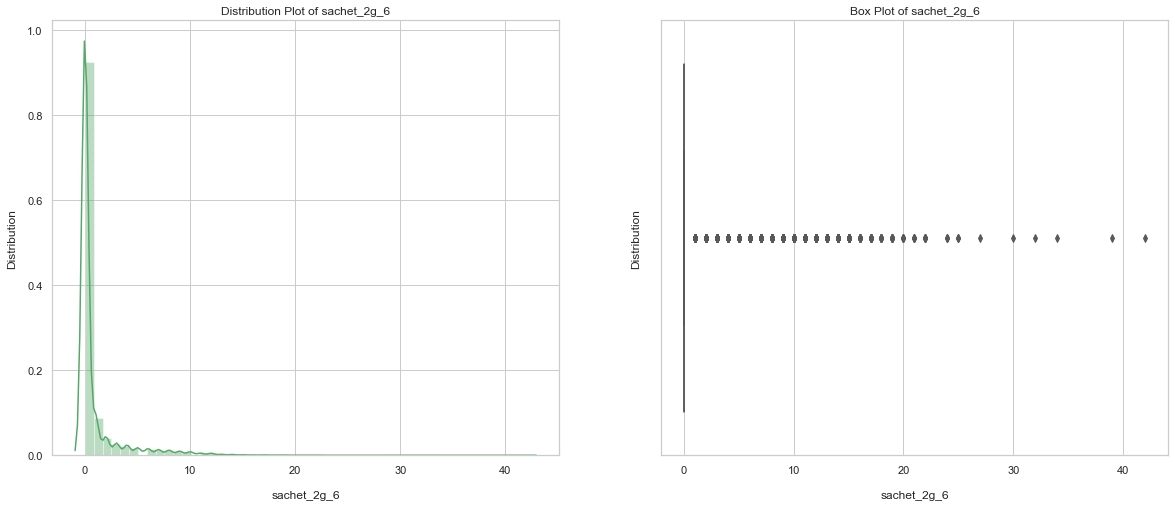

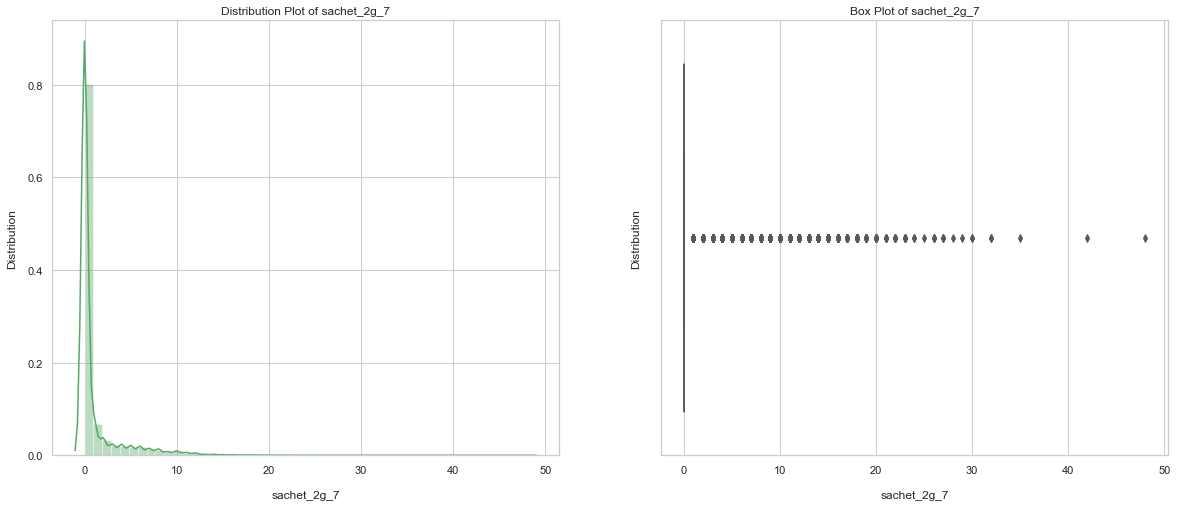

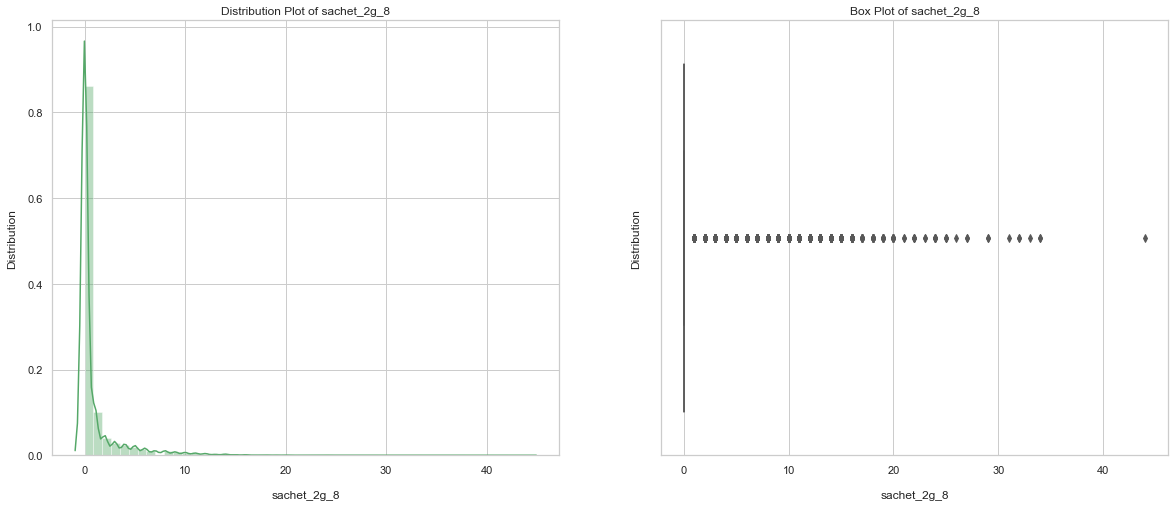

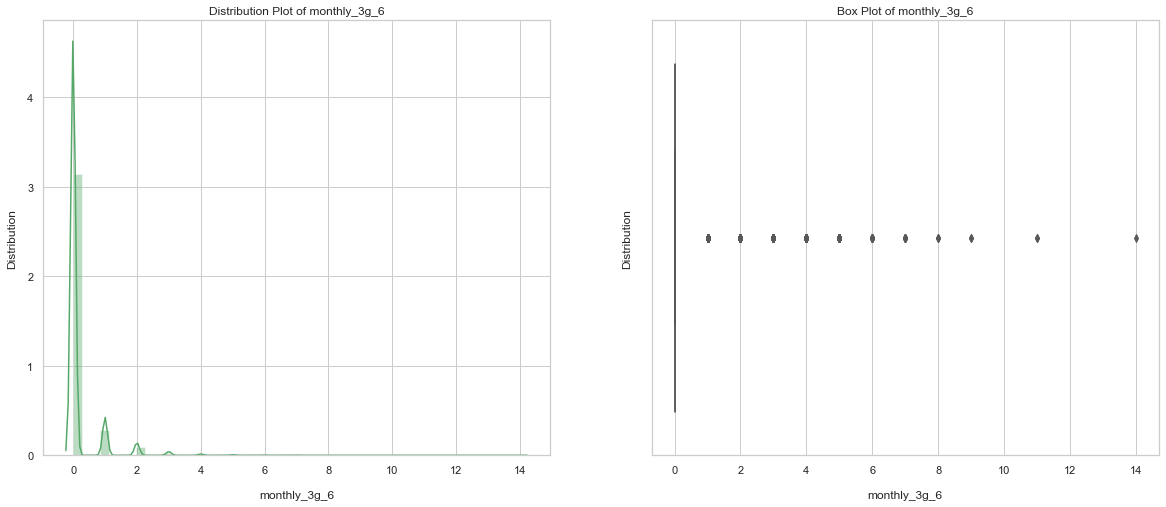

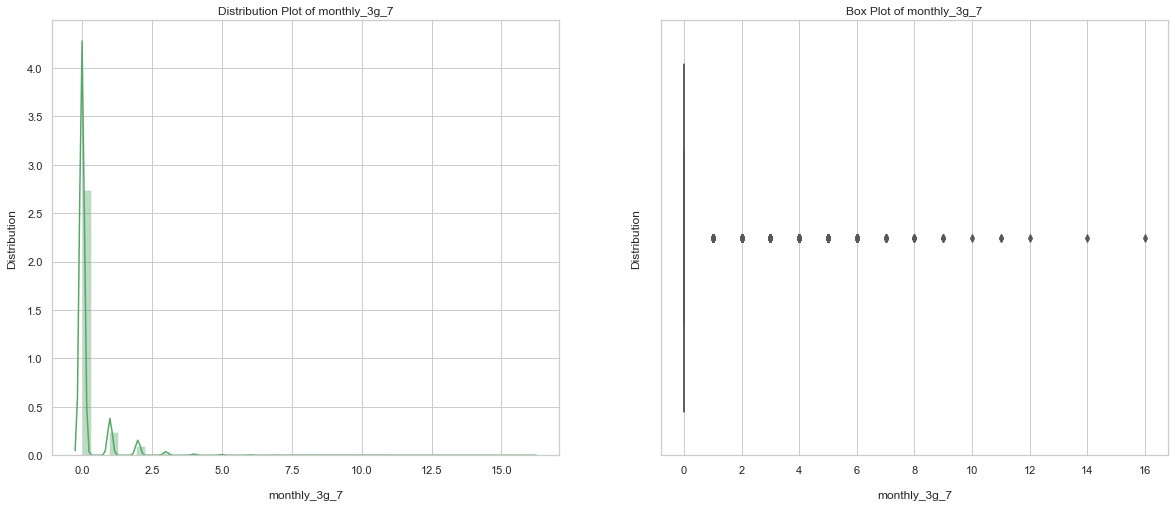

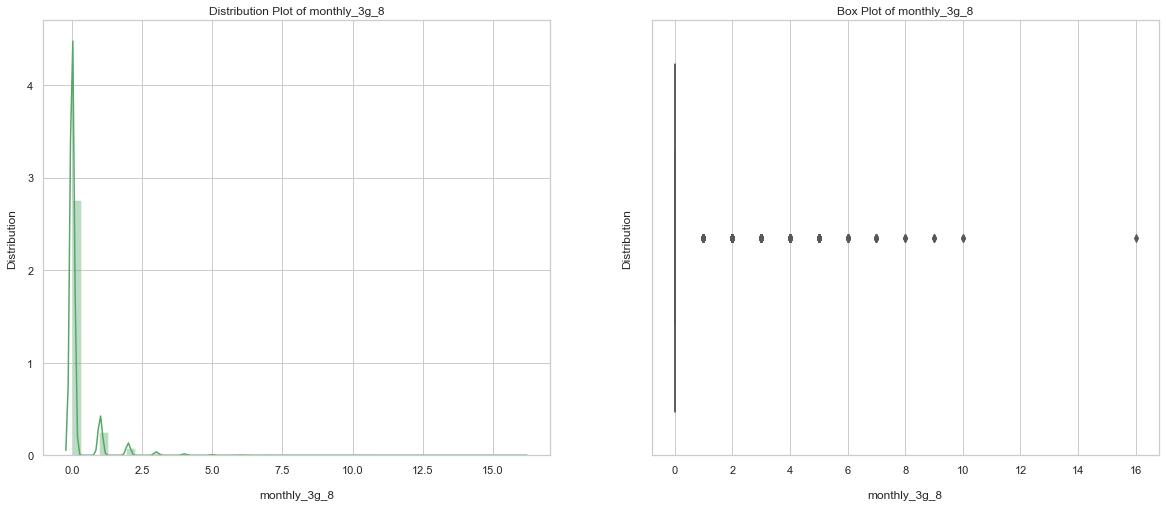

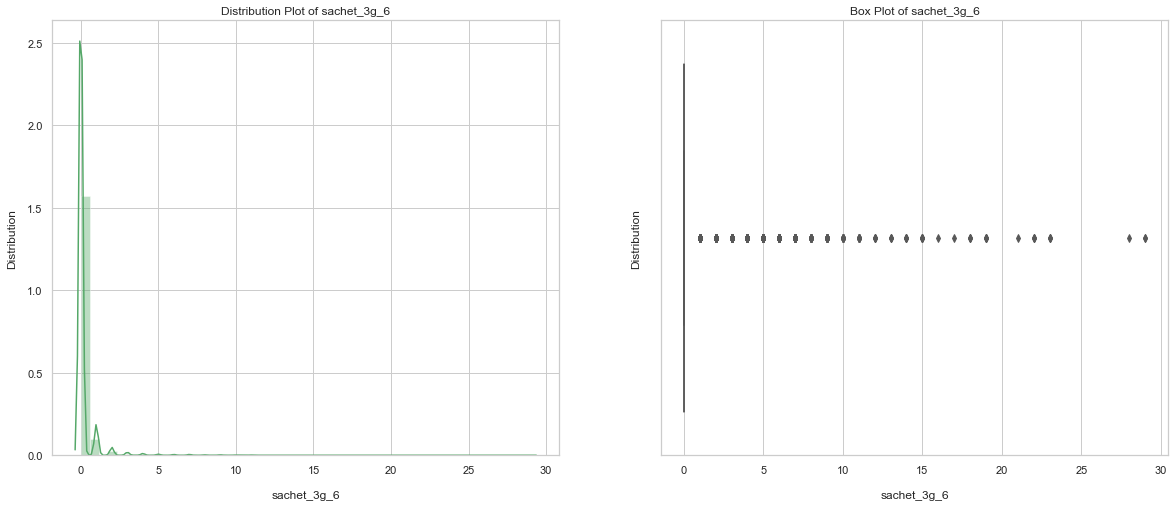

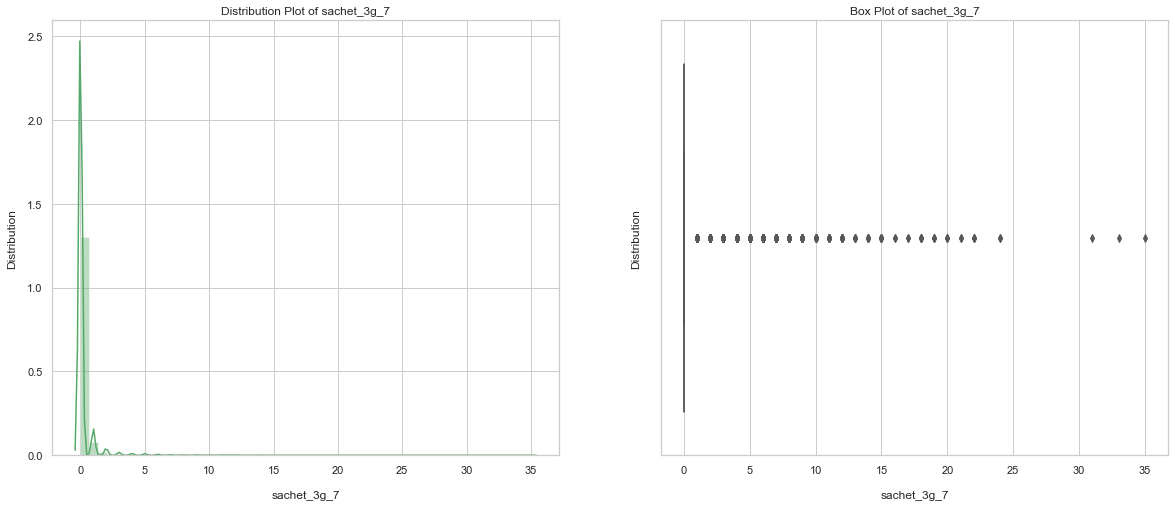

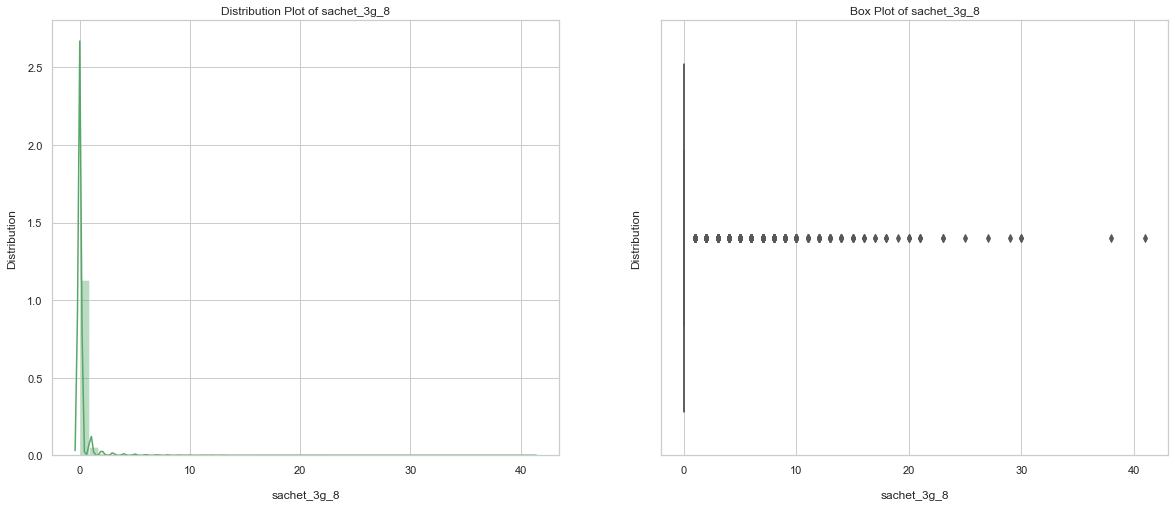

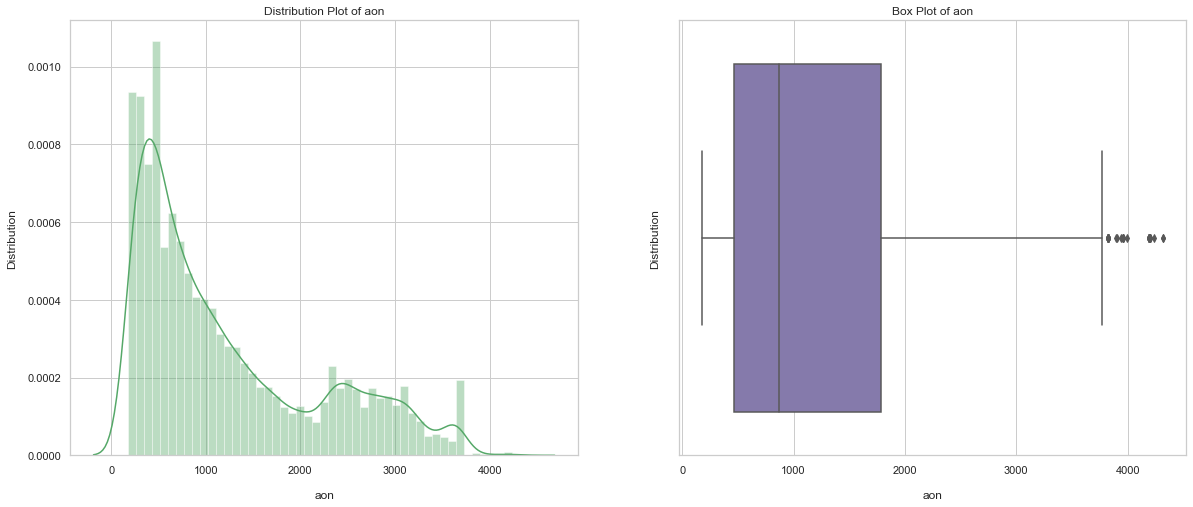

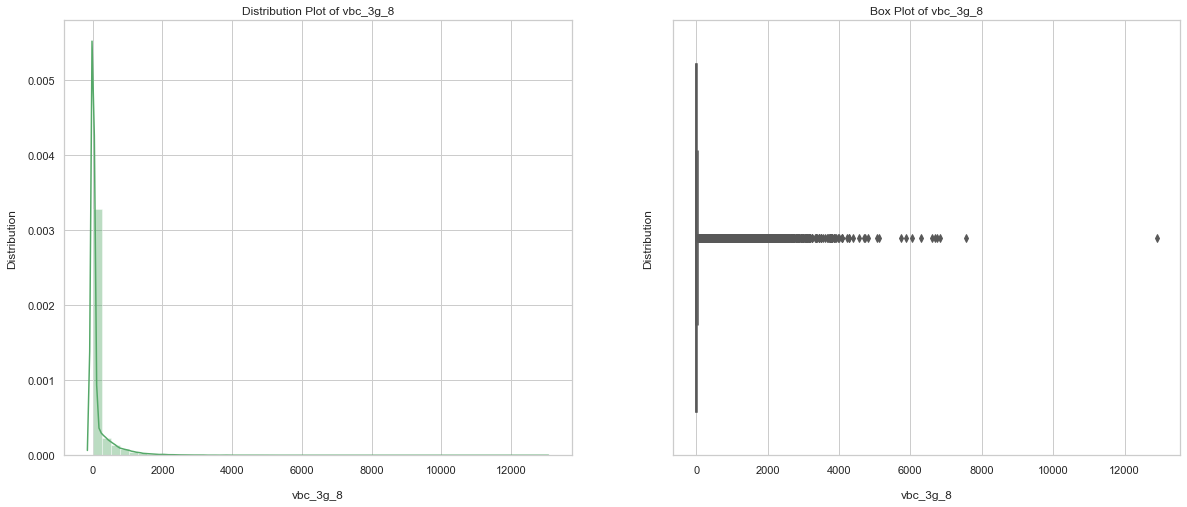

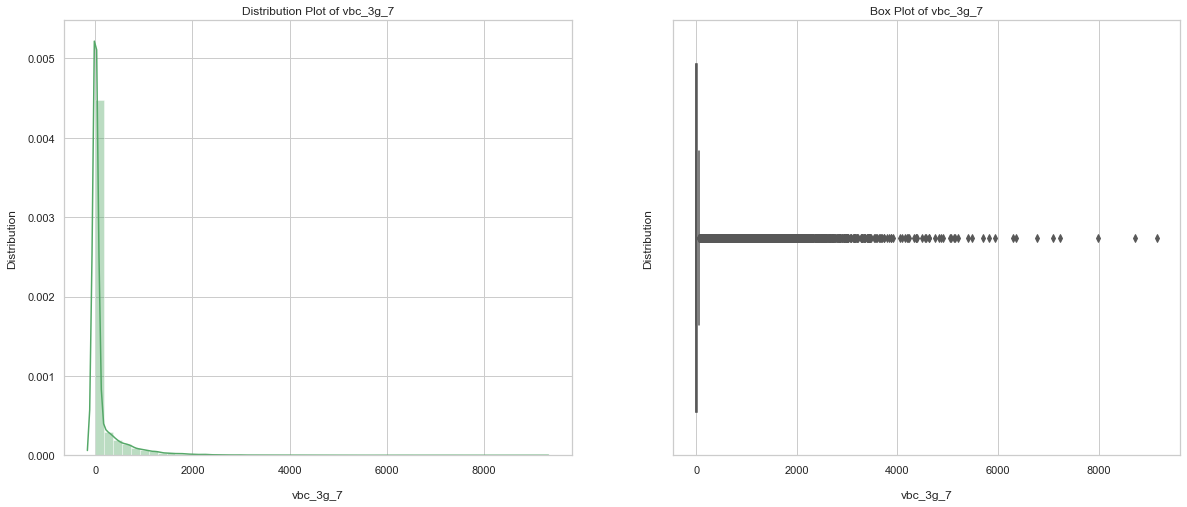

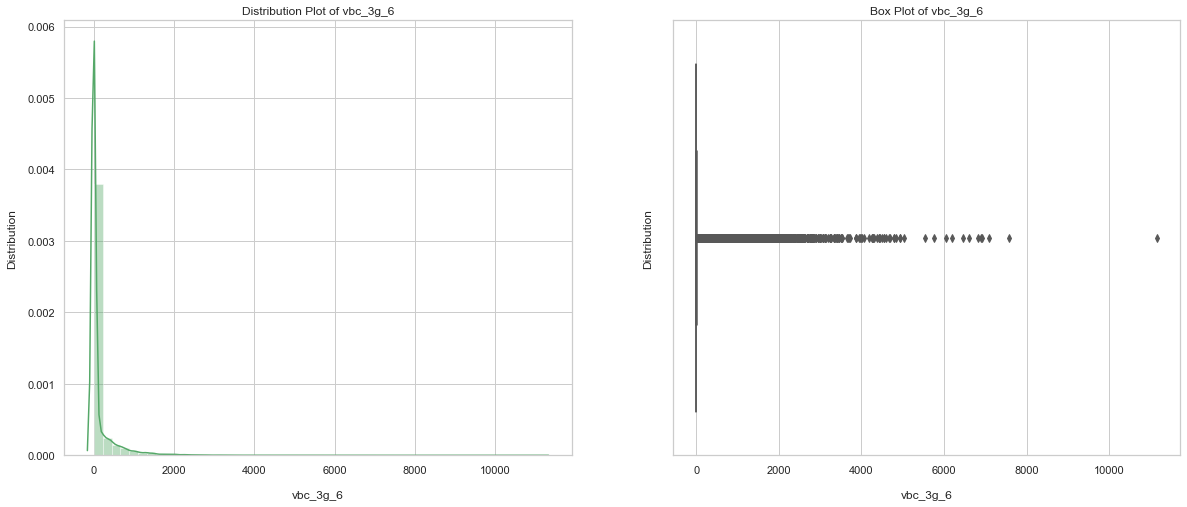

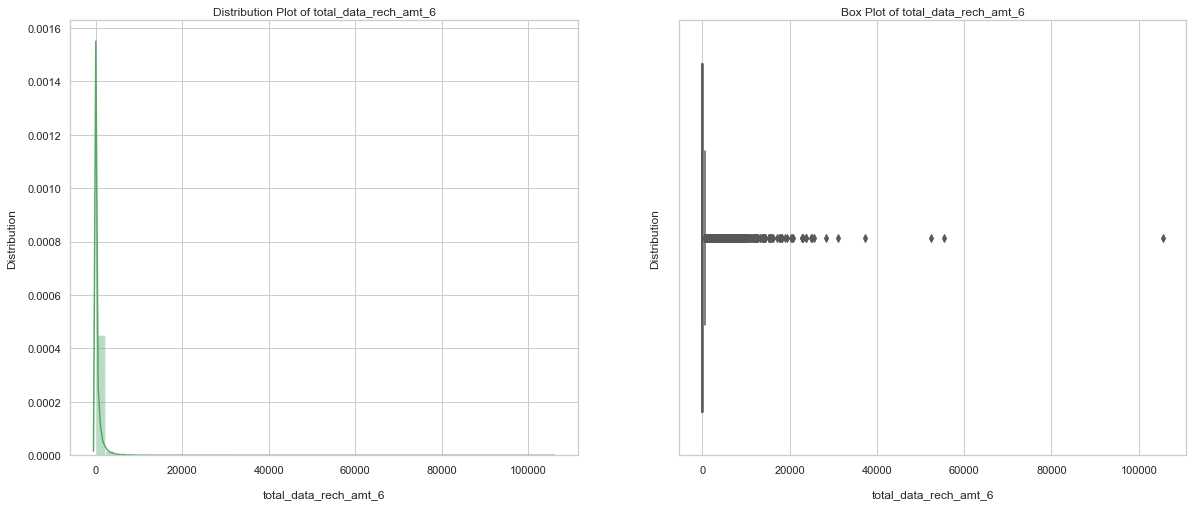

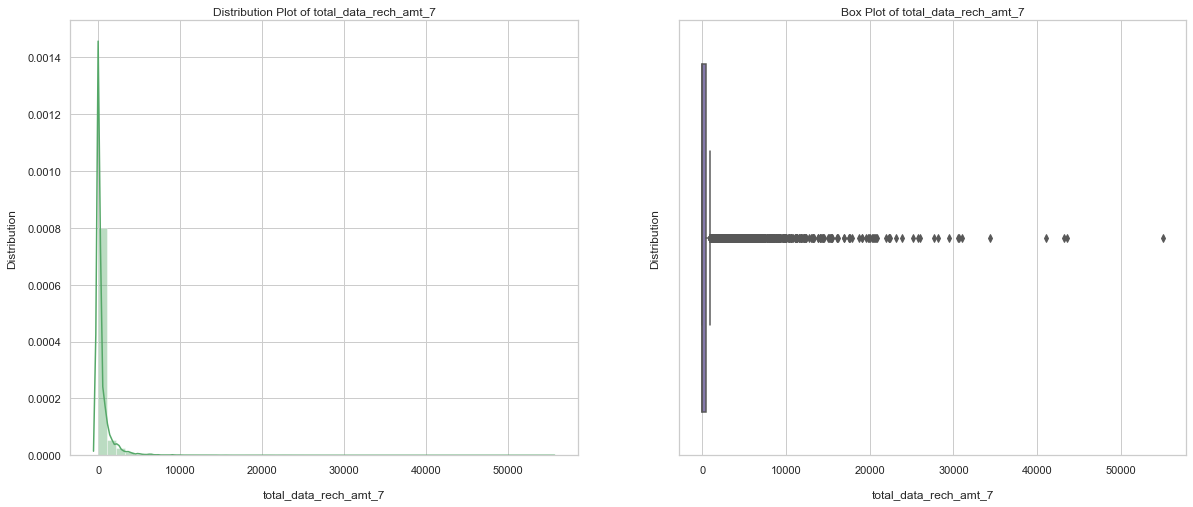

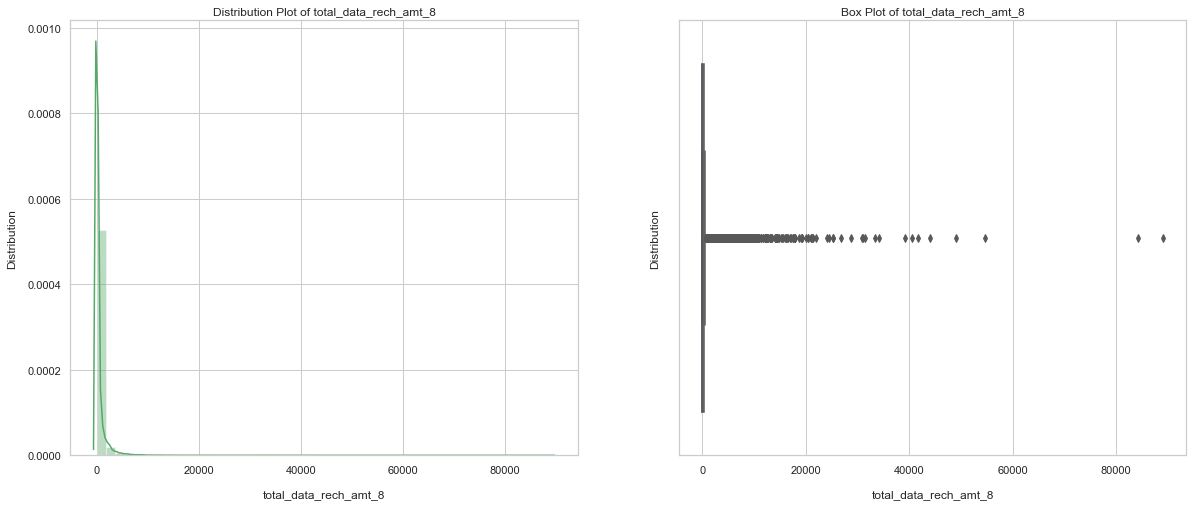

In [69]:
# Univariate Plot Analysis of Quantitative Variables

counter = 1

for col_list in telecom.columns:    
    if col_list != 'churn':        
        # Call Custom Function
        plot_univariate(figsize_x = 20,
                        figsize_y = 8,
                        subplot_x = 1,
                        subplot_y = 2,
                        xlabel = col_list,
                        ylabel = "Distribution",
                        x_axis = col_list,
                        data = telecom,
                        wspace = 0.2)
        counter += 1

**Many outliers seen in above analysis.**

**Handle Outliers in the numerical columns**

In [70]:
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
def skew_check(df,cols):
    skew_check=df[cols].apply(lambda x:skew(x)).sort_values(ascending=False)
    skew_check_high =skew_check[skew_check>0.2]
    skewness = pd.DataFrame({'Skew' :skew_check_high})
    return skewness

In [71]:
numerical_cols = telecom.select_dtypes(exclude='object').columns
check_outliers=[]
for col in numerical_cols:
    if col not in ['churn','mobile_number']:
        check_outliers.append(col)

In [72]:
#Check skew in numberical columns
skew_check(telecom,check_outliers)

Skew
og_others_8            105.998703
og_others_6            105.919181
og_others_7            105.789386
isd_og_mou_8            89.419682
isd_og_mou_6            87.061809
isd_og_mou_7            83.438194
spl_ic_mou_7            72.075661
ic_others_6             64.757074
ic_others_8             49.403814
ic_others_7             48.464204
spl_ic_mou_6            38.982772
isd_ic_mou_7            22.581639
total_data_rech_amt_6   22.494967
isd_ic_mou_8            20.917595
spl_og_mou_8            20.000783
total_data_rech_amt_8   19.551477
isd_ic_mou_6            19.527752
roam_ic_mou_8           18.745592
spl_og_mou_7            18.485157
arpu_7                  18.299199
total_rech_amt_8        18.297546
roam_ic_mou_7           17.336733
total_rech_amt_7        16.770843
spl_og_mou_6            16.755144
arpu_8                  15.702242
roam_og_mou_8           14.330722
total_rech_amt_6        13.730775
sachet_3g_8             13.624003
std_ic_mou_7            13.621867
std_ic_mou_8            12.948229
arpu_6                  12.561491
sachet_3g_6             12.092192
std_ic_mou_6            12.087214
sachet_3g_7             11.756049
roam_ic_mou_6           11.674165
vol_3g_mb_6             11.477223
total_data_rech_amt_7   10.853765
count_rech_3g_8         10.265647
vol_3g_mb_8              9.496316
spl_ic_mou_8             9.219211
vol_2g_mb_8              9.157361
roam_og_mou_7            9.144208
roam_og_mou_6            9.137425
count_rech_3g_7          8.189604
count_rech_3g_6          8.098401
vol_3g_mb_7              7.965288
vol_2g_mb_6              7.716654
vol_2g_mb_7              6.962379
vbc_3g_6                 6.276291
vbc_3g_8                 6.153557
max_rech_amt_8           6.109225
monthly_3g_7             5.754897
vbc_3g_7                 5.628754
monthly_3g_8             5.529279
loc_og_mou_8             5.295507
monthly_3g_6             5.238020
max_rech_amt_6           5.177273
max_rech_amt_7           5.119816
total_rech_data_8        5.043866
offnet_mou_8             4.949573
onnet_mou_8              4.929655
loc_ic_mou_6             4.474334
loc_og_mou_6             4.459690
loc_og_mou_7             4.426623
loc_ic_mou_7             4.383287
sachet_2g_8              4.244703
total_ic_mou_7           4.194874
onnet_mou_7              4.185369
count_rech_2g_8          4.123343
total_rech_data_6        4.109151
loc_ic_mou_8             4.093791
total_ic_mou_6           4.050272
sachet_2g_6              4.007769
std_og_mou_8             3.983595
onnet_mou_6              3.960882
total_rech_data_7        3.922188
count_rech_2g_6          3.861083
total_ic_mou_8           3.849814
monthly_2g_8             3.824545
sachet_2g_7              3.810646
count_rech_2g_7          3.687563
total_rech_num_6         3.678677
monthly_2g_6             3.641929
offnet_mou_7             3.639510
monthly_2g_7             3.626058
max_rech_data_7          3.504909
max_rech_data_6          3.468734
max_rech_data_8          3.407283
offnet_mou_6             3.385443
total_og_mou_8           3.258158
std_og_mou_7             3.126427
std_og_mou_6             2.977115
total_rech_num_8         2.841554
total_og_mou_7           2.673862
total_rech_num_7         2.653361
total_og_mou_6           2.558483
aon                      0.968447

In [73]:
#Apply log transform to remove skew
df_log_transform=telecom.copy()
df_log_transform[check_outliers]=np.log1p(df_log_transform[check_outliers])

In [74]:
#Check the skew after applying log transform
skew_check(df_log_transform,check_outliers)

Skew
og_others_7            29.259398
og_others_8            26.855392
spl_ic_mou_7           10.219415
isd_og_mou_8            6.890546
isd_og_mou_6            6.106959
isd_og_mou_7            6.064990
sachet_3g_8             4.919345
spl_ic_mou_8            4.557530
sachet_3g_7             4.408556
sachet_3g_6             4.383622
ic_others_6             3.885024
ic_others_8             3.843725
ic_others_7             3.622030
monthly_2g_8            3.081947
monthly_3g_8            3.038118
spl_ic_mou_6            3.027509
monthly_2g_6            3.011887
monthly_3g_6            2.989427
monthly_3g_7            2.972946
monthly_2g_7            2.966941
count_rech_3g_8         2.724612
count_rech_3g_7         2.503704
count_rech_3g_6         2.497848
isd_ic_mou_8            2.469756
roam_ic_mou_7           2.468379
isd_ic_mou_6            2.464588
roam_ic_mou_8           2.400432
og_others_6             2.383316
isd_ic_mou_7            2.310539
roam_og_mou_8           2.217816
roam_og_mou_7           2.206785
sachet_2g_6             2.099781
roam_ic_mou_6           2.083285
sachet_2g_8             2.011306
sachet_2g_7             1.967611
roam_og_mou_6           1.902216
count_rech_2g_6         1.788059
count_rech_2g_8         1.744762
count_rech_2g_7         1.681766
vbc_3g_6                1.350952
total_rech_data_8       1.316479
total_rech_data_6       1.280404
vbc_3g_8                1.267223
vbc_3g_7                1.250645
vol_3g_mb_6             1.235400
vol_2g_mb_8             1.234444
total_rech_data_7       1.211634
vol_3g_mb_8             1.203401
vol_2g_mb_7             1.154319
vol_3g_mb_7             1.150220
vol_2g_mb_6             1.147338
spl_og_mou_6            1.093371
spl_og_mou_8            0.961346
spl_og_mou_7            0.883313
max_rech_data_6         0.615611
total_data_rech_amt_6   0.615093
total_data_rech_amt_8   0.596898
max_rech_data_7         0.583031
total_data_rech_amt_7   0.567525
max_rech_data_8         0.563669

In [75]:
df_box_cox = telecom.copy()

In [76]:
for col in check_outliers:
    df_box_cox[col] = boxcox1p(df_box_cox[col], boxcox_normmax(df_box_cox[col] + 1))

In [77]:
skew_check(df_box_cox,check_outliers)

Skew
og_others_7            13.818159
og_others_8            13.302286
spl_ic_mou_7            3.791175
isd_og_mou_8            3.504853
sachet_3g_8             3.439296
isd_og_mou_7            3.150267
spl_ic_mou_8            3.126582
sachet_3g_7             3.112196
sachet_3g_6             3.107995
isd_og_mou_6            3.058937
monthly_2g_8            2.991161
monthly_2g_6            2.909223
monthly_2g_7            2.854939
monthly_3g_8            2.622440
monthly_3g_6            2.602562
monthly_3g_7            2.559349
roam_ic_mou_7           2.009811
roam_og_mou_7           1.989823
count_rech_3g_8         1.976667
roam_og_mou_8           1.942017
roam_ic_mou_8           1.939515
count_rech_3g_6         1.885417
count_rech_3g_7         1.867397
isd_ic_mou_8            1.845165
isd_ic_mou_6            1.805559
isd_ic_mou_7            1.728746
roam_ic_mou_6           1.723502
spl_ic_mou_6            1.715155
roam_og_mou_6           1.708929
og_others_6             1.685242
sachet_2g_6             1.667610
sachet_2g_7             1.620391
sachet_2g_8             1.561294
ic_others_7             1.523806
vbc_3g_6                1.489035
vol_3g_mb_6             1.484890
vol_3g_mb_8             1.454701
ic_others_8             1.450576
ic_others_6             1.437496
vbc_3g_8                1.425402
vol_3g_mb_7             1.415037
vbc_3g_7                1.411146
count_rech_2g_6         1.316533
count_rech_2g_7         1.282220
count_rech_2g_8         1.245393
vol_2g_mb_8             1.158293
vol_2g_mb_6             1.122987
vol_2g_mb_7             1.112917
total_data_rech_amt_6   0.976150
total_rech_data_6       0.974532
total_data_rech_amt_7   0.953097
total_rech_data_7       0.948042
total_rech_data_8       0.916486
total_data_rech_amt_8   0.916413
max_rech_data_6         0.882619
max_rech_data_7         0.859210
max_rech_data_8         0.822076
spl_og_mou_6            0.752093
spl_og_mou_8            0.710496
spl_og_mou_7            0.666901
total_rech_amt_7        0.334058
total_rech_amt_6        0.312735
arpu_7                  0.267523
std_og_mou_8            0.266993
std_ic_mou_8            0.266107
total_rech_amt_8        0.247331
arpu_6                  0.237885
max_rech_amt_6          0.230661
max_rech_amt_7          0.222739
std_ic_mou_6            0.211894
std_ic_mou_7            0.209604
std_og_mou_7            0.200226

**Boxcox power transformation looked better than log transform for given dataset**

In [78]:
telecom[check_outliers] = df_box_cox[check_outliers]

### <font color=brown>3.3 Bivariate Analysis </font>

In [79]:
# Custom Function for Bivariate Analysis

# Function Parameters   -

# y_axis                -      The series/variable to be plotted along the y-axis.

def plot_bivariate(y_axis):
    
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    
    print("\nData Visualization of churn vs " + y_axis)

    # Subplot - 1
    plt.subplot(1, 3, 1)

    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecom, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecom_data)
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, y_axis + "_6")

    # Subplot - 2
    plt.subplot(1, 3, 2)

    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecom, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecom_data)
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, y_axis + "_7")
    
    # Subplot - 3
    plt.subplot(1, 3, 3)

    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = telecom, showfliers = False)
   
    # Call Custom Function
    set_plotting_variable(title_3, xlabel, y_axis + "_8")
    
    plt.subplots_adjust(wspace = 0.4)
    plt.show()

In [80]:
telecom.head()

arpu_6     arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  33.498291  34.512135  73.774670     5.929403     5.755621     5.578362   
1  21.898621  23.157767  17.252178    10.651805    10.025430     4.859389   
2  24.430526  16.178669  34.491537    11.210375     7.167139    10.897512   
3  23.109844  18.925900  20.079149     5.662287     6.358687     6.154091   
4  28.050497   5.390513   7.245074    13.942761     2.855959     2.604687   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  sachet_3g_7  \
0     17.659299     18.703757     15.608224       1.943281  ...          0.0   
1      9.798245      9.055915     11.272007       0.000000  ...          0.0   
2     17.083056     10.567684     17.968537       2.091343  ...          0.0   
3     15.141227     13.533822     12.059249       0.000000  ...          0.0   
4      8.227048      0.000000      2.522414       0.000000  ...          0.0   

   sachet_3g_8       aon  vbc_3g_8   vbc_3g_7  vbc_3g_6  \
0          0.0  5.893217  5.457979   3.729567  3.579298   
1          0.0  5.160049  3.852728  11.248493  6.493905   
2          0.0  6.782271  0.000000   0.000000  0.000000   
3          0.0  5.542730  0.000000   1.349223  3.792159   
4          0.0  5.750602  0.000000   0.000000  0.000000   

   total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn  
0                    0.0               0.000000               0.000000      1  
1                    0.0              11.629896               8.205018      0  
2                    0.0               0.000000               8.205018      0  
3                    0.0               0.000000               0.000000      0  
4                    0.0               0.000000               0.000000      0  

[5 rows x 98 columns]


Data Visualization of churn vs arpu


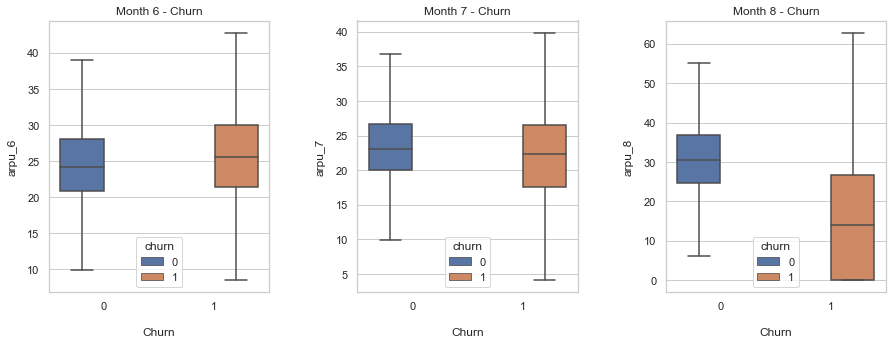


Data Visualization of churn vs onnet_mou


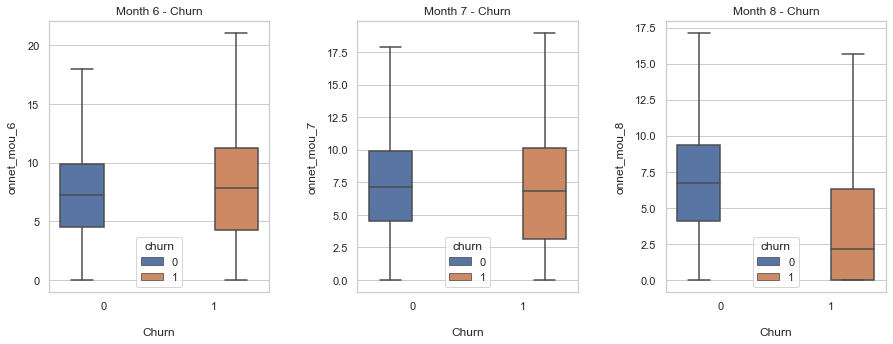


Data Visualization of churn vs offnet_mou


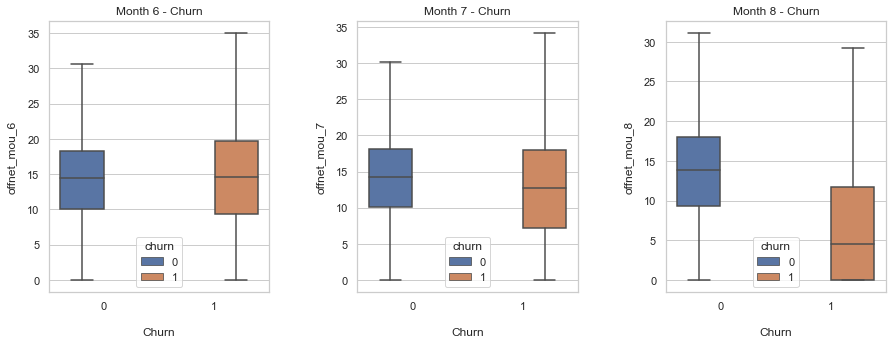


Data Visualization of churn vs total_og_mou


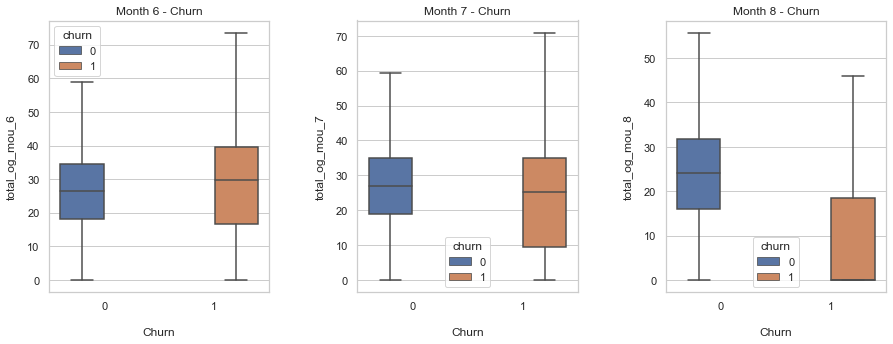


Data Visualization of churn vs total_ic_mou


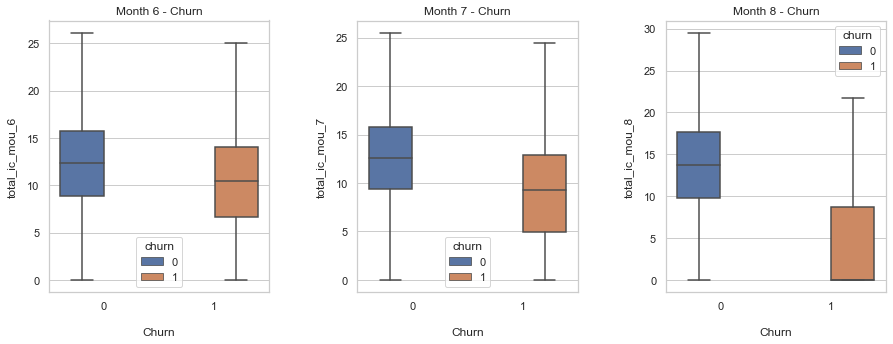


Data Visualization of churn vs total_rech_num


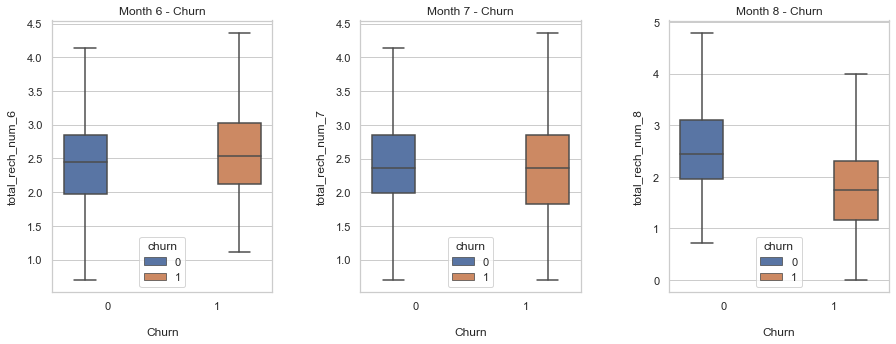


Data Visualization of churn vs total_rech_amt


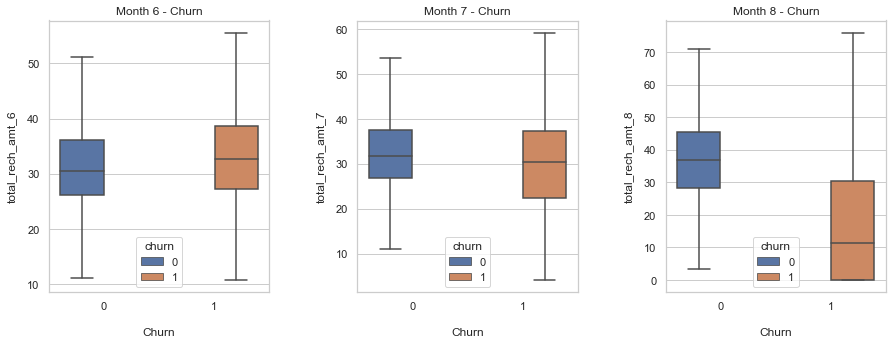


Data Visualization of churn vs total_rech_data


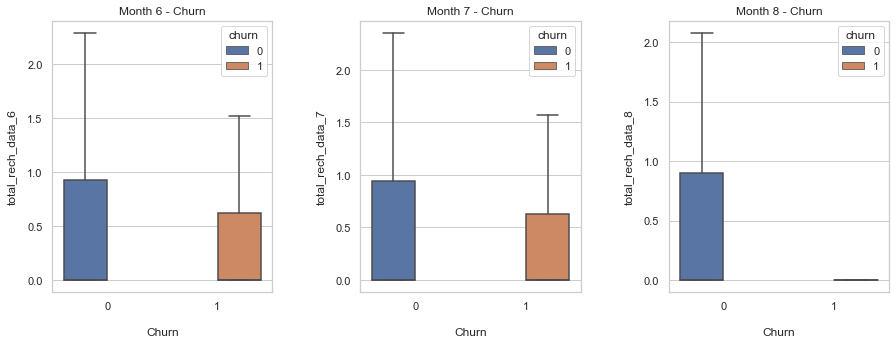


Data Visualization of churn vs vol_2g_mb


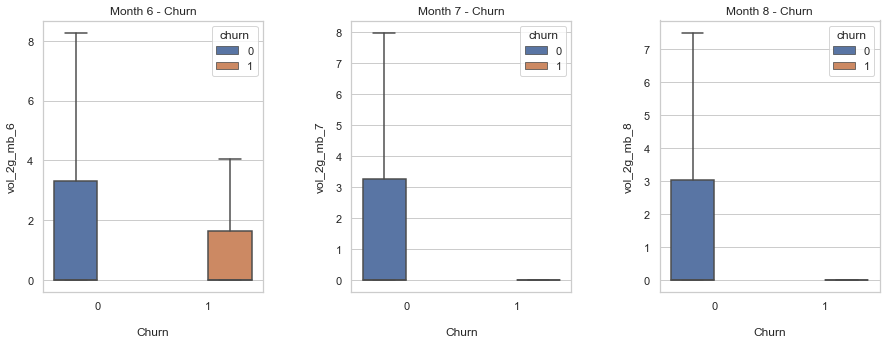


Data Visualization of churn vs vol_3g_mb


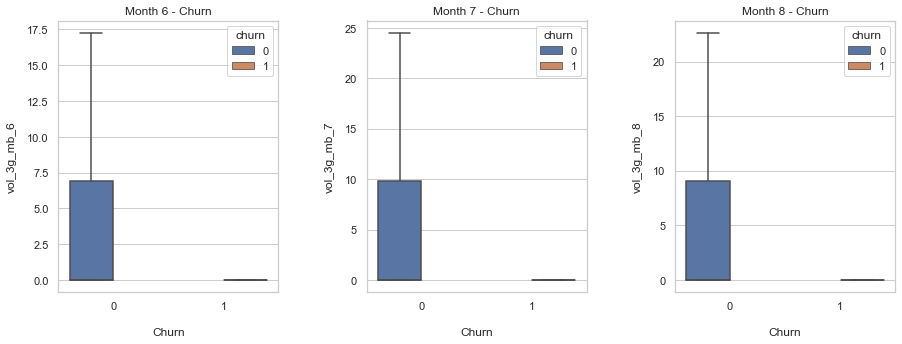


Data Visualization of churn vs vbc_3g


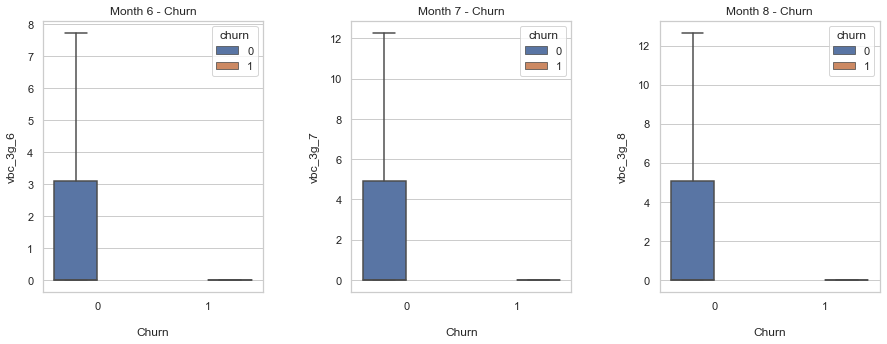


Data Visualization of churn vs total_data_rech_amt


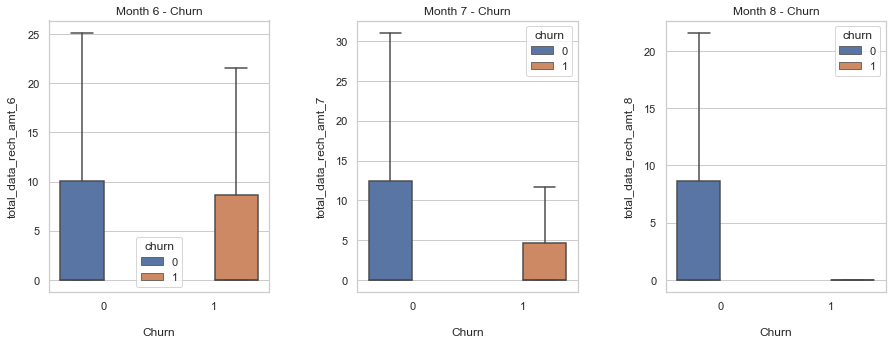

In [81]:
# Bivariate Analysis

plot_bivariate("arpu")

plot_bivariate("onnet_mou")

plot_bivariate("offnet_mou")

plot_bivariate("total_og_mou")

plot_bivariate("total_ic_mou")

plot_bivariate("total_rech_num")

plot_bivariate("total_rech_amt")

plot_bivariate("total_rech_data")

plot_bivariate("vol_2g_mb")

plot_bivariate("vol_3g_mb")

plot_bivariate("vbc_3g")

plot_bivariate("total_data_rech_amt")

**There is a significant drop in the columns for data in 8th month for churned customers.**

#### Bivariata Analysis - Quantitative variables

In [82]:
print(telecom.corr())

                         arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                 1.000000  0.441032  0.365798     0.488765     0.273386   
arpu_7                 0.441032  1.000000  0.644944     0.279639     0.478844   
arpu_8                 0.365798  0.644944  1.000000     0.202219     0.335950   
onnet_mou_6            0.488765  0.279639  0.202219     1.000000     0.808277   
onnet_mou_7            0.273386  0.478844  0.335950     0.808277     1.000000   
onnet_mou_8            0.226915  0.412719  0.583036     0.673507     0.814751   
offnet_mou_6           0.620878  0.353473  0.267007     0.343588     0.224859   
offnet_mou_7           0.337668  0.604597  0.434113     0.223718     0.343418   
offnet_mou_8           0.275257  0.491009  0.704104     0.184304     0.287019   
roam_ic_mou_6          0.104548  0.105110  0.111470     0.086224     0.109795   
roam_ic_mou_7          0.107101  0.107591  0.029753     0.110463     0.092092   
roam_ic_mou_8          0.117

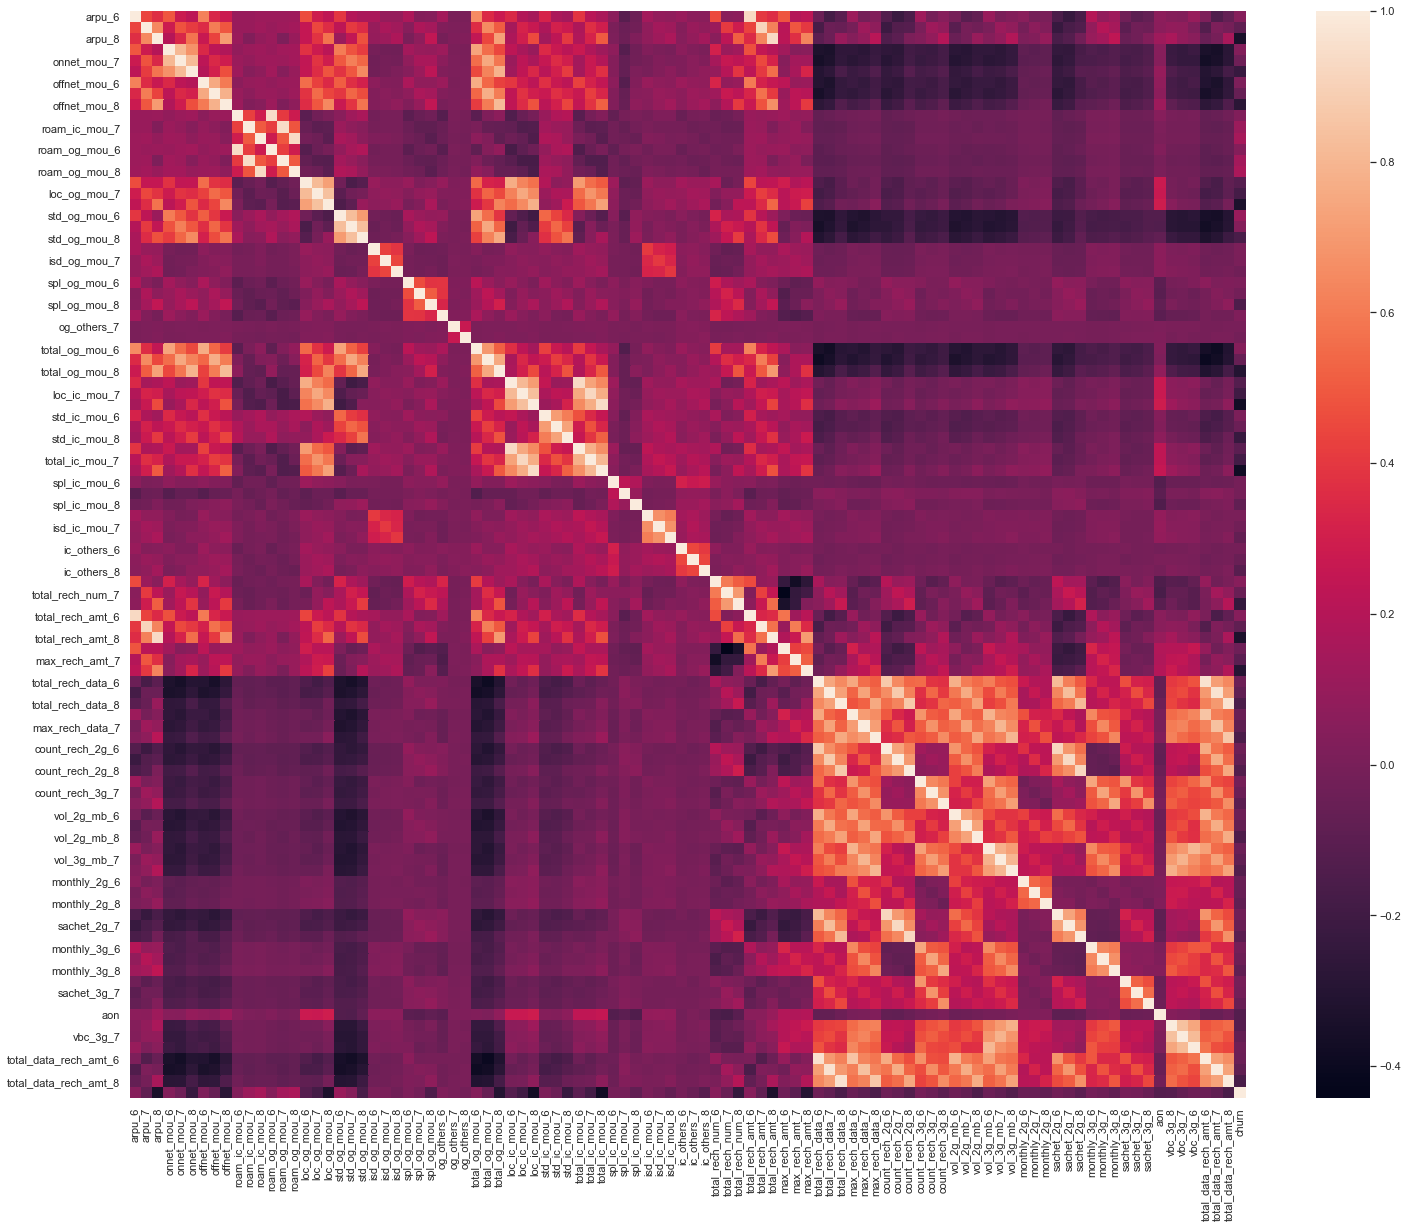

In [83]:
plt.figure(figsize = (25, 20))

sns.heatmap(telecom.corr())

plt.show()

**Many highly correlated variables are seen and to be extracted**

In [84]:
corr_matrix = telecom.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['onnet_mou_7', 'onnet_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'vol_3g_mb_7', 'vol_3g_mb_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'vbc_3g_7', 'vbc_3g_6', 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8']


Total features with high correlation -  31



- Total of 25 features with a correlation > 0.80

- We will keep these highly correlated features for now. As we will be performing Principal Component Analysis in a later section they will be dropped automatically

## <font color=brown>4. Data Preparation for Model Building</font>

### <font color=brown>4.1 Feature Engineering </font>

**Understanding customer behavior in various phases**

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

In [85]:
# Custom Function to derive new good phase columns and drop the original columns 
def derive_good_action_phase(df, col):
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8] 
    #df[action_phase_col] = df[col_8] - df[good_phase_col]    
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)    
    return df

In [86]:
# Derive Good and Action Phase Variables

telecom = derive_good_action_phase(telecom, "arpu")

telecom = derive_good_action_phase(telecom, "onnet_mou")

telecom = derive_good_action_phase(telecom, "offnet_mou")

telecom = derive_good_action_phase(telecom, "roam_ic_mou")

telecom = derive_good_action_phase(telecom, "roam_og_mou")

telecom = derive_good_action_phase(telecom, "loc_og_mou")

telecom = derive_good_action_phase(telecom, "std_og_mou")

telecom = derive_good_action_phase(telecom, "isd_og_mou")

telecom = derive_good_action_phase(telecom, "spl_og_mou")

telecom = derive_good_action_phase(telecom, "og_others")

telecom = derive_good_action_phase(telecom, "total_og_mou")

telecom = derive_good_action_phase(telecom, "loc_ic_mou")

telecom = derive_good_action_phase(telecom, "std_ic_mou")

telecom = derive_good_action_phase(telecom, "spl_ic_mou")

telecom = derive_good_action_phase(telecom, "isd_ic_mou")

telecom = derive_good_action_phase(telecom, "ic_others")

telecom = derive_good_action_phase(telecom, "total_ic_mou")

telecom = derive_good_action_phase(telecom, "total_rech_num")

telecom = derive_good_action_phase(telecom, "total_rech_amt")

telecom = derive_good_action_phase(telecom, "max_rech_amt")

telecom = derive_good_action_phase(telecom, "total_rech_data")

telecom = derive_good_action_phase(telecom, "max_rech_data")

telecom = derive_good_action_phase(telecom, "count_rech_2g")

telecom = derive_good_action_phase(telecom, "count_rech_3g")

telecom = derive_good_action_phase(telecom, "vol_2g_mb")

telecom = derive_good_action_phase(telecom, "vol_3g_mb")

telecom = derive_good_action_phase(telecom, "monthly_2g")

telecom = derive_good_action_phase(telecom, "sachet_2g")

telecom = derive_good_action_phase(telecom, "monthly_3g")

telecom = derive_good_action_phase(telecom, "sachet_3g")

telecom = derive_good_action_phase(telecom, "vbc_3g")

telecom = derive_good_action_phase(telecom, "total_data_rech_amt")

telecom.head()

aon  churn  arpu_good_phase  arpu_action_phase  onnet_mou_good_phase  \
0  5.893217      1        34.005213          73.774670              5.842512   
1  5.160049      0        22.528194          17.252178             10.338617   
2  6.782271      0        20.304597          34.491537              9.188757   
3  5.542730      0        21.017872          20.079149              6.010487   
4  5.750602      0        16.720505           7.245074              8.399360   

   onnet_mou_action_phase  offnet_mou_good_phase  offnet_mou_action_phase  \
0                5.578362              18.181528                15.608224   
1                4.859389               9.427080                11.272007   
2               10.897512              13.825370                17.968537   
3                6.154091              14.337524                12.059249   
4                2.604687               4.113524                 2.522414   

   roam_ic_mou_good_phase  roam_ic_mou_action_phase  ...  \
0                1.977787                  1.993478  ...   
1                0.000000                  0.000000  ...   
2                2.211268                  2.195224  ...   
3                0.533694                  0.000000  ...   
4                0.651416                  1.306330  ...   

   sachet_2g_good_phase  sachet_2g_action_phase  monthly_3g_good_phase  \
0              0.000000                0.000000                    0.0   
1              0.286104                0.926303                    0.0   
2              0.000000                0.926303                    0.0   
3              0.000000                0.000000                    0.0   
4              0.000000                0.000000                    0.0   

   monthly_3g_action_phase  sachet_3g_good_phase  sachet_3g_action_phase  \
0                      0.0                   0.0                     0.0   
1                      0.0                   0.0                     0.0   
2                      0.0                   0.0                     0.0   
3                      0.0                   0.0                     0.0   
4                      0.0                   0.0                     0.0   

   vbc_3g_good_phase  vbc_3g_action_phase  total_data_rech_amt_good_phase  \
0           3.654432             5.457979                        0.000000   
1           8.871199             3.852728                        5.814948   
2           0.000000             0.000000                        0.000000   
3           2.570691             0.000000                        0.000000   
4           0.000000             0.000000                        0.000000   

   total_data_rech_amt_action_phase  
0                          0.000000  
1                          8.205018  
2                          8.205018  
3                          0.000000  
4                          0.000000  

[5 rows x 66 columns]

### <font color=brown>4.2 Split train, test data</font>

In [87]:
X = telecom.drop('churn', axis = 1)
y = telecom[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 512)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20892, 65)
(20892, 1)
(8954, 65)
(8954, 1)


### <font color=brown>4.3 Data Normalization</font>

In [88]:
# Normalize the data
scaler = StandardScaler()

scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

### <font color=brown>4.4 Data Preprocessing </font>

#### Pre-Processing Techniques

As a part of pre-processing stage of ML pipelines prior, the following algorithms will be used for handling imbalanced dataset.

1. Undersampling
 - Random undersampling


2. Oversampling
 - Random oversampling: generates new samples by random resampling with replacement of under represented class
 - Synthetic Minority Oversampling (SMOTE)


3. Combined over and under sampling
 - SMOTEENN
 - SMOTETomek


#### Training techniques

Number of learning models themselves do provide some built in support to deal with imbalance data.

- Sample weighting

SMOTE allows to generate samples. However, this method of over-sampling does not have any knowledge regarding the underlying distribution. Therefore, some noisy samples can be generated, e.g. when the different classes cannot be well separated. Hence, it can be beneficial to apply an under-sampling algorithm to clean the noisy samples. Imbalanced-learn provides two ready-to-use combined samplers:
- SMOTETomek
- SMOTEENN

Both the methods are good but in general, SMOTEENN cleans more noisy data than SMOTETomek.

- Inference

**It is not possible to check different sampling techniques on very cost sensitive Machine Learning models like SVM, Decision Trees, Random Forest. For this Case Study, we will particularily use SMOTE sampling technique to handle imbalanced dataset.**

### <font color=brown>4.5 Custom functions for model building and evaluation</font>

In [89]:
#Dataframe to store model metrics
sampling_results = pd.DataFrame(columns = ['Sampling Type', 'f1', 'precision', 'recall', 'accuracy',
                                                       'auc_roc', 'auc_pr','confusion_matrix'])

In [90]:
# Implement SMOTEENN
def implement_smoteenn(X_train, y_train):  
    X_train = X_train.fillna(0)
    y_train = y_train.fillna(0)
    sampling = SMOTEENN(random_state = 512)
    X_train_resampled, y_train_resampled = sampling.fit_sample(X_train.values, y_train.values.ravel())   
    X_train_resampled = pd.DataFrame(data = X_train_resampled)
    y_train_resampled = pd.DataFrame(data = y_train_resampled)
    print("Performing SMOTEENN sampling..")
    print(X_train_resampled.shape)
    print(y_train_resampled.shape)    
    return X_train_resampled, y_train_resampled


# Implement SMOTE
def implement_smote(X_train, y_train):  
    X_train = X_train.fillna(0)
    y_train = y_train.fillna(0)
    sampling = SMOTE(random_state = 512)
    X_train_resampled, y_train_resampled = sampling.fit_sample(X_train.values, y_train.values.ravel())   
    X_train_smote = pd.DataFrame(data = X_train_resampled)
    y_train_smote = pd.DataFrame(data = y_train_resampled)
    print("Performing SMOTE sampling..")
    print(X_train_smote.shape)
    print(y_train_smote.shape)    
    return X_train_smote, y_train_smote


# Implement ROS
def implement_ros(X_train, y_train):  
    X_train = X_train.fillna(0)
    y_train = y_train.fillna(0)
    sampling = RandomOverSampler(random_state = 512)
    X_train_resampled, y_train_resampled = sampling.fit_sample(X_train.values, y_train.values.ravel())   
    X_train_ros = pd.DataFrame(data = X_train_resampled)
    y_train_ros = pd.DataFrame(data = y_train_resampled)
    print("Performing RandomOverSampling..")
    print(X_train_ros.shape)
    print(y_train_ros.shape)    
    return X_train_ros, y_train_ros

# Implement RUS
def implement_rus(X_train, y_train):  
    X_train = X_train.fillna(0)
    y_train = y_train.fillna(0)
    sampling = RandomUnderSampler(random_state = 512)
    X_train_resampled, y_train_resampled = sampling.fit_sample(X_train.values, y_train.values.ravel())   
    X_train_rus = pd.DataFrame(data = X_train_resampled)
    y_train_rus = pd.DataFrame(data = y_train_resampled)
    print("Performing RandomUnderSampling sampling..")
    print(X_train_rus.shape)
    print(y_train_rus.shape)    
    return X_train_rus, y_train_rus

# Implement Base
def implement_Base(X_train, y_train):  
    X_train = X_train.fillna(0)
    y_train = y_train.fillna(0)  
    print("Performing Base")
    print(X_train.shape)
    print(y_train.shape) 
    return X_train, y_train

In [91]:
#Custom Function to get Scores and plots

def get_scores(scores, reg, X_test):    
    # Plot ROC and PR curves & Confusion Matrix using all models and test data
    fig, axes = plt.subplots(1, 3, figsize = (14, 9))
    pred_test = reg.predict(X_test.values)
    pred_test_probs = reg.predict_proba(X_test.values)[:,1:]
    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
    p, r, t = precision_recall_curve(y_test.values.ravel(), pred_test_probs)
    model_f1_score = f1_score(y_test.values.ravel(), pred_test)
    model_precision_score = precision_score(y_test.values.ravel(), pred_test)
    model_recall_score = recall_score(y_test.values.ravel(), pred_test)
    model_accuracy_score = accuracy_score(y_test.values.ravel(), pred_test)
    model_auc_roc = auc(fpr, tpr)
    model_auc_pr = auc(r,p)
    cm=confusion_matrix(y_test.values.ravel(), pred_test)
    scores.append((model_f1_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   model_auc_roc,
                   model_auc_pr,cm))
    axes[0].plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
    axes[1].plot(r, p, label = f"auc_pr = {model_auc_pr:.3f}")
    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("AUC ROC curve")
    axes[1].legend(loc = "lower right")
    axes[1].set_xlabel("recall")
    axes[1].set_ylabel("precision")
    axes[1].set_title("PR curve")
    axes[2].set_title("Confusion Matrix")
    plt.tight_layout()
    sns.heatmap(cm,annot=True,fmt='d',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'],cmap='Greens')
    axes[2].set_ylabel('True labels')
    axes[2].set_xlabel('Predicted labels')
    plt.show()
    return scores

In [92]:
# Custom Function for Model Building
def model(sampling_type, X, y, param_grid, model_type, ml = 'None'):    
    model_type_list = ['Logistic', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']    
    if model_type == 'Logistic':    
        ml = LogisticRegression(penalty = 'l2', C = 10, n_jobs = -1, random_state = 512)      
    elif model_type == 'Decision Tree':        
        ml = DecisionTreeClassifier(max_depth = 7, min_samples_split = 26, min_samples_leaf = 46, random_state = 512)    
    elif model_type == 'Random Forest':        
        ml = RandomForestClassifier(n_estimators = 600, max_depth = 29, min_samples_split = 2, min_samples_leaf = 1,
                                    n_jobs = -1, random_state = 512)   
    elif model_type == 'XGBoost':        
        ml = XGBClassifier(max_depth = 14, learning_rate = 0.03, n_estimators = 300, min_child_weight=10, 
                          gamma=0.1,nthread=4,subsample=0.4,colsample_bytree=0.6,reg_alpha=1,
                          reg_lambda=3,n_jobs = -1, random_state = 512,objective = "binary:logistic", eval_metric = "error", use_label_encoder=False)    
    elif model_type == 'LightGBM':        
        ml = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600,
                            min_child_samples = 20, subsample = 0.1, colsample_bytree = 1,
                            objective = 'binary', n_jobs = -1, random_state = 512)    
    if model_type not in model_type_list:        
        gc = GridSearchCV(estimator = ml, param_grid = param_grid, scoring = 'recall',return_train_score=True,
                          n_jobs = 15, cv = 3, verbose = 2)    
    else:        
        gc = ml    
    gc = gc.fit(X.values, y.values.ravel())    
    if model_type in model_type_list:        
        return sampling_type, gc    
    else:
        return gc

In [93]:
# Custom Function to plot GridSearch Result

def hypertuning_plot(scores, parameter):    
    col = "param_" + parameter    
    plt.figure()
    
    plt.plot(scores[col], scores["mean_train_score"], label = "training accuracy")
    plt.plot(scores[col], scores["mean_test_score"], label = "test accuracy")
    
    plt.xlabel(parameter)
    plt.ylabel("Accuracy")
    
    plt.legend()
    plt.show()

In [94]:
# Custom Function to Train/evaluate models for each of tranformed datasets

def evaluate_train(scores, benchmark_scores, X_test):    
    # Plot ROC and PR curves using all models and test data
    fig, axes = plt.subplots(1, 2, figsize = (14, 6))
    # train models based on benchmark params
    for sampling_type, reg in benchmark_scores:
        print("Training on {}".format(sampling_type))
        pred_test = reg.predict(X_test.values)
        probs = reg.predict_proba(X_test.values)[:, 1:]
        fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
        p, r, t = precision_recall_curve(y_test.values.ravel(), probs)
        model_f1_score = f1_score(y_test.values.ravel(), pred_test)
        model_precision_score = precision_score(y_test.values.ravel(), pred_test)
        model_recall_score = recall_score(y_test.values.ravel(), pred_test)
        model_accuracy_score = accuracy_score(y_test.values.ravel(), pred_test)
        model_auc_roc = auc(fpr, tpr)
        model_auc_pr = auc(r,p)
        scores.append((sampling_type,model_f1_score,model_precision_score,model_recall_score,model_accuracy_score,
                               model_auc_roc,
                               model_auc_pr,
                               confusion_matrix(y_test.values.ravel(), pred_test)))
    axes[0].plot(fpr, tpr, label = f"{sampling_type}, auc_roc = {model_auc_roc:.3f}")
    axes[1].plot(r, p, label = f"{sampling_type}")
    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("AUC ROC curve")
    axes[1].legend()
    axes[1].set_xlabel("recall")
    axes[1].set_ylabel("precision")
    axes[1].set_title("PR curve")
    plt.tight_layout()
    plt.show()    
    return scores

In [95]:
def get_different_sampling_type_results(regression_type, X_test):    
    # Apply Logistic Regression with on Different Sampling Types
    benchmark_scores = []    
    param_grid = {}
    for sample_type in ['Base','SMOTE','SMOTEENN','RandomOverSampler','RandomUnderSampler']:
        print('Performing {}'.format(sample_type))
        if sample_type == 'Base':
            benchmark_scores.append(model(sample_type, X_train, y_train, param_grid, regression_type))
        elif sample_type == 'SMOTE':
            benchmark_scores.append(model(sample_type, X_train_smote, y_train_smote, param_grid, regression_type))
        elif sample_type == 'SMOTEENN':
            benchmark_scores.append(model(sample_type, X_train_resampled, y_train_resampled, param_grid, regression_type))
        elif sample_type == 'RandomOverSampler':
            benchmark_scores.append(model(sample_type, X_train_ros, y_train_ros, param_grid, regression_type))
        else:
            benchmark_scores.append(model(sample_type, X_train_rus, y_train_rus, param_grid, regression_type))        
    print(' ')
    
    # Train/evaluate models for each of tranformed datasets
    scores = []
    scores = evaluate_train(scores, benchmark_scores,X_test)

    results = pd.DataFrame(scores,columns = ['Sampling Type', 'f1', 'precision', 'recall', 'accuracy',
                                                       'auc_roc', 'auc_pr', 'confusion_matrix'])
    results.sort_values(by=['recall','accuracy','precision','f1'],inplace=True,ascending=False)
    return results

### <font color=brown>4.6 Handling Data Imbalance</font>

In [96]:
X_train,y_train = implement_Base(X_train, y_train)
X_train_smote,y_train_smote = implement_smote(X_train, y_train)
X_train_resampled,y_train_resampled = implement_smoteenn(X_train, y_train)
X_train_ros,y_train_ros = implement_ros(X_train, y_train)
X_train_rus,y_train_rus = implement_rus(X_train, y_train)

Performing Base
(20892, 65)
(20892, 1)
Performing SMOTE sampling..
(38158, 65)
(38158, 1)
Performing SMOTEENN sampling..
(34005, 65)
(34005, 1)
Performing RandomOverSampling..
(38158, 65)
(38158, 1)
Performing RandomUnderSampling sampling..
(3626, 65)
(3626, 1)


### <font color=brown>4.7 Dimension Reduction - Applying PCA</font>

In [97]:
def perform_PCA(X):
    pca = PCA(svd_solver = 'randomized', random_state = 512)
    #Doing the PCA on the train data
    pca.fit(X)    
    # Making the screeplot - plotting the cumulative variance against the number of components
    fig = plt.figure(figsize = (12,8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))

    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

In [98]:
def perform_incremental_PCA(X_train, y_train, components):    
    # Using incremental PCA for efficiency - saves a lot of time on larger datasets
    pca_final = IncrementalPCA(n_components = components)
    X_train_pca = pca_final.fit_transform(X_train)
    X_test_pca = pca_final.transform(X_test)
    X_train_pca = pd.DataFrame(data = X_train_pca)
    X_test_pca = pd.DataFrame(data = X_test_pca)
    print(X_train_pca.shape)
    print(y_train.shape)
    print(X_test_pca.shape)
    print(y_test.shape)    
    #creating correlation matrix for the principal components
    corrmat = np.corrcoef(X_train_pca.transpose())
    #plotting the correlation matrix
    plt.figure(figsize = (20,10))
    sns.heatmap(corrmat, annot = False)
    plt.show()    
    # 1s -> 0s in diagonals
    corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
    print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
    # we see that correlations are indeed very close to 0    
    return X_train_pca, X_test_pca

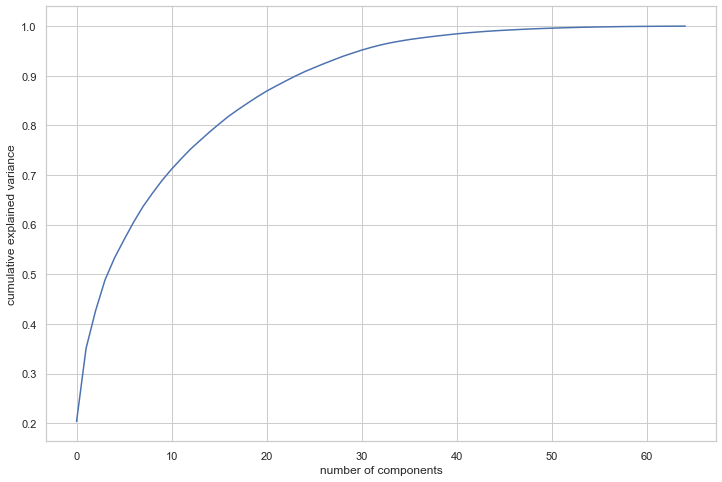

In [99]:
#Imputed nulls incase of any nulls 
perform_PCA(X_train)

**Inference**
- 30 components can explain 95% of variance in the dataset. Let us chose 30 components for modeling

(20892, 30)
(20892, 1)
(8954, 30)
(8954, 1)


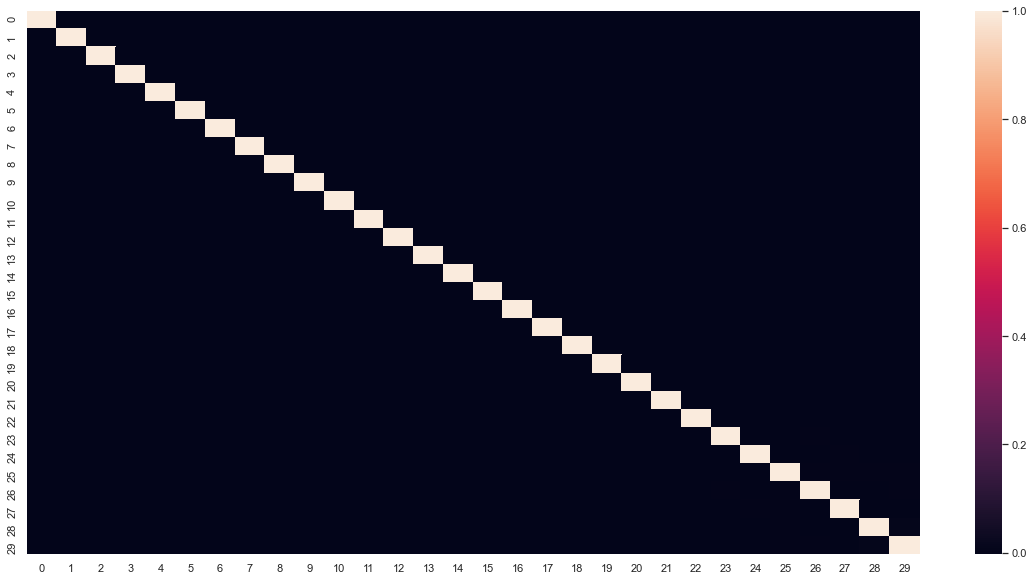

max corr: 0.007467717448426554 , min corr:  -0.002597841894261405


In [100]:
X_train_pca, X_test_pca = perform_incremental_PCA(X_train, y_train, 30)

**No correlation between components**

## <font color=brown>5.Model Building</font>

### <font color=brown>4.7 Handling Data Imbalance</font>

### <font color=brown>5.1 Logistic Regression</font>

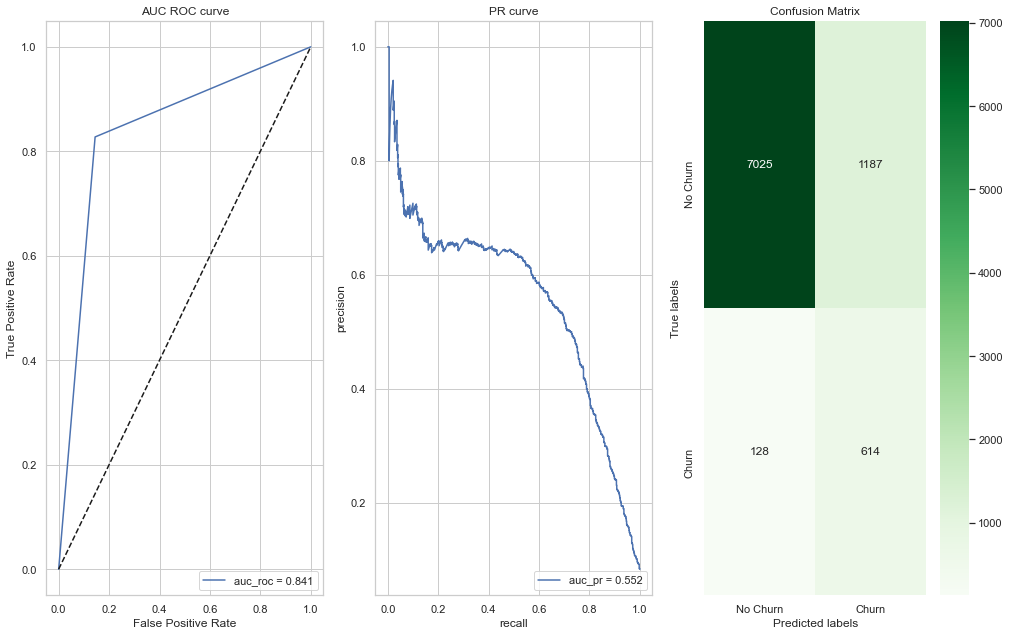

Sampling Type        f1  precision    recall  accuracy  \
0  Logistic Regression(Default)  0.482894   0.340922  0.827493  0.853138   

    auc_roc    auc_pr            confusion_matrix  
0  0.841474  0.552429  [[7025, 1187], [128, 614]]

In [101]:
# Logistic Regression with Default Parameters

lr = LogisticRegression(n_jobs = -1, random_state = 512)

lr = lr.fit(X_train_smote.values, y_train_smote.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lr, X_test) 

# Tabulate results
results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy','auc_roc', 'auc_pr','confusion_matrix'])
sampling_type = pd.DataFrame(['Logistic Regression(Default)'],columns=['Sampling Type'])
results = pd.concat([sampling_type, results], axis=1)
sampling_results = sampling_results.append(results)
sampling_results

**This is the initial output with default parameters. We will now proceed with hypertuning using GridSearch**

### <font color=brown>5.1.1 Logistic Regression - HyperTuning</font>

In [102]:
# GridSearchCV to find best penalty

# lr = LogisticRegression(n_jobs = -1, random_state = 512)

# parameter = 'penalty'

# # parameters to build the model on
# param_grid = {parameter: ['l1', 'l2']}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', lr)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)



### <font color=brown>5.1.2 Logistic Regression - Hyper tuning C</font>

In [103]:
# GridSearchCV to find best C-Penalty remains the same and hence any penalty method (l1 or l2) can be taken into consideration.
# GridSearchCV to find best penalty

# lr = LogisticRegression(penalty = 'l2', n_jobs = -1, random_state = 512)

# parameter = 'C'

# # parameters to build the model on
# param_grid = {parameter: [1, 10, 100, 1000]}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', lr)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)



### <font color=brown>5.1.3 Logistic Regression with best parameters obtained from Grid Search</font>

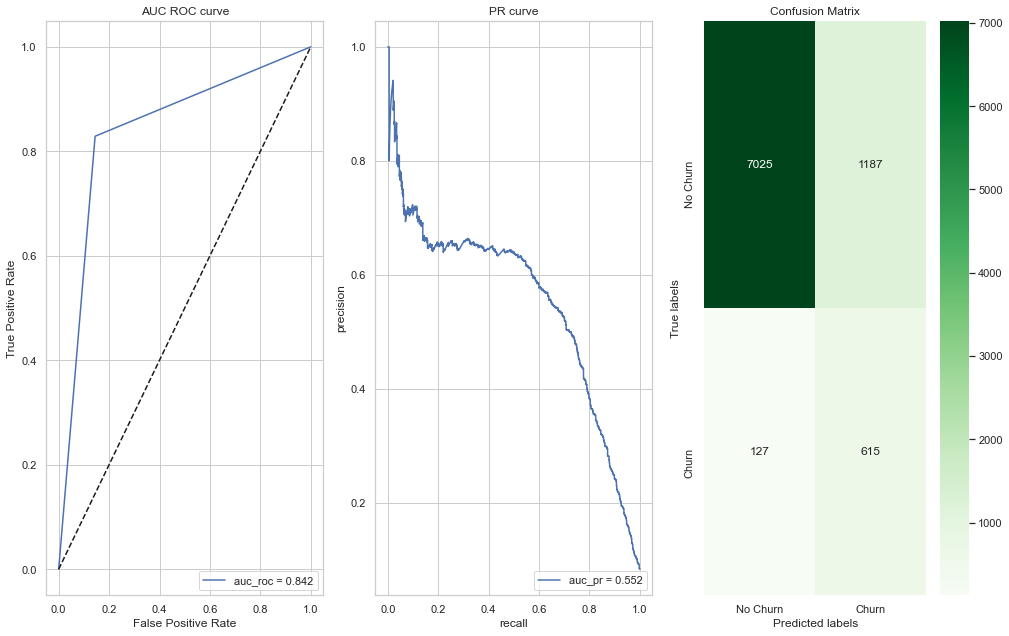

Sampling Type        f1  precision    recall  accuracy  \
0    Logistic Regression(Default)  0.482894   0.340922  0.827493  0.853138   
0  Logistic Regression Hypertuned  0.483491   0.341287  0.828841  0.853250   

    auc_roc    auc_pr            confusion_matrix  
0  0.841474  0.552429  [[7025, 1187], [128, 614]]  
0  0.842148  0.551993  [[7025, 1187], [127, 615]]

In [104]:
# Logistic with best parameters obtained from grid search

lr = LogisticRegression(penalty = 'l2', C = 100, n_jobs = -1, random_state = 512)

lrf = lr.fit(X_train_smote.values, y_train_smote.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lrf, X_test)

# Tabulate results
results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr','confusion_matrix'])

sampling_type = pd.DataFrame(['Logistic Regression Hypertuned'],columns=['Sampling Type'])
results = pd.concat([sampling_type, results], axis=1)
sampling_results = sampling_results.append(results)
sampling_results

- Recall is low and other sampling techniques to be used.
- Hyper tuning did not change the performance of the model.

Performing Base
Performing SMOTE
Performing SMOTEENN
Performing RandomOverSampler
Performing RandomUnderSampler
 
Training on Base
Training on SMOTE
Training on SMOTEENN
Training on RandomOverSampler
Training on RandomUnderSampler


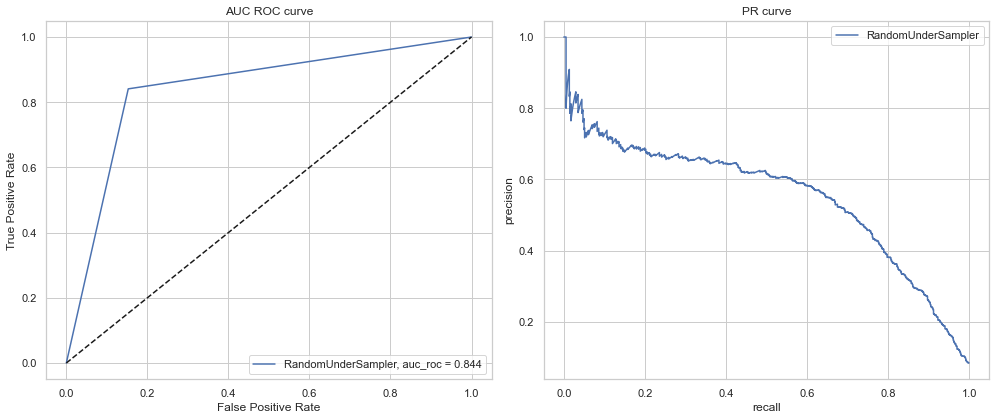

Sampling Type        f1  precision    recall  accuracy   auc_roc  \
2            SMOTEENN  0.415691   0.271600  0.885445  0.793723  0.835440   
3   RandomOverSampler  0.481667   0.337480  0.840970  0.850011  0.845899   
4  RandomUnderSampler  0.476154   0.332092  0.840970  0.846661  0.844073   
1               SMOTE  0.483111   0.340909  0.828841  0.853027  0.842026   
0                Base  0.567823   0.684411  0.485175  0.938798  0.732480   

     auc_pr            confusion_matrix  
2  0.521694   [[6450, 1762], [85, 657]]  
3  0.547192  [[6987, 1225], [118, 624]]  
4  0.552700  [[6957, 1255], [118, 624]]  
1  0.551829  [[7023, 1189], [127, 615]]  
0  0.593302   [[8046, 166], [382, 360]]

In [105]:
# Sampling Results
results = get_different_sampling_type_results('Logistic', X_test)
# Tabulated results for various sampling on test set
results

**Inference**
 - RandomOverSampler & SMOTE leads to high accuracy and recall but precision is low.
 - SMOTE and RandomUnderSampler also perform good considering auc_roc with accpetables levels of false positives.

**Note: SMOTE sampling is used by default**<br>
**None of the other Sampling scores can be accepted as the precision and f1 scores are very low. We will proceed with some different Machine Learning algorithms to increase the scores (f1, precision, recall, accuracy, auc_roc).**

### <font color=brown>5.2 Decision Tree</font>

### <font color=brown>5.2.1 Decision Tree with Default Parameters</font>

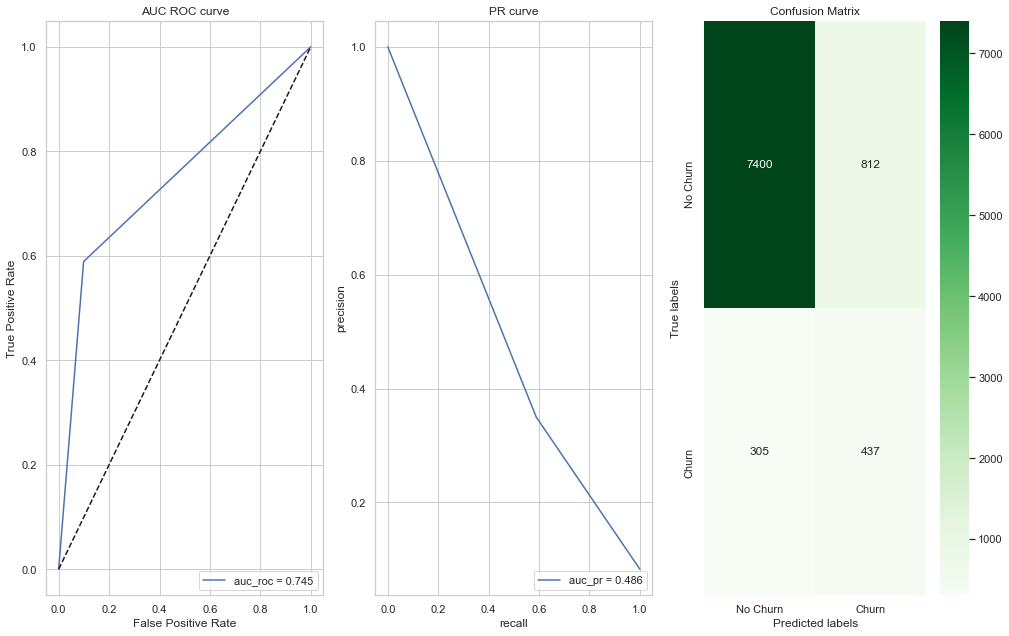

Sampling Type        f1  precision    recall  accuracy  \
0    Logistic Regression(Default)  0.482894   0.340922  0.827493  0.853138   
0  Logistic Regression Hypertuned  0.483491   0.341287  0.828841  0.853250   
0          Decision Tree(Default)  0.438975   0.349880  0.588949  0.875251   

    auc_roc    auc_pr            confusion_matrix  
0  0.841474  0.552429  [[7025, 1187], [128, 614]]  
0  0.842148  0.551993  [[7025, 1187], [127, 615]]  
0  0.745035  0.486446   [[7400, 812], [305, 437]]

In [106]:
# Decision Tree with Default Parameters

tree = DecisionTreeClassifier(random_state = 512)

tree = tree.fit(X_train_smote.values, y_train_smote.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, tree, X_test)

# Tabulate results
results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr','confusion_matrix'])
sampling_type = pd.DataFrame(['Decision Tree(Default)'],columns=['Sampling Type'])
results = pd.concat([sampling_type, results], axis=1)
sampling_results = sampling_results.append(results)
sampling_results

**This is the initial output with default parameters. We will now proceed with hypertuning using GridSearch**

### <font color=brown>5.2.2 Decision Tree Hyper tuning-maximum depth</font>

In [107]:
# # GridSearchCV to find optimal max_depth

# tree = DecisionTreeClassifier(random_state = 512)

# parameter = 'max_depth'

# # parameters to build the model on
# param_grid = {parameter: range(1,30,2)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', tree)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

### <font color=brown>5.2.3 Decision Tree - HyperTuning min_samples_split</font>

In [108]:
# GridSearchCV to find optimal min_samples_split
# tree = DecisionTreeClassifier(max_depth = 9, random_state = 512)

# parameter = 'min_samples_split'

# # parameters to build the model on
# param_grid = {parameter: range(2, 30)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', tree)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

### <font color=brown>5.2.4 Decision Tree - HyperTuning min_samples_leaf</font>

In [109]:
# GridSearchCV to find optimal min_samples_leaf
# tree = DecisionTreeClassifier(max_depth = 9, min_samples_split = 25, random_state = 512)

# parameter = 'min_samples_leaf'

# # parameters to build the model on
# param_grid = {parameter: range(1, 61)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', tree)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

### <font color=brown>5.2.5 Decision Tree Model with best parameters obtained from Grid Search</font>

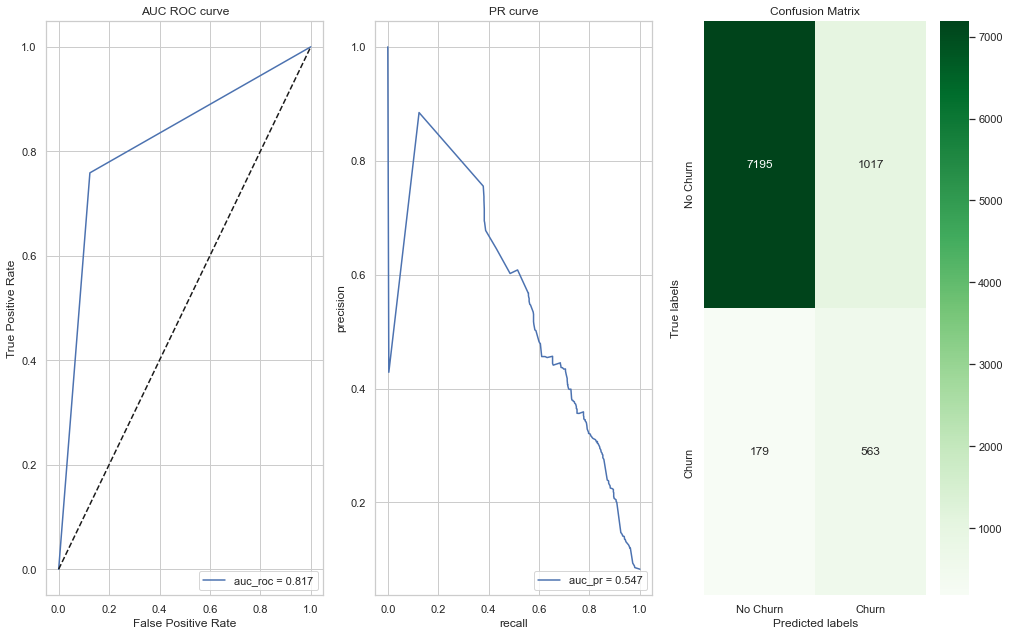

Sampling Type        f1  precision    recall  accuracy  \
0    Logistic Regression(Default)  0.482894   0.340922  0.827493  0.853138   
0  Logistic Regression Hypertuned  0.483491   0.341287  0.828841  0.853250   
0          Decision Tree(Default)  0.438975   0.349880  0.588949  0.875251   
0        Decision Tree Hypertuned  0.484927   0.356329  0.758760  0.866428   

    auc_roc    auc_pr            confusion_matrix  
0  0.841474  0.552429  [[7025, 1187], [128, 614]]  
0  0.842148  0.551993  [[7025, 1187], [127, 615]]  
0  0.745035  0.486446   [[7400, 812], [305, 437]]  
0  0.817458  0.547189  [[7195, 1017], [179, 563]]

In [110]:
# Decision Tree with best parameters obtained from grid search

tree = DecisionTreeClassifier(max_depth = 9, min_samples_split = 25, min_samples_leaf = 38, random_state = 512)

tree = tree.fit(X_train_smote.values, y_train_smote.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, tree, X_test)

# Tabulate results
results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr','confusion_matrix'])
sampling_type = pd.DataFrame(['Decision Tree Hypertuned'],columns=['Sampling Type'])
results = pd.concat([sampling_type, results], axis=1)
sampling_results = sampling_results.append(results)
sampling_results

For Decision Trees:

 - With Default Parameters:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |  
|0.438975  |0.349880 |0.588949  |0.875251  |0.745035 | 0.486446	 |[[7400, 812], [305, 437]] |

 - And With HyperTuning:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.484927 | 0.356329 | 0.758760 |  0.866428 | 0.817458 |0.547189 |[[7195, 1017], [179, 563]]|

        

**There is an improvement in f1, precision, recall, accuracy and auc_roc in the final model (After HyperTuning)**<br>
**Still precision seems to be low to consider the model.**<br>

**Note:**

We have used SMOTE sampling method for handling the class imbalance. Let's now verify other sampling methods and see if their scores is better than SMOTE or not.

Performing Base
Performing SMOTE
Performing SMOTEENN
Performing RandomOverSampler
Performing RandomUnderSampler
 
Training on Base
Training on SMOTE
Training on SMOTEENN
Training on RandomOverSampler
Training on RandomUnderSampler


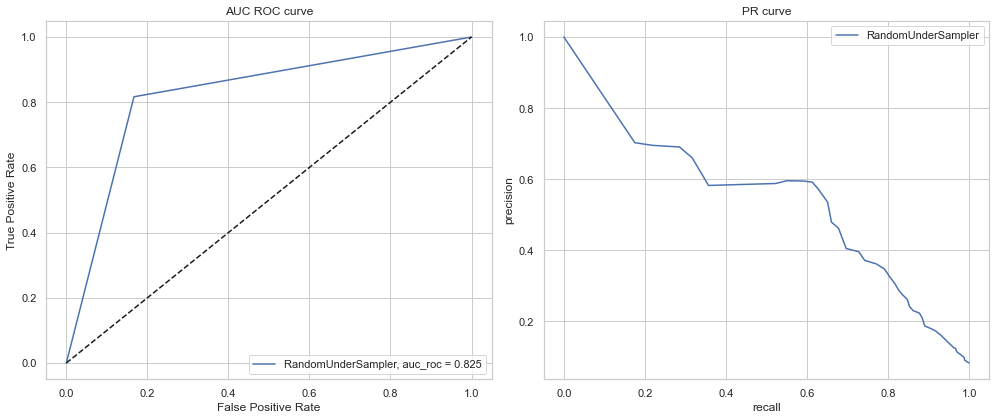

Sampling Type        f1  precision    recall  accuracy   auc_roc  \
2            SMOTEENN  0.435556   0.291800  0.858491  0.815613  0.835115   
4  RandomUnderSampler  0.445752   0.306525  0.816712  0.831695  0.824880   
1               SMOTE  0.486664   0.349853  0.799191  0.860286  0.832499   
3   RandomOverSampler  0.501279   0.366584  0.792453  0.869332  0.834366   
0                Base  0.566590   0.660682  0.495957  0.937123  0.736471   

     auc_pr            confusion_matrix  
2  0.494464  [[6666, 1546], [105, 637]]  
4  0.543116  [[6841, 1371], [136, 606]]  
1  0.532984  [[7110, 1102], [149, 593]]  
3  0.590921  [[7196, 1016], [154, 588]]  
0  0.615048   [[8023, 189], [374, 368]]

In [111]:
# Get Different Sampling Results
results = get_different_sampling_type_results('Decision Tree', X_test)

# Tabulate results
results

**Out of various Sampling methods, ROS yields the better metrics in f1, precision, recall, accuracy and auc_roc**

 - With ROS Sampling, we got:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
|0.501279 | 0.366584 | 0.792453	 | 0.869332	| 0.834366 | 0.590921 |{[7196, 1016], [154, 588]] |

<br></br>
Recall and accuracy are better,but precision is still low.<br>
**Let us try with Random Forest model & check the result**

###  <font color=brown>5.3 Random Forest</font>

####  <font color=brown>5.3.1 Random Forest with default parameters</font>

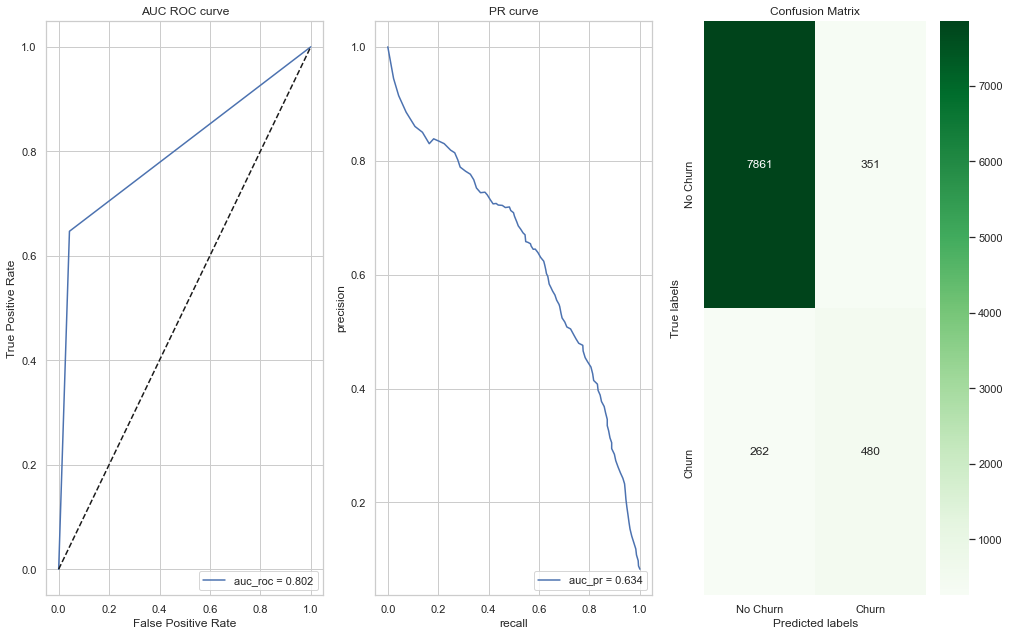

Sampling Type        f1  precision    recall  accuracy  \
0    Logistic Regression(Default)  0.482894   0.340922  0.827493  0.853138   
0  Logistic Regression Hypertuned  0.483491   0.341287  0.828841  0.853250   
0          Decision Tree(Default)  0.438975   0.349880  0.588949  0.875251   
0        Decision Tree Hypertuned  0.484927   0.356329  0.758760  0.866428   
0          Random Forest(Default)  0.610299   0.577617  0.646900  0.931539   

    auc_roc    auc_pr            confusion_matrix  
0  0.841474  0.552429  [[7025, 1187], [128, 614]]  
0  0.842148  0.551993  [[7025, 1187], [127, 615]]  
0  0.745035  0.486446   [[7400, 812], [305, 437]]  
0  0.817458  0.547189  [[7195, 1017], [179, 563]]  
0  0.802079  0.634185   [[7861, 351], [262, 480]]

In [112]:
# Random Forest with Default Parameters

rfc = RandomForestClassifier(n_jobs = -1, random_state = 512)

rfc = rfc.fit(X_train_smote.values, y_train_smote.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, rfc, X_test)

# Tabulate results
results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr','confusion_matrix'])
sampling_type = pd.DataFrame(['Random Forest(Default)'],columns=['Sampling Type'])
results = pd.concat([sampling_type, results], axis=1)
sampling_results = sampling_results.append(results)
sampling_results

**This is the initial output with default parameters. Now check with hypertuning using GridSearch**

#### <font color=brown>5.3.2 Random Forest - HyperTuning n_estimators</font>

In [113]:
# GridSearchCV to find optimal n_estimators
# rfc = RandomForestClassifier(n_jobs = -1, random_state = 512)

# parameter = 'n_estimators'

# # parameters to build the model on
# param_grid = {parameter:range(100,1000,100)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', rfc)
    
# # scores of GridSearch 
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.3.3 Random Forest - HyperTuning max_depth</font>

In [114]:
# GridSearchCV to find optimal max_depth

# rfc = RandomForestClassifier(n_estimators = 800, n_jobs = -1, random_state = 512)

# parameter = 'max_depth'

# # parameters to build the model on
# param_grid = {parameter: range(1,30,2)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', rfc)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.3.4 Random Forest - HyperTuning min_samples_split</font>

In [115]:
# GridSearchCV to find optimal min_samples_split
# fc = RandomForestClassifier(n_estimators = 800, max_depth = 29, n_jobs = -1, random_state = 512)

# parameter = 'min_samples_split'

# # parameters to build the model on
# param_grid = {parameter: (2,11,2)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', rfc)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.3.5 Random Forest - HyperTuning min_samples_leaf</font>

In [116]:
# GridSearchCV to find optimal min_samples_leaf
# rfc = RandomForestClassifier(n_estimators = 800, max_depth =29, min_samples_split = 2,
#                              n_jobs = -1, random_state = 512)

# parameter = 'min_samples_leaf'

# # parameters to build the model on
# param_grid = {parameter: range(1, 10)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', rfc)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.3.6 Random Forest with best parameters obtained from Grid Search</font>

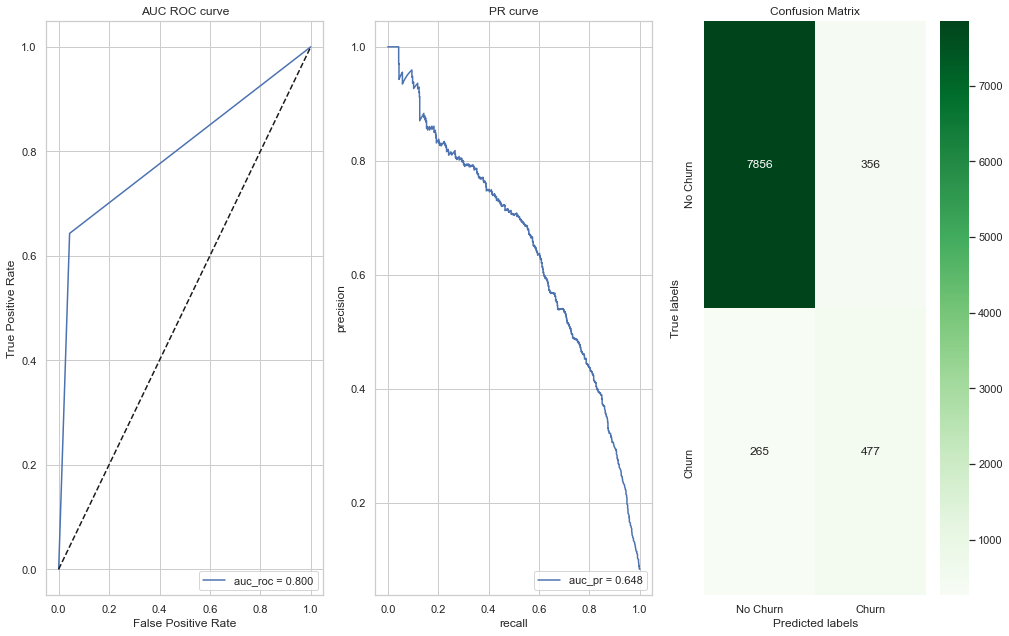

Sampling Type        f1  precision    recall  accuracy  \
0    Logistic Regression(Default)  0.482894   0.340922  0.827493  0.853138   
0  Logistic Regression Hypertuned  0.483491   0.341287  0.828841  0.853250   
0          Decision Tree(Default)  0.438975   0.349880  0.588949  0.875251   
0        Decision Tree Hypertuned  0.484927   0.356329  0.758760  0.866428   
0          Random Forest(Default)  0.610299   0.577617  0.646900  0.931539   
0        Random Forest Hypertuned  0.605714   0.572629  0.642857  0.930646   

    auc_roc    auc_pr            confusion_matrix  
0  0.841474  0.552429  [[7025, 1187], [128, 614]]  
0  0.842148  0.551993  [[7025, 1187], [127, 615]]  
0  0.745035  0.486446   [[7400, 812], [305, 437]]  
0  0.817458  0.547189  [[7195, 1017], [179, 563]]  
0  0.802079  0.634185   [[7861, 351], [262, 480]]  
0  0.799753  0.647628   [[7856, 356], [265, 477]]

In [117]:
# Random Forest with best parameters obtained from grid search

rfc = RandomForestClassifier(n_estimators = 800, max_depth = 29, min_samples_split = 2, min_samples_leaf = 1,
                             n_jobs = -1, random_state = 512)

rfc = rfc.fit(X_train_smote.values, y_train_smote.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, rfc, X_test)

# Tabulate results
results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr','confusion_matrix'])
sampling_type = pd.DataFrame(['Random Forest Hypertuned'],columns=['Sampling Type'])
results = pd.concat([sampling_type, results], axis=1)
sampling_results = sampling_results.append(results)
sampling_results

From Random Forest:    

- with Default Parameters:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.610299 | 0.577617 | 0.646900 | 0.931539 | 0.802079 | 0.634185	  |[[7861, 351], [262, 480]] |

- with HyperTuning:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.605714	|0.572629| 0.642857| 0.930646 | 0.799753 |0.647628 |[[7856, 356], [265, 477]] |

**Random Forest has a better score than Decision Tree. Compared to Decision Tree, there is significant improvement in f1, precision, recall, accuracy and auc_roc in the final model of Random Forest (After HyperTuning) However, hypertuning didn't improve the performance of Random Forest.**

**Note:**

We have used SMOTE sampling method for handling the class imbalance. Let's now verify other sampling methods and see if their scores is better than SMOTE or not.

Performing Base
Performing SMOTE
Performing SMOTEENN
Performing RandomOverSampler
Performing RandomUnderSampler
 
Training on Base
Training on SMOTE
Training on SMOTEENN
Training on RandomOverSampler
Training on RandomUnderSampler


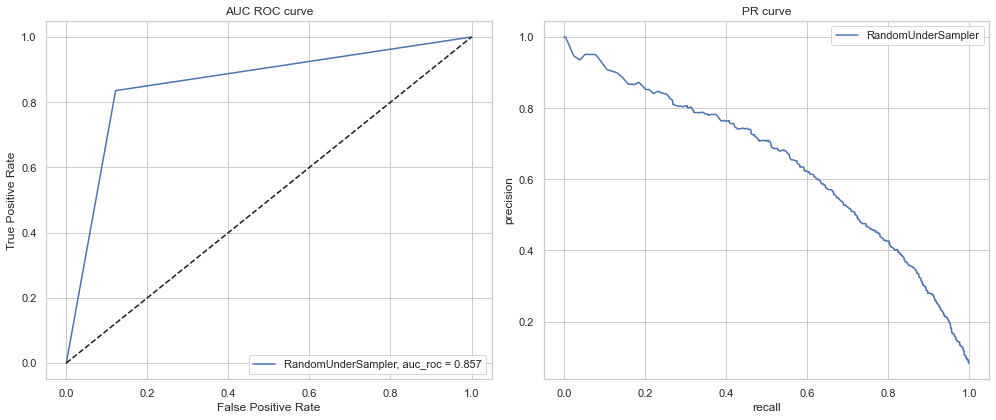

Sampling Type        f1  precision    recall  accuracy   auc_roc  \
4  RandomUnderSampler  0.525201   0.382952  0.835580  0.874805  0.856964   
2            SMOTEENN  0.564740   0.437454  0.796496  0.898258  0.851974   
1               SMOTE  0.606214   0.572455  0.644205  0.930646  0.800366   
3   RandomOverSampler  0.614114   0.693220  0.551213  0.942595  0.764586   
0                Base  0.583468   0.731707  0.485175  0.942595  0.734551   

     auc_pr           confusion_matrix  
4  0.645266  [[7213, 999], [122, 620]]  
2  0.655522  [[7452, 760], [151, 591]]  
1  0.646399  [[7855, 357], [264, 478]]  
3  0.659908  [[8031, 181], [333, 409]]  
0  0.668454  [[8080, 132], [382, 360]]

In [118]:
# Get Different Sampling Results
results = get_different_sampling_type_results('Random Forest', X_test)

# Tabulate results
results

**SMOTEENN yields the best result for f1, precision, recall and accuracy**

With SMOTEENN Sampling and Hypertuning, we got:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.564740 | 0.437454  | 0.796496 |  0.898258  | 0.851974   | 0.655522|[[7452, 760], [151, 591]]  |

In [119]:
res=results.loc[2,:]
res['Sampling Type']='Random Forest Hypertuned SMOTEENN'
sampling_results.append(res)

Sampling Type        f1  precision    recall  accuracy  \
0       Logistic Regression(Default)  0.482894   0.340922  0.827493  0.853138   
0     Logistic Regression Hypertuned  0.483491   0.341287  0.828841  0.853250   
0             Decision Tree(Default)  0.438975   0.349880  0.588949  0.875251   
0           Decision Tree Hypertuned  0.484927   0.356329  0.758760  0.866428   
0             Random Forest(Default)  0.610299   0.577617  0.646900  0.931539   
0           Random Forest Hypertuned  0.605714   0.572629  0.642857  0.930646   
2  Random Forest Hypertuned SMOTEENN  0.564740   0.437454  0.796496  0.898258   

    auc_roc    auc_pr            confusion_matrix  
0  0.841474  0.552429  [[7025, 1187], [128, 614]]  
0  0.842148  0.551993  [[7025, 1187], [127, 615]]  
0  0.745035  0.486446   [[7400, 812], [305, 437]]  
0  0.817458  0.547189  [[7195, 1017], [179, 563]]  
0  0.802079  0.634185   [[7861, 351], [262, 480]]  
0  0.799753  0.647628   [[7856, 356], [265, 477]]  
2  0.851974  0.655522   [[7452, 760], [151, 591]]

### <font color=brown>5.4 XGBoost Model</font>

#### <font color=brown>5.4.1 XGBoost Classifier with default parameters</font>

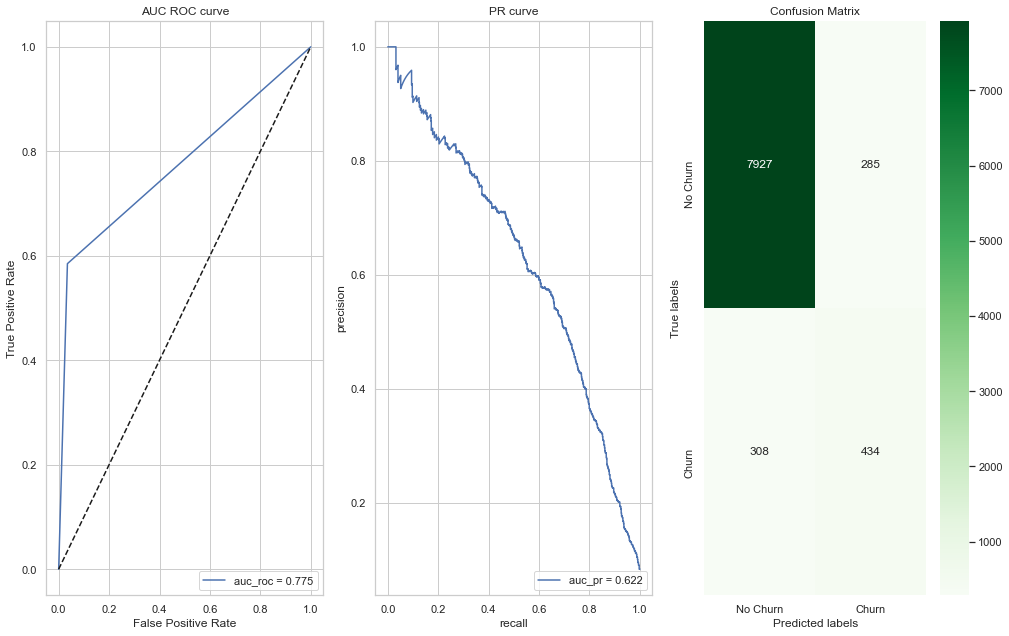

Sampling Type        f1  precision    recall  accuracy  \
0    Logistic Regression(Default)  0.482894   0.340922  0.827493  0.853138   
0  Logistic Regression Hypertuned  0.483491   0.341287  0.828841  0.853250   
0          Decision Tree(Default)  0.438975   0.349880  0.588949  0.875251   
0        Decision Tree Hypertuned  0.484927   0.356329  0.758760  0.866428   
0          Random Forest(Default)  0.610299   0.577617  0.646900  0.931539   
0        Random Forest Hypertuned  0.605714   0.572629  0.642857  0.930646   
0                XGBoost(Default)  0.594114   0.603616  0.584906  0.933773   

    auc_roc    auc_pr            confusion_matrix  
0  0.841474  0.552429  [[7025, 1187], [128, 614]]  
0  0.842148  0.551993  [[7025, 1187], [127, 615]]  
0  0.745035  0.486446   [[7400, 812], [305, 437]]  
0  0.817458  0.547189  [[7195, 1017], [179, 563]]  
0  0.802079  0.634185   [[7861, 351], [262, 480]]  
0  0.799753  0.647628   [[7856, 356], [265, 477]]  
0  0.775100  0.621971   [[7927, 285], [308, 434]]

In [120]:
# XGBoost with Default Parameters

xgb = XGBClassifier(n_jobs = -1, random_state = 512,objective = "binary:logistic", eval_metric = "error",use_label_encoder=False)

xgb = xgb.fit(X_train_smote.values, y_train_smote.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, xgb, X_test)

# Tabulate results
results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr','confusion_matrix'])

sampling_type = pd.DataFrame(['XGBoost(Default)'],columns=['Sampling Type'])
results = pd.concat([sampling_type, results], axis=1)
sampling_results = sampling_results.append(results)
sampling_results

#### <font color=brown> XGBoost - HyperTuning </font>

#### <font color=brown>5.4.2 XGBoost - HyperTuning max_depth</font>

In [121]:
# GridSearchCV to find optimal max_depth

# xgb = XGBClassifier(n_jobs = -1, random_state = 512,objective = "binary:logistic", eval_metric = "error", use_label_encoder=False)

# parameter = 'max_depth'

# param_grid = {parameter: range(4,40)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', xgb)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.4.3 XGBoost - HyperTuning learning_rate</font>

In [122]:
# GridSearchCV to find optimal learning_rate

# xgb = XGBClassifier(max_depth = 4, n_jobs = -1, random_state = 512,objective = "binary:logistic", eval_metric = "error", use_label_encoder=False)

# parameter = 'learning_rate'

# param_grid = {parameter: [0.001, 0.01, 0.1, 0.2, 0.3, 0.6, 0.9, 0.95, 0.99]}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', xgb)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.4.4 XGBoost - HyperTuning n_estimators</font>

In [123]:
# GridSearchCV to find optimal n_estimators
# xgb = XGBClassifier(max_depth = 14, learning_rate = 0.03, n_jobs = -1, random_state = 512,objective = "binary:logistic", eval_metric = "error", use_label_encoder=False)

# parameter = 'n_estimators'

# param_grid = {parameter: range(100, 1100, 100)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', xgb)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.4.5 XGBoost - HyperTuning min_child_weight</font>

In [124]:
# GridSearchCV to find optimal min_child_weight
# xgb = XGBClassifier(max_depth = 14, learning_rate = 0.03,n_estimators=300, n_jobs = -1, random_state = 512,objective = "binary:logistic", eval_metric = "error", use_label_encoder=False)

# parameter = 'min_child_weight'

# param_grid = {parameter: range(1, 11,1)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', xgb)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.4.6 XGBoost - HyperTuning subsample</font>

In [125]:
# GridSearchCV to find optimal subsample: 

# xgb = XGBClassifier(max_depth = 4, learning_rate = 0.03, n_estimators = 300, min_child_weight = 1,
#                     n_jobs = -1, random_state = 512,objective = "binary:logistic", eval_metric = "error", use_label_encoder=False)

# parameter = 'subsample'

# param_grid = {parameter: np.arange(0.2, 1.2, 0.2)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', xgb)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.4.7 XGBoost - HyperTuning colsample_bytree</font>

In [126]:
# GridSearchCV to find optimal colsample_bytree: 
# xgb = XGBClassifier(max_depth =4, learning_rate = 0.03, n_estimators = 300, min_child_weight = 1,
#                     subsample = 1.0, n_jobs = -1, random_state = 512,objective = "binary:logistic", eval_metric = "error", use_label_encoder=False)

# parameter = 'colsample_bytree'

# param_grid = {parameter: np.arange(0.1, 1.1, 0.1)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', xgb)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.4.8 XGBoost with best parameters obtained from Grid Search</font>

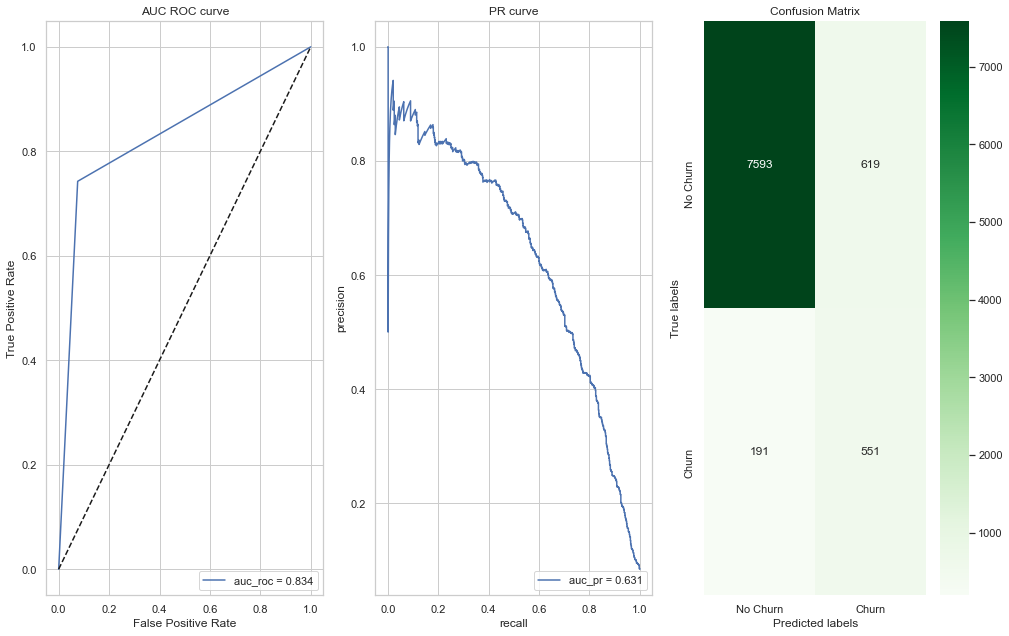

Sampling Type        f1  precision    recall  accuracy  \
0    Logistic Regression(Default)  0.482894   0.340922  0.827493  0.853138   
0  Logistic Regression Hypertuned  0.483491   0.341287  0.828841  0.853250   
0          Decision Tree(Default)  0.438975   0.349880  0.588949  0.875251   
0        Decision Tree Hypertuned  0.484927   0.356329  0.758760  0.866428   
0          Random Forest(Default)  0.610299   0.577617  0.646900  0.931539   
0        Random Forest Hypertuned  0.605714   0.572629  0.642857  0.930646   
0                XGBoost(Default)  0.594114   0.603616  0.584906  0.933773   
0              XGBoost Hypertuned  0.576360   0.470940  0.742588  0.909538   

    auc_roc    auc_pr            confusion_matrix  
0  0.841474  0.552429  [[7025, 1187], [128, 614]]  
0  0.842148  0.551993  [[7025, 1187], [127, 615]]  
0  0.745035  0.486446   [[7400, 812], [305, 437]]  
0  0.817458  0.547189  [[7195, 1017], [179, 563]]  
0  0.802079  0.634185   [[7861, 351], [262, 480]]  
0  0.799753  0.647628   [[7856, 356], [265, 477]]  
0  0.775100  0.621971   [[7927, 285], [308, 434]]  
0  0.833605  0.630622   [[7593, 619], [191, 551]]

In [127]:
# Random Forest with best parameters obtained from grid search

xgb = XGBClassifier(max_depth = 4, learning_rate = 0.03, n_estimators = 300, min_child_weight = 1,gamma=0.1,nthread=4, subsample=0.4,
                          colsample_bytree=0.6,reg_alpha=1,
                          reg_lambda=3,n_jobs = -1, random_state = 512,objective = "binary:logistic", eval_metric = "error", use_label_encoder=False)

xgb = xgb.fit(X_train_smote.values, y_train_smote.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, xgb, X_test)

# Tabulate results
results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr','confusion_matrix'])
sampling_type = pd.DataFrame(['XGBoost Hypertuned'],columns=['Sampling Type'])
results = pd.concat([sampling_type, results], axis=1)
sampling_results = sampling_results.append(results)
sampling_results


From XGBoost:
- with Default Parameters:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
|  0.594114  | 0.603616 | 0.584906 | 0.933773 | 0.775100 | 0.621971 |[[7927, 285], [308, 434]]|

- with HyperTuning:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
|0.576360 |0.470940 |0.742588|0.909538|0.833605 |0.630622|[[7593, 619], [191, 551]] |

**There is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model of XGBoost (After HyperTuning)**

**Note:**

We have used Base sampling method for handling the class imbalance. Let's now verify other sampling methods and see if their scores is better than it or not.

Performing Base
Performing SMOTE
Performing SMOTEENN
Performing RandomOverSampler
Performing RandomUnderSampler
 
Training on Base
Training on SMOTE
Training on SMOTEENN
Training on RandomOverSampler
Training on RandomUnderSampler


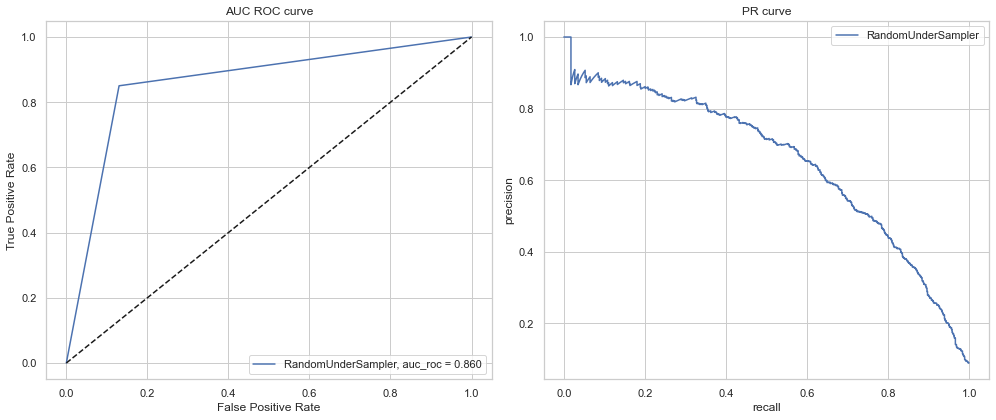

Sampling Type        f1  precision    recall  accuracy   auc_roc  \
4  RandomUnderSampler  0.516790   0.371176  0.850404  0.868215  0.860114   
2            SMOTEENN  0.547576   0.410498  0.822102  0.887425  0.857715   
3   RandomOverSampler  0.614499   0.536145  0.719677  0.925173  0.831709   
1               SMOTE  0.611359   0.580606  0.645553  0.931986  0.801710   
0                Base  0.616923   0.718638  0.540431  0.944382  0.760656   

     auc_pr            confusion_matrix  
4  0.652375  [[7143, 1069], [111, 631]]  
2  0.625336   [[7336, 876], [132, 610]]  
3  0.673432   [[7750, 462], [208, 534]]  
1  0.649403   [[7866, 346], [263, 479]]  
0  0.675582   [[8055, 157], [341, 401]]

In [128]:
# Get Different Sampling Results
results = get_different_sampling_type_results('XGBoost', X_test)
results

In [129]:
#Adding High performed sampling model to result set
res=results.loc[3,:]
res['Sampling Type']='XGBoost ROS'
sampling_results=sampling_results.append(res)


**Out of various Sampling methods, ROS yields the best one in f1, precision, recall, accuracy and auc_roc**

 - With RandomOverSampler Sampling and Hypertuning, we got:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.614499 | 0.536145 |0.719677| 0.925173 | 0.831709 |0.673432|[[7750, 462], [208, 534]]|

<br></br>

**Try with LightGBM to see the result**

### <font color=brown>5. LightGBM Model</font>

#### <font color=brown>5.5.1 LightGBM Classifier with default parameters</font>

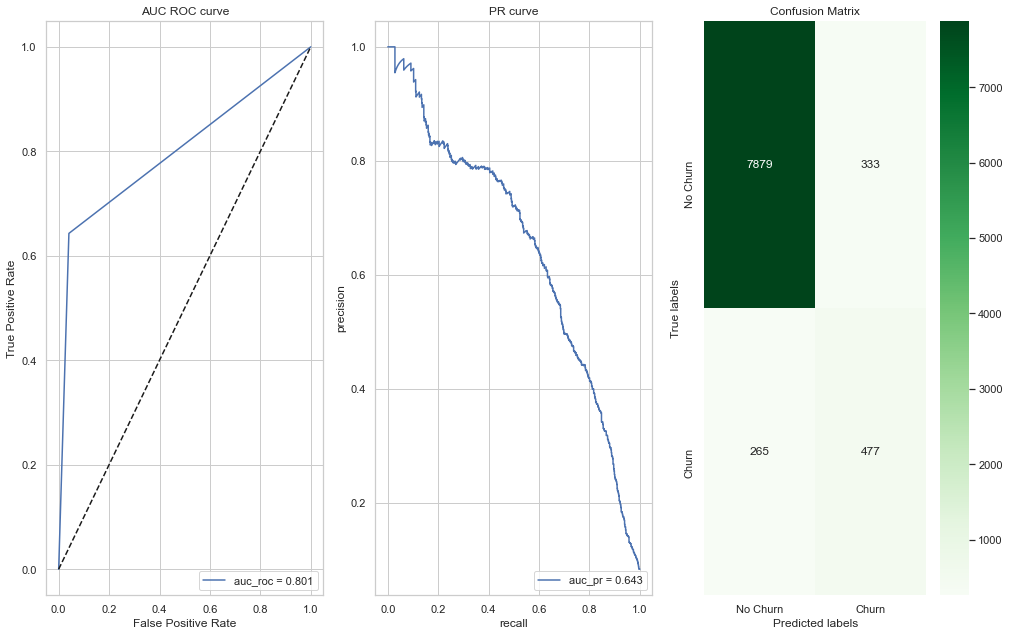

Sampling Type        f1  precision    recall  accuracy  \
0    Logistic Regression(Default)  0.482894   0.340922  0.827493  0.853138   
0  Logistic Regression Hypertuned  0.483491   0.341287  0.828841  0.853250   
0          Decision Tree(Default)  0.438975   0.349880  0.588949  0.875251   
0        Decision Tree Hypertuned  0.484927   0.356329  0.758760  0.866428   
0          Random Forest(Default)  0.610299   0.577617  0.646900  0.931539   
0        Random Forest Hypertuned  0.605714   0.572629  0.642857  0.930646   
0                XGBoost(Default)  0.594114   0.603616  0.584906  0.933773   
0              XGBoost Hypertuned  0.576360   0.470940  0.742588  0.909538   
3                     XGBoost ROS  0.614499   0.536145  0.719677  0.925173   
0               LightGBM(Default)  0.614691   0.588889  0.642857  0.933214   

    auc_roc    auc_pr            confusion_matrix  
0  0.841474  0.552429  [[7025, 1187], [128, 614]]  
0  0.842148  0.551993  [[7025, 1187], [127, 615]]  
0  0.745035  0.486446   [[7400, 812], [305, 437]]  
0  0.817458  0.547189  [[7195, 1017], [179, 563]]  
0  0.802079  0.634185   [[7861, 351], [262, 480]]  
0  0.799753  0.647628   [[7856, 356], [265, 477]]  
0  0.775100  0.621971   [[7927, 285], [308, 434]]  
0  0.833605  0.630622   [[7593, 619], [191, 551]]  
3  0.831709  0.673432   [[7750, 462], [208, 534]]  
0  0.801153  0.643203   [[7879, 333], [265, 477]]

In [130]:
# LightGBM with Default Parameters

lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 512)

lgb = lgb.fit(X_train_smote.values, y_train_smote.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lgb, X_test)

# Tabulate results
results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr','confusion_matrix'])
sampling_type = pd.DataFrame(['LightGBM(Default)'],columns=['Sampling Type'])
results = pd.concat([sampling_type, results], axis=1)
sampling_results = sampling_results.append(results)
sampling_results

#### <font color=brown>LightGBM - HyperTuning</font>

#### <font color=brown>5.5.2 LightGBM - HyperTuning num_leaves</font>

In [131]:
# GridSearchCV to find optimal num_leaves
# lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 512)

# parameter = 'num_leaves'

# param_grid = {parameter: range(20, 72)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', lgb)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.5.3 LightGBM - HyperTuning max_depth</font>

In [132]:
# GridSearchCV to find optimal max_depth
# lgb = LGBMClassifier(num_leaves = 71, objective = 'binary', n_jobs = -1, random_state = 512)

# parameter = 'max_depth'

# param_grid = {parameter: range(8, 72)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', lgb)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.5.4 LightGBM - HyperTuning learning_rate</font>

In [133]:
# GridSearchCV to find optimal learning_rate
# lgb = LGBMClassifier(num_leaves = 71, max_depth = 31, objective = 'binary', n_jobs = -1, random_state = 512)

# parameter = 'learning_rate'

# param_grid = {parameter: np.arange(0.1, 1.1, 0.1)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', lgb)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.5.5 LightGBM - HyperTuning n_estimators</font>

In [134]:
# GridSearchCV to find optimal n_estimators
# lgb = LGBMClassifier(num_leaves = 71, max_depth = 31, learning_rate = 0.6, objective = 'binary',
#                      n_jobs = -1, random_state = 512)

# parameter = 'n_estimators'

# param_grid = {parameter: range(100, 1100, 100)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', lgb)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.5.6 LightGBM - HyperTuning min_child_samples</font>

In [135]:
# GridSearchCV to find optimal min_child_samples
# lgb = LGBMClassifier(num_leaves = 71, max_depth =31, learning_rate = 0.6, n_estimators = 1000 ,
#                      objective = 'binary', n_jobs = -1, random_state = 512)

# parameter = 'min_child_samples'

# param_grid = {parameter: range(1, 26)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', lgb)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.5.7 LightGBM - HyperTuning subsample</font>

In [136]:
# GridSearchCV to find optimal subsample: 
# lgb = LGBMClassifier(num_leaves = 71, max_depth = 31, learning_rate = 0.6, n_estimators = 1000, min_child_samples = 16,
#                      objective = 'binary', n_jobs = -1, random_state = 512)

# parameter = 'subsample'

# param_grid = {parameter: np.arange(0.1, 1.1, 0.1)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', lgb)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.5.8 LightGBM - HyperTuning colsample_bytree</font>

In [137]:
# GridSearchCV to find optimal colsample_bytree: 
# lgb = LGBMClassifier(num_leaves = 71, max_depth = 31, learning_rate = 0.6, n_estimators = 1000, min_child_samples = 16,
#                      subsample = 0.1, objective = 'binary', n_jobs = -1, random_state = 512)

# parameter = 'colsample_bytree'

# param_grid = {parameter: np.arange(0.1, 1.1, 0.1)}

# gc = model('SMOTE', X_train_smote, y_train_smote, param_grid, 'Individual', lgb)
    
# # scores of GridSearch CV
# scores = gc.cv_results_

# # Plot the scores
# hypertuning_plot(scores, parameter)

# # Get the best value
# print(gc.best_params_)

#### <font color=brown>5.5.9 LightGBM with best parameters obtained from Grid Search</font>

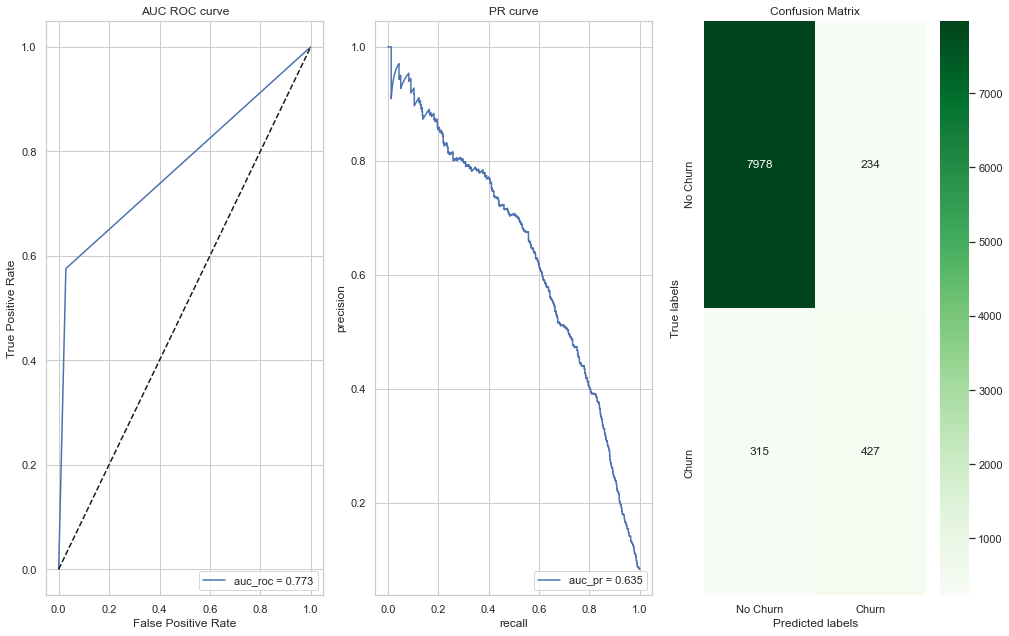

Sampling Type        f1  precision    recall  accuracy  \
0    Logistic Regression(Default)  0.482894   0.340922  0.827493  0.853138   
0  Logistic Regression Hypertuned  0.483491   0.341287  0.828841  0.853250   
0          Decision Tree(Default)  0.438975   0.349880  0.588949  0.875251   
0        Decision Tree Hypertuned  0.484927   0.356329  0.758760  0.866428   
0          Random Forest(Default)  0.610299   0.577617  0.646900  0.931539   
0        Random Forest Hypertuned  0.605714   0.572629  0.642857  0.930646   
0                XGBoost(Default)  0.594114   0.603616  0.584906  0.933773   
0              XGBoost Hypertuned  0.576360   0.470940  0.742588  0.909538   
3                     XGBoost ROS  0.614499   0.536145  0.719677  0.925173   
0               LightGBM(Default)  0.614691   0.588889  0.642857  0.933214   
0            LightGBM  Hypertuned  0.608696   0.645991  0.575472  0.938687   

    auc_roc    auc_pr            confusion_matrix  
0  0.841474  0.552429  [[7025, 1187], [128, 614]]  
0  0.842148  0.551993  [[7025, 1187], [127, 615]]  
0  0.745035  0.486446   [[7400, 812], [305, 437]]  
0  0.817458  0.547189  [[7195, 1017], [179, 563]]  
0  0.802079  0.634185   [[7861, 351], [262, 480]]  
0  0.799753  0.647628   [[7856, 356], [265, 477]]  
0  0.775100  0.621971   [[7927, 285], [308, 434]]  
0  0.833605  0.630622   [[7593, 619], [191, 551]]  
3  0.831709  0.673432   [[7750, 462], [208, 534]]  
0  0.801153  0.643203   [[7879, 333], [265, 477]]  
0  0.773488  0.635437   [[7978, 234], [315, 427]]

In [138]:
# LightGBM with best parameters obtained from grid search

lgb = LGBMClassifier(num_leaves = 71, max_depth = 31, learning_rate = 0.05, n_estimators = 600, min_child_samples = 16,
                     subsample = 0.1, colsample_bytree = 1.0, objective = 'binary', n_jobs = -1, random_state = 512)

lgb = lgb.fit(X_train_smote.values, y_train_smote.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lgb, X_test)

# Tabulate results
results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr','confusion_matrix'])
sampling_type = pd.DataFrame(['LightGBM  Hypertuned'],columns=['Sampling Type'])
results = pd.concat([sampling_type, results], axis=1)
sampling_results = sampling_results.append(results)
sampling_results

#### Inference:

From LightGBM:
- with Default Parameters:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.614691| 0.588889 | 0.642857 | 0.933214 | 0.801153 | 0.643203 |[[7879, 333], [265, 477]]|

- with HyperTuning:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
|0.608696 |	0.645991 |	0.575472 |	0.938687 |	0.773488 |	0.635437 |	[[7978, 234], [315, 427]]|


**There is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model of LightGBM (After HyperTuning).**

Performing Base
Performing SMOTE
Performing SMOTEENN
Performing RandomOverSampler
Performing RandomUnderSampler
 
Training on Base
Training on SMOTE
Training on SMOTEENN
Training on RandomOverSampler
Training on RandomUnderSampler


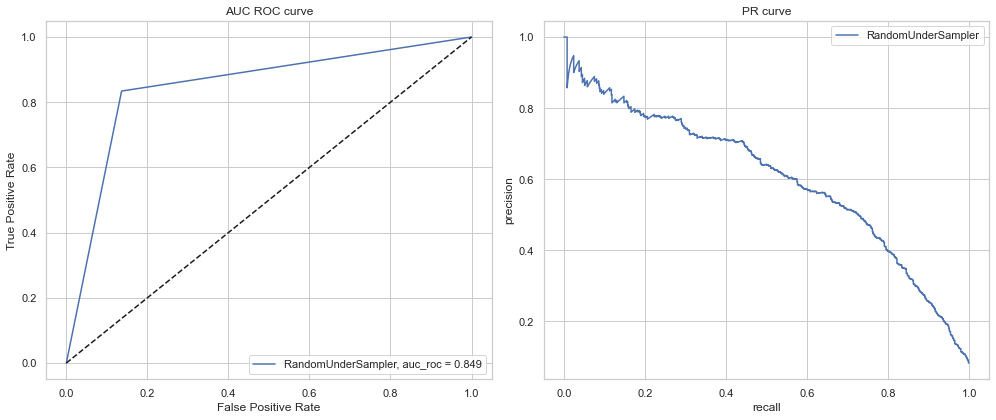

Sampling Type        f1  precision    recall  accuracy   auc_roc  \
4  RandomUnderSampler  0.498992   0.355952  0.834232  0.861179  0.848923   
2            SMOTEENN  0.576477   0.460856  0.769542  0.906299  0.844099   
1               SMOTE  0.590022   0.636505  0.549865  0.936676  0.760746   
3   RandomOverSampler  0.596255   0.671164  0.536388  0.939803  0.756321   
0                Base  0.574551   0.682746  0.495957  0.939133  0.737567   

     auc_pr            confusion_matrix  
4  0.601342  [[7092, 1120], [123, 619]]  
2  0.608664   [[7544, 668], [171, 571]]  
1  0.615844   [[7979, 233], [334, 408]]  
3  0.622647   [[8017, 195], [344, 398]]  
0  0.624919   [[8041, 171], [374, 368]]

In [139]:
# Get Different Sampling Results
results = get_different_sampling_type_results('LightGBM', X_test)
# Tabulate results
results

In [140]:
res=results.iloc[2,:]
res['Sampling Type']='LightGBM SMOTEENN'
sampling_results = sampling_results.append(res)


**Out of various Sampling methods, SMOTEENN yields the best one in f1, precision, recall and accuracy and auc_roc**

 - With RandomOverSampler Sampling and Hypertuning, we got:

| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
|0.576477 |	0.460856 |	0.769542 |	0.906299 |	0.844099 |	0.608664 |	[[7544, 668], [171, 571]]|


In [141]:
#Print the result dataframe in sorted manner 
sampling_results.sort_values(by=['recall','accuracy','precision','f1'],ascending=False,inplace=True)
sampling_results

Sampling Type        f1  precision    recall  accuracy  \
0  Logistic Regression Hypertuned  0.483491   0.341287  0.828841  0.853250   
0    Logistic Regression(Default)  0.482894   0.340922  0.827493  0.853138   
0        Decision Tree Hypertuned  0.484927   0.356329  0.758760  0.866428   
0              XGBoost Hypertuned  0.576360   0.470940  0.742588  0.909538   
3                     XGBoost ROS  0.614499   0.536145  0.719677  0.925173   
0          Random Forest(Default)  0.610299   0.577617  0.646900  0.931539   
0               LightGBM(Default)  0.614691   0.588889  0.642857  0.933214   
0        Random Forest Hypertuned  0.605714   0.572629  0.642857  0.930646   
0          Decision Tree(Default)  0.438975   0.349880  0.588949  0.875251   
0                XGBoost(Default)  0.594114   0.603616  0.584906  0.933773   
0            LightGBM  Hypertuned  0.608696   0.645991  0.575472  0.938687   
1               LightGBM SMOTEENN  0.590022   0.636505  0.549865  0.936676   

    auc_roc    auc_pr            confusion_matrix  
0  0.842148  0.551993  [[7025, 1187], [127, 615]]  
0  0.841474  0.552429  [[7025, 1187], [128, 614]]  
0  0.817458  0.547189  [[7195, 1017], [179, 563]]  
0  0.833605  0.630622   [[7593, 619], [191, 551]]  
3  0.831709  0.673432   [[7750, 462], [208, 534]]  
0  0.802079  0.634185   [[7861, 351], [262, 480]]  
0  0.801153  0.643203   [[7879, 333], [265, 477]]  
0  0.799753  0.647628   [[7856, 356], [265, 477]]  
0  0.745035  0.486446   [[7400, 812], [305, 437]]  
0  0.775100  0.621971   [[7927, 285], [308, 434]]  
0  0.773488  0.635437   [[7978, 234], [315, 427]]  
1  0.760746  0.615844   [[7979, 233], [334, 408]]

#### <font color = IndianRed>The model with ROS sampling technique applied on XGBoost has high recall score with accuracy of 92.5%. This model is the best model till now in terms of accuracy, recall and other scores and good to accept.</font>

**Let's apply the RandomOverSampler on XGBoost model to get the Feature Importance**

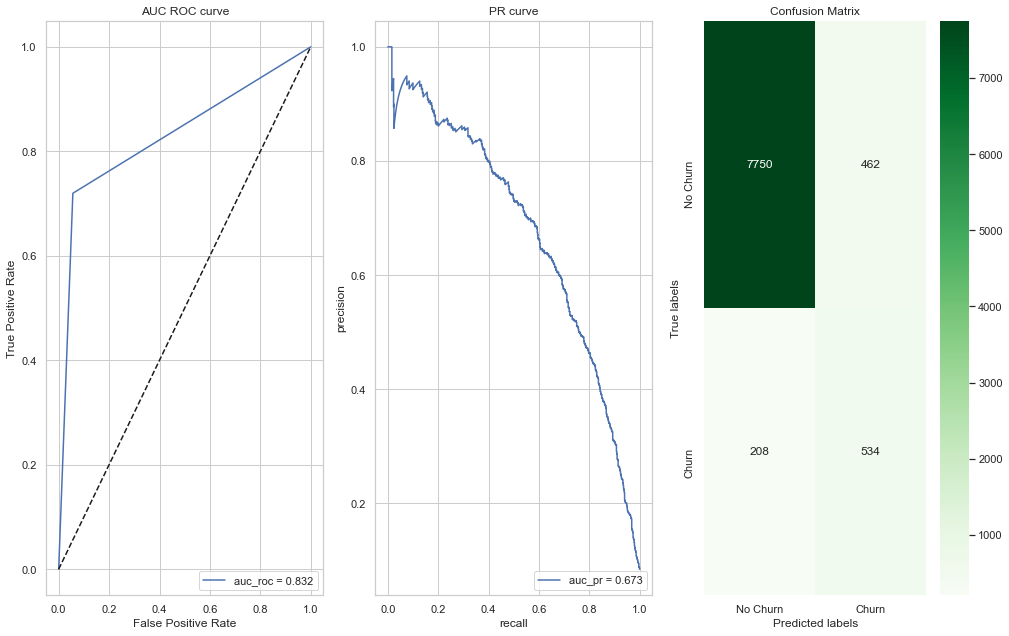

Sampling Type        f1  precision    recall  accuracy  \
0  Logistic Regression Hypertuned  0.483491   0.341287  0.828841  0.853250   
0    Logistic Regression(Default)  0.482894   0.340922  0.827493  0.853138   
0        Decision Tree Hypertuned  0.484927   0.356329  0.758760  0.866428   
0              XGBoost Hypertuned  0.576360   0.470940  0.742588  0.909538   
3                     XGBoost ROS  0.614499   0.536145  0.719677  0.925173   
0          Random Forest(Default)  0.610299   0.577617  0.646900  0.931539   
0               LightGBM(Default)  0.614691   0.588889  0.642857  0.933214   
0        Random Forest Hypertuned  0.605714   0.572629  0.642857  0.930646   
0          Decision Tree(Default)  0.438975   0.349880  0.588949  0.875251   
0                XGBoost(Default)  0.594114   0.603616  0.584906  0.933773   
0            LightGBM  Hypertuned  0.608696   0.645991  0.575472  0.938687   
1               LightGBM SMOTEENN  0.590022   0.636505  0.549865  0.936676   
0               XGBoost ROS Final  0.614499   0.536145  0.719677  0.925173   

    auc_roc    auc_pr            confusion_matrix  
0  0.842148  0.551993  [[7025, 1187], [127, 615]]  
0  0.841474  0.552429  [[7025, 1187], [128, 614]]  
0  0.817458  0.547189  [[7195, 1017], [179, 563]]  
0  0.833605  0.630622   [[7593, 619], [191, 551]]  
3  0.831709  0.673432   [[7750, 462], [208, 534]]  
0  0.802079  0.634185   [[7861, 351], [262, 480]]  
0  0.801153  0.643203   [[7879, 333], [265, 477]]  
0  0.799753  0.647628   [[7856, 356], [265, 477]]  
0  0.745035  0.486446   [[7400, 812], [305, 437]]  
0  0.775100  0.621971   [[7927, 285], [308, 434]]  
0  0.773488  0.635437   [[7978, 234], [315, 427]]  
1  0.760746  0.615844   [[7979, 233], [334, 408]]  
0  0.831709  0.673432   [[7750, 462], [208, 534]]

In [142]:
# Running XGBoost with RandomOverSampler Technique to get the final model scores.


xgb = XGBClassifier(max_depth = 14, learning_rate = 0.03, n_estimators = 300, min_child_weight=10, 
                          gamma=0.1,nthread=4,subsample=0.4,colsample_bytree=0.6,reg_alpha=1,
                          reg_lambda=3,n_jobs = -1, random_state = 512,objective = "binary:logistic", eval_metric = "error", use_label_encoder=False)    
xgb = xgb.fit(X_train_ros.values, y_train_ros.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, xgb, X_test)

# Tabulate results
results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr','confusion_matrix'])
sampling_type = pd.DataFrame(['XGBoost ROS Final'],columns=['Sampling Type'])
results = pd.concat([sampling_type, results], axis=1)
sampling_results = sampling_results.append(results)
sampling_results

In [143]:
# Sampling through RandomOverSampler
sampling = RandomOverSampler(random_state = 512)
X_train_resampled, y_train_resampled = sampling.fit_sample(X_train.values, y_train.values.ravel())

# Shuffle the data
#perms = np.random.permutation(X_train_resampled.shape[0])
#X_train_resampled = X_train_resampled[perms]
#y_train_resampled = y_train_resampled[perms]

X_train_resampled = pd.DataFrame(data = X_train_resampled)
y_train_resampled = pd.DataFrame(data = y_train_resampled)

print(X_train_resampled.shape)
print(y_train_resampled.shape)

(38158, 65)
(38158, 1)


### <font color = darkcyan>Important Features/Predictors</font>

In [144]:
feature_importances = pd.DataFrame(xgb.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

top_predictors = feature_importances.sort_values(by = "importance", ascending = False).head(10)
top_predictors.reset_index()

index  importance
0           loc_ic_mou_action_phase    0.118445
1         total_ic_mou_action_phase    0.064001
2          roam_og_mou_action_phase    0.045974
3  total_data_rech_amt_action_phase    0.035347
4        max_rech_data_action_phase    0.032146
5          roam_ic_mou_action_phase    0.028374
6           loc_og_mou_action_phase    0.028370
7         total_og_mou_action_phase    0.027592
8           spl_ic_mou_action_phase    0.026750
9            vol_3g_mb_action_phase    0.024058

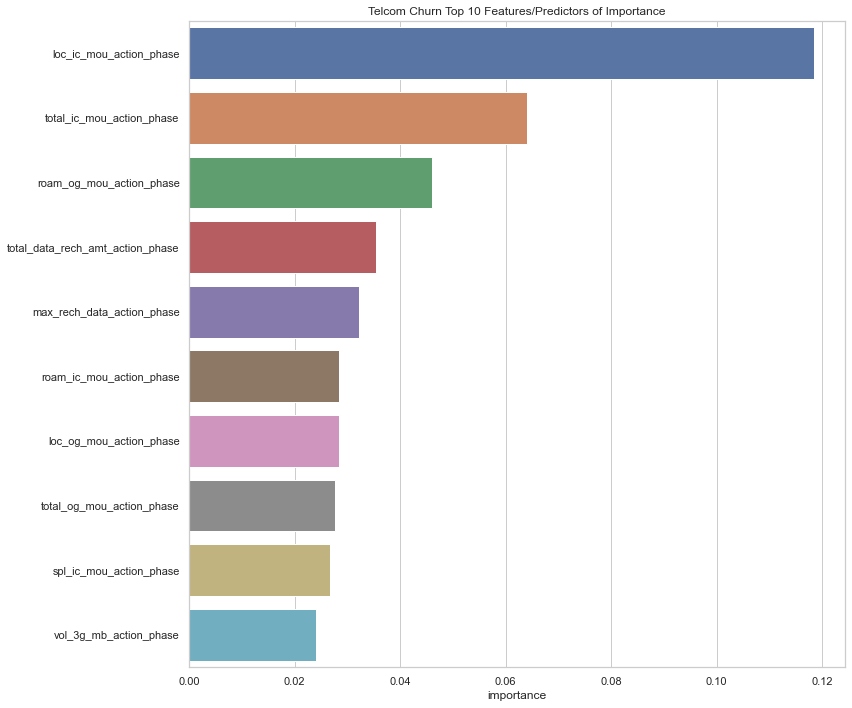

In [145]:
# Plotting the features
# Plotting the features
plt.figure(figsize=(12, 10))

sns.barplot(x = "importance",
            y = top_predictors.index,
            data = top_predictors)
plt.title('Telcom Churn Top 10 Features/Predictors of Importance')
plt.tight_layout()
plt.show()

In [146]:
#Top 10 predictors
data = top_predictors.sort_values(by = "importance", ascending = False).head(10)
print(data)

                                  importance
loc_ic_mou_action_phase             0.118445
total_ic_mou_action_phase           0.064001
roam_og_mou_action_phase            0.045974
total_data_rech_amt_action_phase    0.035347
max_rech_data_action_phase          0.032146
roam_ic_mou_action_phase            0.028374
loc_og_mou_action_phase             0.028370
total_og_mou_action_phase           0.027592
spl_ic_mou_action_phase             0.026750
vol_3g_mb_action_phase              0.024058


## Summary & Results

**As per problem statement, "In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition." 
     To predict or analyse the behavior of a customer over a time period of good phase and the action phase, 4 predictive models shown below have been created.
- Logistic Regression Model
- Decision Tree Classifier
- Random Forest Classifier 

**Each of these models were created initially with default parameters. As scores were not high, hypertuning of each model with best estimators was performed.Hypertuning helped to improve the scores slightly. Area under the curve, Recall and Precision metrics are used to assess each of these models.
To further improve the score, Boosting is applied using
- Extreme Gradient Boosting with XGBoost.
- Light Gradient Boosting Machine with LightGBM.

**Initially these boosting models were created using default parameters and performance is better than Logistic/Decision Tree/Random Forest models. Boosting models were hypertuned using best estimators.Model metrics have shown significant improvement. For this problem, 'False Negative' is not recommended meaning we should have a good Recall score. Hence, model which has a balance across accuracy,recall,precision and f1 score is considered.**

**XGBoost Classifier with RandomOverSampler technique has given us best performance among the models considered.** <BR>
    
| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
|0.614499 |	0.536145 |	0.719677 |	0.925173 |	0.831709 |	0.673432 |	[[7750, 462], [208, 534]]|
    
<br>         
        
**There is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model of LightGBM (After HyperTuning).**
    
<font color = blue>Top 10 Features/Predictors affecting churn</font>

- loc_ic_mou_action_phase             
- total_ic_mou_action_phase          
- roam_og_mou_action_phase           
- total_data_rech_amt_action_phase    
- max_rech_data_action_phase         
- roam_ic_mou_action_phase           
- loc_og_mou_action_phase            
- total_og_mou_action_phase         
- spl_ic_mou_action_phase             
- vol_3g_mb_action_phase              
    
**Over a four-month window in the dataset, the first two months(6,7 means June,July) are the ‘good’ phase, the third month(8-August) is the ‘action’ phase, while the fourth month(9-September) is the ‘churn’ phaseAction phase features are defined above in the derived features section.**
    
**XGBoost model is a decent model. We are able to predict with accuracy of 92.5 % and a recall of about 72%.**
    
#### <font color=green>Recommendations based on Top predictors</font>

- **loc_ic_mou_action_phase & total_ic_mou_action_phase**<br>
Total incoming minutes of usages in Action Phase is a very important feature as it is a marker of an active subscriber. More MOU on incoming calls shows subscriber's stickiness  to subscription. Incoming calls should be free to attract subscribers to use this connection more as his/her primary number.
   <br>
- **roam_og_mou_action_phase & roam_ic_mou_action_phase**<br>
High Value customers tend to roam domestically and internationally. Making or receiving calls in roaming networks should be made affordable through right partnership with national and global players where the Operator does not have its network. Roaming usually attracts a  bill shock which is one of the highest reasons of churn and dispute. Customer need to well informed and Bill Shock Protection should be enabled.
  <br>
- **total_data_rech_amt_action_phase & max_rech_data_action_phase**<br>
Data recharge is an excellent marker for loyal customers. Companies need to design convenient packages for Data which enables users to Pay as Grow. App bundling can be a good option to encourage data recharges. Customers need to be informed about security and malwares by bundling /offering protection services.
<br>